<a href="https://colab.research.google.com/github/armaletale/Blackjack/blob/master/SkinCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/isic-2024-challenge.zip" -d "drive/MyDrive/kaggleCompetition/SkinCancerPrediction"

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874656.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874659.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874663.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874742.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874751.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874803.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874805.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874832.jpg  
  inflating: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image/ISIC_9874878.jpg  
  inflating: drive/MyD

#1. Importing necessary things

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import h5py
import cv2
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import tensorflow as tf
from tensorflow.keras import layers, models


# Step 2: Load Metadata
We'll load the metadata CSV file, which contains information about each image and its corresponding label.

In [ ]:
# Load the training metadata
train_metadata_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
train_metadata = pd.read_csv(train_metadata_path)

# Display the first few rows to understand the structure
print(train_metadata.head())


<ipython-input-2-32d394a98be6>:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv(train_metadata_path)


        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

In [ ]:
# from matplotlib.pyplot import imread
# # Create pathnames from image ID's
# filenames = ["drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image" + fname + ".jpg" for fname in train_metadata["isic_id"]]

# # Check the irst 10
# filenames[:5]

In [ ]:
# import os

# # Check if the directory exists
# directory_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image"
# if os.path.exists(directory_path):
#     print("Directory exists.")
#     # Try listing the contents with error handling
#     try:
#         contents = os.listdir(directory_path)
#         print("Directory contents:", contents[:5])  # Print first 5 entries
#     except OSError as e:
#         print("Error listing directory contents:", e)
# else:
#     print("Directory does not exist. Check the path.")

In [ ]:
# # Check whether number of filenames matches the number o acutual image files
# import os
# if len(os.listdir("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image")) == len(filenames):
#   print("Filename match actual amount of files::: proceed.",len(os.listdir("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image")), len(filenames))
# else:
#   print("Filenames do no match actual amount of files, check the target directory.",len(os.listdir("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image")), len(filenames))

In [ ]:
# import os
# len(os.listdir("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image/image"))

In [ ]:
train_metadata.dtypes

,0
isic_id,object
target,int64
patient_id,object
age_approx,float64
sex,object
anatom_site_general,object
clin_size_long_diam_mm,float64
image_type,object
tbp_tile_type,object
tbp_lv_A,float64


# Step 3: Preprocess Metadata
We'll preprocess the metadata, converting categorical columns using one-hot encoding and scaling the numerical columns.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the metadata
train_metadata_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
train_metadata = pd.read_csv(train_metadata_path, dtype=str)  # Read all data as string initially

# Convert numerical columns back to the correct dtype
numerical_columns = ['age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
                     'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
                     'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
                     'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
                     'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
                     'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
                     'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
                     'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
                     'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
                     'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']

for col in numerical_columns:
    train_metadata[col] = pd.to_numeric(train_metadata[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Define categorical columns based on the provided dtypes
categorical_columns = ['sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
                       'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
                       'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
                       'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index']

# Preprocess the categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encode
])

# Preprocess the numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale the data
])

# Combine categorical and numerical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the data
train_metadata_processed = preprocessor.fit_transform(train_metadata)

# Extract feature names for categorical columns
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)

# Create the final feature names list
processed_metadata_columns = numerical_columns + list(cat_feature_names)

# Convert the processed metadata into a DataFrame
train_metadata_processed_df = pd.DataFrame(train_metadata_processed.toarray(), columns=processed_metadata_columns)

print("Processed Metadata Shape:", train_metadata_processed_df.shape)


Processed Metadata Shape: (401059, 22271)


In [ ]:
train_metadata_processed_df.head()

,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,...,"iddx_4_Squamous cell carcinoma in situ, Bowens disease","iddx_4_Squamous cell carcinoma, Invasive, Keratoacanthoma-type","iddx_5_Blue nevus, Cellular",mel_mitotic_index_0/mm^2,mel_mitotic_index_1/mm^2,mel_mitotic_index_2/mm^2,mel_mitotic_index_3/mm^2,mel_mitotic_index_4/mm^2,mel_mitotic_index_<1/mm^2,mel_mitotic_index_>4/mm^2
0,0.146658,-0.511069,0.067613,0.380443,-0.257500,-0.659882,-0.192995,-0.407543,-0.288931,-0.917620,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.146658,-1.624050,2.935019,2.959583,-0.369545,-0.527265,1.126869,0.906538,-2.708061,-3.006591,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.146658,-0.304536,0.650540,0.625867,1.835454,1.466075,1.644677,1.385391,0.835409,0.339647,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.515699,-0.407803,-1.433104,-0.780446,-1.294561,-1.291919,-1.583639,-1.355725,0.318926,-0.166282,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.222383,-0.688917,1.188031,1.455843,-0.344179,-0.268249,0.250792,0.349419,-1.396095,-1.590171,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 4: Load and Preprocess Images from HDF5
Now, let's load the images stored in the HDF5 file and resize them to a uniform shape for training.

In [ ]:
import h5py
import numpy as np

# Define the path to the HDF5 file
hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Load the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    data = np.array(hdf5_file['/'])  # Assuming the data is at the root level


print(data)

['ISIC_0015670' 'ISIC_0015845' 'ISIC_0015864' ... 'ISIC_9999960'
 'ISIC_9999964' 'ISIC_9999967']


In [ ]:
import h5py
import numpy as np

# Define the path to the HDF5 file
hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"

# Load the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    data = np.array(hdf5_file['/'])  # Assuming the data is at the root level


print(data)

['ISIC_0015657' 'ISIC_0015729' 'ISIC_0015740']


In [ ]:
import h5py

# Define the path to the HDF5 file
hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Inspect the HDF5 file structure
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    # Print the keys of the file to understand its structure
    data = np.array(hdf5_file['/'])
    #print("Keys in HDF5 file:", list(hdf5_file.keys()))
    print("here", hdf5_file)


here <HDF5 file "train-image.hdf5" (mode r)>


In [ ]:
# import h5py
# import cv2
# import numpy as np

# # Define the path to the HDF5 file and the desired image size
# hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
# image_size = (224, 224)  # Desired size for the images (height, width)
# batch_size = 32  # Number of images to process in each batch

# def process_images_in_batches(hdf5_file_path, batch_size, image_size):
#     with h5py.File(hdf5_file_path, 'r') as hdf5_file:
#         # Get all the keys (isic_ids) from the HDF5 file
#         isic_ids = list(hdf5_file.keys())
#         num_images = len(isic_ids)

#         for start in range(0, num_images, batch_size):
#             end = min(start + batch_size, num_images)
#             batch_isic_ids = isic_ids[start:end]

#             batch_images = []

#             for isic_id in batch_isic_ids:
#                 # Access the image data directly from the key
#                 image_data = hdf5_file[isic_id][()]

#                 # Check if image_data is in bytes and decode it if necessary
#                 if isinstance(image_data, bytes):
#                     image_data = np.frombuffer(image_data, dtype=np.uint8)
#                     image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
#                 else:
#                     # Assuming the image data is in a numpy array format if not bytes
#                     image_data = np.array(image_data)

#                 # Ensure the image is in uint8 format
#                 if image_data.dtype != np.uint8:
#                     image_data = image_data.astype(np.uint8)

#                 # Preprocess the image: Resize to the desired size
#                 resized_image = cv2.resize(image_data, image_size)

#                 # Normalize the image (e.g., pixel values between 0 and 1)
#                 normalized_image = resized_image / 255.0

#                 # Append the processed image to the batch list
#                 batch_images.append(normalized_image)

#             # Convert the batch list to a NumPy array and yield
#             yield np.array(batch_images), batch_isic_ids

# # Example usage:
# for batch_images, batch_isic_ids in process_images_in_batches(hdf5_file_path, batch_size, image_size):
#     print(f"Processed batch with {len(batch_images)} images.")
#     # You can now use batch_images and batch_isic_ids for training or further processing


In [ ]:
import h5py
import cv2
import numpy as np

# Define the path to the HDF5 file and the desired image size
hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
image_size = (224, 224)  # Desired size for the images (height, width)
batch_size = 32  # Number of images to process in each batch

def process_images_in_batches(hdf5_file_path, batch_size, image_size):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        # Get all the keys (isic_ids) from the HDF5 file
        isic_ids = list(hdf5_file.keys())
        num_images = len(isic_ids)

        for start in range(0, num_images, batch_size):
            end = min(start + batch_size, num_images)
            batch_isic_ids = isic_ids[start:end]

            batch_images = []

            for isic_id in batch_isic_ids:
                try:
                    # Access the image data directly from the key
                    image_data = hdf5_file[isic_id][()]

                    # Check if image_data is in bytes and decode it if necessary
                    if isinstance(image_data, bytes):
                        image_data = np.frombuffer(image_data, dtype=np.uint8)
                        image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                    else:
                        # Assuming the image data is in a numpy array format if not bytes
                        image_data = np.array(image_data)

                    # Ensure the image is in uint8 format
                    if image_data.dtype != np.uint8:
                        image_data = image_data.astype(np.uint8)

                    # Preprocess the image: Resize to the desired size
                    resized_image = cv2.resize(image_data, image_size)

                    # Normalize the image (e.g., pixel values between 0 and 1)
                    normalized_image = resized_image / 255.0

                    # Append the processed image to the batch list
                    batch_images.append(normalized_image)

                except Exception as e:
                    print(f"Error processing image {isic_id}: {e}")
                    continue

            # Convert the batch list to a NumPy array and yield
            yield np.array(batch_images), batch_isic_ids

# Example usage:
for batch_images, batch_isic_ids in process_images_in_batches(hdf5_file_path, batch_size, image_size):
    print(f"Processed batch with {len(batch_images)} images.")
    # You can now use batch_images and batch_isic_ids for training or further processing


Streaming output truncated to the last 5000 lines.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 32 images.
Processed batch with 

#Step 5: Filter and Align Data
This step involves aligning the images with their corresponding metadata and ensuring that each image has an associated target value. We will create a function that filters the data to ensure that only images with corresponding metadata and targets are used.

In [ ]:
import pandas as pd

# Define the path to your metadata file
metadata_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

def filter_and_align_data(metadata_file_path, hdf5_file_path):
    # Load the metadata
    metadata = pd.read_csv(metadata_file_path)

    # Filter out rows where target or image data might be missing
    metadata = metadata.dropna(subset=['isic_id', 'target'])

    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        # Filter metadata to keep only those rows where the image exists in the HDF5 file
        valid_isic_ids = [isic_id for isic_id in metadata['isic_id'] if isic_id in hdf5_file]

    # Filter the metadata to keep only valid ISIC IDs
    metadata = metadata[metadata['isic_id'].isin(valid_isic_ids)]

    return metadata

# Usage
filtered_metadata = filter_and_align_data(metadata_file_path, hdf5_file_path)
print(f"Filtered metadata has {len(filtered_metadata)} records.")


<ipython-input-19-36e9863a39f0>:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(metadata_file_path)


Filtered metadata has 401059 records.


In [ ]:
filtered_metadata.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


# Step 6: Split the Data
Now that you have filtered and aligned the data, the next step is to split it into training and validation sets. We will use a stratified split to ensure that both sets have a similar distribution of the target variable.

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(metadata, test_size=0.2, random_state=42):
    # Split the data into training and validation sets
    train_metadata, val_metadata = train_test_split(
        metadata,
        test_size=test_size,
        random_state=random_state,
        stratify=metadata['target']  # Ensure similar distribution in both sets
    )

    return train_metadata, val_metadata

# Usage
train_metadata, val_metadata = split_data(filtered_metadata)
print(f"Training set has {len(train_metadata)} records.")
print(f"Validation set has {len(val_metadata)} records.")


Training set has 320847 records.
Validation set has 80212 records.


In [ ]:
train_metadata.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
129579,ISIC_3283637,0,IP_9778433,60.0,male,anterior torso,4.57,TBP tile: close-up,3D: XP,21.207800,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
219530,ISIC_5518492,0,IP_0251074,55.0,male,posterior torso,4.60,TBP tile: close-up,3D: XP,14.203712,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.976510
70778,ISIC_1821584,0,IP_8036435,40.0,NaN,anterior torso,3.90,TBP tile: close-up,3D: XP,21.357440,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
324101,ISIC_8102613,0,IP_5426188,65.0,male,posterior torso,18.83,TBP tile: close-up,3D: XP,15.471530,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,53.199730
246526,ISIC_6194285,0,IP_2456971,60.0,male,upper extremity,3.52,TBP tile: close-up,3D: white,17.212489,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.936348


In [ ]:
train_metadata['target'].value_counts(ascending=False)

,count
target,
0,320533
1,314


In [ ]:
# Extract targets
train_metadata_labels = train_metadata['target'].values
val_metadata_labels = val_metadata['target'].values

# Separate the metadata features from the labels
train_metadata_features = train_metadata.drop(['isic_id', 'target'], axis=1)
val_metadata_features = val_metadata.drop(['isic_id', 'target'], axis=1)

In [ ]:
train_metadata_features.head()

,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
129579,IP_9778433,60.0,male,anterior torso,4.57,TBP tile: close-up,3D: XP,21.207800,11.539540,41.202260,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
219530,IP_0251074,55.0,male,posterior torso,4.60,TBP tile: close-up,3D: XP,14.203712,8.552016,33.577253,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.976510
70778,IP_8036435,40.0,NaN,anterior torso,3.90,TBP tile: close-up,3D: XP,21.357440,12.925720,38.590230,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
324101,IP_5426188,65.0,male,posterior torso,18.83,TBP tile: close-up,3D: XP,15.471530,11.613530,27.641820,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,53.199730
246526,IP_2456971,60.0,male,upper extremity,3.52,TBP tile: close-up,3D: white,17.212489,13.997965,23.455649,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.936348


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the categorical transformer
categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encode
])

# Define the numerical transformer
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale the data
])

# Combine categorical and numerical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the data
train_metadata_processed = preprocessor.fit_transform(train_metadata_features)
val_metadata_processed = preprocessor.transform(val_metadata_features)

# # Get number of features after transformation
# cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
# num_metadata_features = len(cat_feature_names) + len(numerical_columns)


In [ ]:
import pandas as pd

# Convert the csr_matrix to a DataFrame for easy viewing
train_metadata_processed_df = pd.DataFrame(train_metadata_processed.toarray())
train_metadata_processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17884,17885,17886,17887,17888,17889,17890,17891,17892,17893
0,0.147339,0.367128,0.308303,-0.957239,2.445834,2.625552,2.022899,1.956267,1.468179,2.200688,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.221822,0.384342,-1.442795,-1.803671,1.002492,0.984560,0.292642,0.321691,2.247622,2.438569,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.329307,-0.017309,0.345714,-0.564503,1.951402,2.174533,1.631760,1.646761,1.155812,1.701553,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.516501,8.549333,-1.125827,-0.936276,-0.121030,0.421874,-0.544424,0.028447,1.106148,1.250660,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.147339,-0.235348,-0.690568,-0.260712,-0.913433,-1.200533,-0.996769,-1.084787,-0.167217,-0.715788,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
val_metadata_processed_df = pd.DataFrame(val_metadata_processed.toarray())
val_metadata_processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17884,17885,17886,17887,17888,17889,17890,17891,17892,17893
0,0.147339,0.499099,-0.526906,-0.209407,-1.145560,-0.834763,-1.097240,-0.777615,-0.623033,-0.437668,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.590984,-0.023047,-0.099420,0.711575,-1.894152,-1.965736,-1.401686,-1.199414,-2.103362,-2.649990,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.960145,-0.212397,-0.861081,-0.402961,-0.091672,-0.112999,-0.428224,-0.261926,0.834134,0.342743,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.590984,1.440110,-1.316871,-0.964536,-0.308004,-0.572569,-0.760590,-0.825844,1.168948,0.655190,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.147339,-1.658340,1.553189,1.476016,-0.679884,-0.614015,0.210855,0.108542,-2.051882,-1.917365,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(train_metadata_processed_df), len(val_metadata_processed_df)

(320847, 80212)

In [ ]:
import numpy as np
import tensorflow as tf
import h5py
import cv2  # Assuming you need OpenCV for image processing

class SkinCancerDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, metadata_features, hdf5_file_path, labels, batch_size=32, img_size=(224, 224), is_training=True):
        self.metadata = metadata
        self.metadata_features = metadata_features
        self.hdf5_file_path = hdf5_file_path
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.is_training = is_training
        self.num_metadata_features = self.metadata_features.shape[1]
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        batch_metadata = self.metadata.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        batch_metadata_features = self.metadata_features[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]

        X, y = self.__data_generation(batch_metadata, batch_metadata_features, batch_labels)
        return {'image_input': X[0], 'metadata_input': X[1]}, y

    def __data_generation(self, batch_metadata, batch_metadata_features, batch_labels):
        batch_size = batch_metadata.shape[0]
        batch_images = np.empty((batch_size, *self.img_size, 3))
        batch_labels_array = np.empty((batch_size,))

        with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
            for i, (_, row) in enumerate(batch_metadata.iterrows()):
                isic_id = row['isic_id']
                if isic_id not in hdf5_file:
                    print(f"Image ID {isic_id} not found in HDF5 file")
                    continue

                image_data = hdf5_file[isic_id][()]
                if isinstance(image_data, bytes):
                    image_data = np.frombuffer(image_data, dtype=np.uint8)
                    image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                else:
                    image_data = np.array(image_data)

                if image_data.ndim == 3:
                    image_data = cv2.resize(image_data, self.img_size)
                elif image_data.ndim == 4:
                    image_data = image_data[0]  # Select the first image if 4D
                else:
                    raise ValueError(f"Unexpected image data dimensions for image ID {isic_id}: {image_data.ndim}")

                image_data = image_data / 255.0
                batch_images[i,] = image_data

                batch_labels_array[i,] = batch_labels[i]

        return [batch_images, batch_metadata_features], batch_labels_array

    def on_epoch_end(self):
        pass


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.models import Model

def create_model(img_size, num_metadata_features):
    # Image input
    image_input = Input(shape=(img_size[0], img_size[1], 3), name='image_input')

    # Image model: using a simple CNN model
    x = Conv2D(32, (3, 3), activation='relu')(image_input)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)

    # Metadata input
    metadata_input = Input(shape=(num_metadata_features,), name='metadata_input')

    # Combine image and metadata features
    combined = concatenate([x, metadata_input])

    # Dense layers on the combined input
    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    # Model
    model = Model(inputs=[image_input, metadata_input], outputs=output)
    return model


In [ ]:
# Initialize the model
img_size = (224, 224)  # Assuming the image size is 224x224
num_metadata_features = train_metadata_processed.shape[1]  # Number of metadata features

model = create_model(img_size, num_metadata_features)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
#model.summary()


In [ ]:
# Training data generator
train_generator = SkinCancerDataGenerator(
    metadata=train_metadata,
    metadata_features=train_metadata_processed,
    hdf5_file_path="drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5",
    labels=train_metadata_labels,
    batch_size=32,
    img_size=(224, 224),
    is_training=True
)

# Validation data generator
val_generator = SkinCancerDataGenerator(
    metadata=val_metadata,
    metadata_features=val_metadata_processed,
    hdf5_file_path="drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf55",
    labels=val_metadata_labels,
    batch_size=32,
    img_size=(224, 224),
    is_training=False
)

# Train the model
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras", save_best_only=True)
    ]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


InvalidArgumentError: Graph execution error:

Detected at node EagerPyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was ({'image_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float64, name=None), 'metadata_input': SparseTensorSpec(TensorShape([None, 17894]), tf.float64)}, TensorSpec(shape=(None,), dtype=tf.float64, name=None)), but the yielded element was ({'image_input': array([[[[0.39215686, 0.44705882, 0.58823529],
         [0.39607843, 0.44705882, 0.58823529],
         [0.4       , 0.45490196, 0.59215686],
         ...,
         [0.40784314, 0.4627451 , 0.60784314],
         [0.40392157, 0.45490196, 0.60392157],
         [0.40392157, 0.45490196, 0.60392157]],

        [[0.39215686, 0.44705882, 0.58823529],
         [0.39607843, 0.45098039, 0.59215686],
         [0.40392157, 0.45882353, 0.6       ],
         ...,
         [0.41568627, 0.46666667, 0.61568627],
         [0.41176471, 0.4627451 , 0.61176471],
         [0.41176471, 0.4627451 , 0.61176471]],

        [[0.39607843, 0.45098039, 0.59215686],
         [0.4       , 0.45490196, 0.59607843],
         [0.41176471, 0.46666667, 0.60784314],
         ...,
         [0.42745098, 0.47843137, 0.62745098],
         [0.42745098, 0.47843137, 0.62745098],
         [0.42745098, 0.47843137, 0.62745098]],

        ...,

        [[0.45098039, 0.51372549, 0.67843137],
         [0.45098039, 0.51372549, 0.67843137],
         [0.44705882, 0.51372549, 0.6745098 ],
         ...,
         [0.42745098, 0.50588235, 0.62745098],
         [0.43137255, 0.50980392, 0.63137255],
         [0.43137255, 0.50980392, 0.63137255]],

        [[0.45882353, 0.52156863, 0.68627451],
         [0.45490196, 0.51764706, 0.68235294],
         [0.44705882, 0.50980392, 0.6745098 ],
         ...,
         [0.42352941, 0.49803922, 0.61960784],
         [0.42352941, 0.50196078, 0.62352941],
         [0.42352941, 0.50196078, 0.62352941]],

        [[0.4627451 , 0.5254902 , 0.69019608],
         [0.45490196, 0.51764706, 0.68235294],
         [0.44705882, 0.50980392, 0.6745098 ],
         ...,
         [0.41960784, 0.49803922, 0.61960784],
         [0.41960784, 0.49803922, 0.61960784],
         [0.41960784, 0.49803922, 0.61960784]]],


       [[[0.60784314, 0.65490196, 0.81176471],
         [0.60392157, 0.65490196, 0.80784314],
         [0.60392157, 0.65098039, 0.80784314],
         ...,
         [0.61960784, 0.66666667, 0.80784314],
         [0.62745098, 0.6745098 , 0.81568627],
         [0.63137255, 0.67843137, 0.81960784]],

        [[0.60784314, 0.65490196, 0.81176471],
         [0.60784314, 0.65490196, 0.81176471],
         [0.60392157, 0.65098039, 0.80784314],
         ...,
         [0.61568627, 0.6627451 , 0.80392157],
         [0.62352941, 0.67058824, 0.81176471],
         [0.62745098, 0.6745098 , 0.81568627]],

        [[0.60784314, 0.65490196, 0.81176471],
         [0.60784314, 0.65490196, 0.81176471],
         [0.60784314, 0.65490196, 0.81176471],
         ...,
         [0.61176471, 0.65882353, 0.8       ],
         [0.61960784, 0.66666667, 0.80784314],
         [0.62352941, 0.67058824, 0.81176471]],

        ...,

        [[0.58431373, 0.63529412, 0.78431373],
         [0.58431373, 0.63529412, 0.78431373],
         [0.58823529, 0.63921569, 0.78823529],
         ...,
         [0.57647059, 0.64313725, 0.79607843],
         [0.57647059, 0.64313725, 0.79607843],
         [0.57647059, 0.64313725, 0.79607843]],

        [[0.58039216, 0.63137255, 0.78039216],
         [0.58431373, 0.63529412, 0.78431373],
         [0.58431373, 0.63529412, 0.78431373],
         ...,
         [0.58039216, 0.64705882, 0.8       ],
         [0.58039216, 0.64705882, 0.8       ],
         [0.57647059, 0.64705882, 0.8       ]],

        [[0.58039216, 0.63137255, 0.78039216],
         [0.58039216, 0.63137255, 0.78039216],
         [0.58431373, 0.63529412, 0.78431373],
         ...,
         [0.58431373, 0.65098039, 0.80392157],
         [0.58039216, 0.64705882, 0.8       ],
         [0.58039216, 0.64705882, 0.8       ]]],


       [[[0.20784314, 0.34117647, 0.54901961],
         [0.20784314, 0.34117647, 0.54901961],
         [0.20784314, 0.34117647, 0.54901961],
         ...,
         [0.23921569, 0.4       , 0.59215686],
         [0.24313725, 0.40392157, 0.59607843],
         [0.24705882, 0.40784314, 0.6       ]],

        [[0.20392157, 0.3372549 , 0.54509804],
         [0.20784314, 0.34117647, 0.54901961],
         [0.20784314, 0.34117647, 0.54901961],
         ...,
         [0.23529412, 0.39607843, 0.58823529],
         [0.23921569, 0.4       , 0.59215686],
         [0.23921569, 0.4       , 0.59215686]],

        [[0.20392157, 0.3372549 , 0.54509804],
         [0.20392157, 0.3372549 , 0.54509804],
         [0.20784314, 0.34117647, 0.54901961],
         ...,
         [0.23137255, 0.39215686, 0.58431373],
         [0.23137255, 0.39215686, 0.58431373],
         [0.23137255, 0.39215686, 0.58431373]],

        ...,

        [[0.22745098, 0.36078431, 0.54117647],
         [0.23137255, 0.36470588, 0.54509804],
         [0.24313725, 0.37647059, 0.55686275],
         ...,
         [0.21568627, 0.35686275, 0.5372549 ],
         [0.21176471, 0.35294118, 0.53333333],
         [0.21176471, 0.35294118, 0.53333333]],

        [[0.22745098, 0.36078431, 0.54117647],
         [0.23529412, 0.36862745, 0.54901961],
         [0.23921569, 0.37254902, 0.55294118],
         ...,
         [0.21568627, 0.36078431, 0.5372549 ],
         [0.21568627, 0.36078431, 0.53333333],
         [0.21568627, 0.35686275, 0.53333333]],

        [[0.23137255, 0.36470588, 0.54509804],
         [0.23529412, 0.36862745, 0.54901961],
         [0.23921569, 0.37254902, 0.55294118],
         ...,
         [0.21960784, 0.36470588, 0.5372549 ],
         [0.21568627, 0.36078431, 0.53333333],
         [0.21568627, 0.36078431, 0.53333333]]],


       ...,


       [[[0.6       , 0.68235294, 0.83137255],
         [0.6       , 0.68235294, 0.83137255],
         [0.60392157, 0.68627451, 0.83529412],
         ...,
         [0.63137255, 0.71764706, 0.85490196],
         [0.63137255, 0.70980392, 0.85098039],
         [0.63137255, 0.70980392, 0.84705882]],

        [[0.6       , 0.68235294, 0.83137255],
         [0.6       , 0.68235294, 0.83137255],
         [0.6       , 0.68235294, 0.83137255],
         ...,
         [0.63137255, 0.71372549, 0.85490196],
         [0.63137255, 0.70980392, 0.84705882],
         [0.63137255, 0.70980392, 0.84705882]],

        [[0.59607843, 0.67843137, 0.82745098],
         [0.59607843, 0.68235294, 0.82745098],
         [0.6       , 0.68235294, 0.83137255],
         ...,
         [0.62745098, 0.71372549, 0.85098039],
         [0.62745098, 0.70980392, 0.84705882],
         [0.62745098, 0.70588235, 0.84313725]],

        ...,

        [[0.6       , 0.69019608, 0.83921569],
         [0.6       , 0.68627451, 0.83921569],
         [0.59215686, 0.68235294, 0.83137255],
         ...,
         [0.58823529, 0.67058824, 0.81960784],
         [0.57647059, 0.6627451 , 0.80784314],
         [0.57254902, 0.65490196, 0.80392157]],

        [[0.60392157, 0.69411765, 0.84313725],
         [0.6       , 0.69019608, 0.83921569],
         [0.59607843, 0.68627451, 0.83529412],
         ...,
         [0.58431373, 0.66666667, 0.81568627],
         [0.57254902, 0.65490196, 0.80392157],
         [0.56862745, 0.65098039, 0.8       ]],

        [[0.60392157, 0.69411765, 0.84313725],
         [0.6       , 0.69019608, 0.83921569],
         [0.59607843, 0.68627451, 0.83529412],
         ...,
         [0.58039216, 0.6627451 , 0.81176471],
         [0.57254902, 0.65490196, 0.80392157],
         [0.56862745, 0.65098039, 0.8       ]]],


       [[[0.2745098 , 0.30980392, 0.48235294],
         [0.2745098 , 0.30980392, 0.48235294],
         [0.27843137, 0.31372549, 0.48627451],
         ...,
         [0.32941176, 0.39215686, 0.57254902],
         [0.34117647, 0.40392157, 0.58431373],
         [0.34509804, 0.40784314, 0.58823529]],

        [[0.25882353, 0.29411765, 0.46666667],
         [0.25882353, 0.29411765, 0.46666667],
         [0.2627451 , 0.29803922, 0.47058824],
         ...,
         [0.33333333, 0.39607843, 0.57647059],
         [0.34117647, 0.40392157, 0.58431373],
         [0.34509804, 0.40784314, 0.58823529]],

        [[0.22745098, 0.26666667, 0.43529412],
         [0.23529412, 0.27058824, 0.44313725],
         [0.24313725, 0.27843137, 0.45098039],
         ...,
         [0.33333333, 0.39607843, 0.57647059],
         [0.34117647, 0.40392157, 0.58431373],
         [0.34509804, 0.40784314, 0.58823529]],

        ...,

        [[0.35686275, 0.40392157, 0.53333333],
         [0.36078431, 0.40392157, 0.5372549 ],
         [0.36470588, 0.41176471, 0.54509804],
         ...,
         [0.37254902, 0.43529412, 0.6       ],
         [0.37647059, 0.43921569, 0.60392157],
         [0.37647059, 0.43921569, 0.60392157]],

        [[0.35294118, 0.4       , 0.5254902 ],
         [0.36078431, 0.40784314, 0.53333333],
         [0.37647059, 0.41960784, 0.54901961],
         ...,
         [0.36078431, 0.42745098, 0.58823529],
         [0.36470588, 0.43137255, 0.59215686],
         [0.36862745, 0.43137255, 0.59607843]],

        [[0.35294118, 0.39607843, 0.52156863],
         [0.36470588, 0.40784314, 0.53333333],
         [0.38431373, 0.42745098, 0.55294118],
         ...,
         [0.35686275, 0.41960784, 0.58431373],
         [0.36078431, 0.42352941, 0.58823529],
         [0.36470588, 0.42745098, 0.59215686]]],


       [[[0.4745098 , 0.63921569, 0.87058824],
         [0.4745098 , 0.63529412, 0.86666667],
         [0.47058824, 0.63529412, 0.86666667],
         ...,
         [0.48627451, 0.63921569, 0.88235294],
         [0.47843137, 0.63137255, 0.8745098 ],
         [0.4745098 , 0.62745098, 0.87058824]],

        [[0.46666667, 0.63137255, 0.8627451 ],
         [0.46666667, 0.63137255, 0.8627451 ],
         [0.46666667, 0.63137255, 0.8627451 ],
         ...,
         [0.48235294, 0.63529412, 0.87843137],
         [0.47843137, 0.63137255, 0.8745098 ],
         [0.4745098 , 0.62745098, 0.87058824]],

        [[0.45882353, 0.62352941, 0.85490196],
         [0.45882353, 0.62352941, 0.85490196],
         [0.45882353, 0.62352941, 0.85490196],
         ...,
         [0.47843137, 0.63137255, 0.8745098 ],
         [0.4745098 , 0.62745098, 0.87058824],
         [0.4745098 , 0.62745098, 0.87058824]],

        ...,

        [[0.43921569, 0.58431373, 0.81960784],
         [0.43529412, 0.58039216, 0.81568627],
         [0.42352941, 0.56862745, 0.80392157],
         ...,
         [0.35686275, 0.51764706, 0.76470588],
         [0.35294118, 0.51372549, 0.76078431],
         [0.35294118, 0.51372549, 0.76078431]],

        [[0.44705882, 0.59215686, 0.82745098],
         [0.44313725, 0.58823529, 0.82352941],
         [0.43921569, 0.58431373, 0.81960784],
         ...,
         [0.35686275, 0.51764706, 0.76470588],
         [0.35294118, 0.51372549, 0.76078431],
         [0.35294118, 0.51372549, 0.76078431]],

        [[0.45490196, 0.6       , 0.83529412],
         [0.45098039, 0.59607843, 0.83137255],
         [0.44705882, 0.59215686, 0.82745098],
         ...,
         [0.35686275, 0.51764706, 0.76470588],
         [0.35294118, 0.51372549, 0.76078431],
         [0.35294118, 0.51372549, 0.76078431]]]]), 'metadata_input': <32x17894 sparse matrix of type '<class 'numpy.float64'>'
	with 1632 stored elements in Compressed Sparse Row format>}, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 266, in generator_py_func
    values = structure.normalize_element(values, output_signature)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/util/structure.py", line 117, in normalize_element
    normalized_components.append(sparse_tensor.SparseTensor.from_value(t))

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/sparse_tensor.py", line 111, in from_value
    raise TypeError(f"Argument sparse_tensor_value={sparse_tensor_value} "

TypeError: Argument sparse_tensor_value=  (0, 0)	-0.960145124083919
  (0, 1)	0.5220509760762125
  (0, 2)	-0.937828405180479
  (0, 3)	-0.37245014987685265
  (0, 4)	-1.0031226049159692
  (0, 5)	-0.878056055750177
  (0, 6)	-1.1652694288475183
  (0, 7)	-0.8734765842239453
  (0, 8)	0.023368948862707923
  (0, 9)	-0.2892460326543377
  (0, 10)	0.14493486778251424
  (0, 11)	0.09392683385560467
  (0, 12)	-0.13566904245876835
  (0, 13)	0.7814137852215618
  (0, 14)	-0.032708174886332264
  (0, 15)	-0.9214533915757867
  (0, 16)	-0.6144553960285886
  (0, 17)	0.12652566854626746
  (0, 18)	-0.2249989795632916
  (0, 19)	-0.2946436771919015
  (0, 20)	0.9703874340801366
  (0, 21)	-0.07192353698651655
  (0, 22)	-0.43427107797699793
  (0, 23)	0.7831383567262848
  (0, 24)	-0.11538220902776336
  :	:
  (31, 26)	-1.3836879348206397
  (31, 27)	-0.8009365048427894
  (31, 28)	1.0085355526033137
  (31, 29)	0.592120959230906
  (31, 30)	-0.4047822273552533
  (31, 31)	0.44640085743549623
  (31, 32)	0.711057170897369
  (31, 33)	0.9140616445059888
  (31, 35)	0.2972667657077238
  (31, 36)	1.0
  (31, 41)	1.0
  (31, 43)	1.0
  (31, 44)	1.0
  (31, 62)	1.0
  (31, 72)	1.0
  (31, 78)	1.0
  (31, 83)	1.0
  (31, 85)	1.0
  (31, 17774)	1.0
  (31, 17822)	1.0
  (31, 17828)	1.0
  (31, 17851)	1.0
  (31, 17875)	1.0
  (31, 17886)	1.0
  (31, 17887)	1.0 is neither a SparseTensor nor SparseTensorValue.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 268, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was ({'image_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float64, name=None), 'metadata_input': SparseTensorSpec(TensorShape([None, 17894]), tf.float64)}, TensorSpec(shape=(None,), dtype=tf.float64, name=None)), but the yielded element was ({'image_input': array([[[[0.39215686, 0.44705882, 0.58823529],
         [0.39607843, 0.44705882, 0.58823529],
         [0.4       , 0.45490196, 0.59215686],
         ...,
         [0.40784314, 0.4627451 , 0.60784314],
         [0.40392157, 0.45490196, 0.60392157],
         [0.40392157, 0.45490196, 0.60392157]],

        [[0.39215686, 0.44705882, 0.58823529],
         [0.39607843, 0.45098039, 0.59215686],
         [0.40392157, 0.45882353, 0.6       ],
         ...,
         [0.41568627, 0.46666667, 0.61568627],
         [0.41176471, 0.4627451 , 0.61176471],
         [0.41176471, 0.4627451 , 0.61176471]],

        [[0.39607843, 0.45098039, 0.59215686],
         [0.4       , 0.45490196, 0.59607843],
         [0.41176471, 0.46666667, 0.60784314],
         ...,
         [0.42745098, 0.47843137, 0.62745098],
         [0.42745098, 0.47843137, 0.62745098],
         [0.42745098, 0.47843137, 0.62745098]],

        ...,

        [[0.45098039, 0.51372549, 0.67843137],
         [0.45098039, 0.51372549, 0.67843137],
         [0.44705882, 0.51372549, 0.6745098 ],
         ...,
         [0.42745098, 0.50588235, 0.62745098],
         [0.43137255, 0.50980392, 0.63137255],
         [0.43137255, 0.50980392, 0.63137255]],

        [[0.45882353, 0.52156863, 0.68627451],
         [0.45490196, 0.51764706, 0.68235294],
         [0.44705882, 0.50980392, 0.6745098 ],
         ...,
         [0.42352941, 0.49803922, 0.61960784],
         [0.42352941, 0.50196078, 0.62352941],
         [0.42352941, 0.50196078, 0.62352941]],

        [[0.4627451 , 0.5254902 , 0.69019608],
         [0.45490196, 0.51764706, 0.68235294],
         [0.44705882, 0.50980392, 0.6745098 ],
         ...,
         [0.41960784, 0.49803922, 0.61960784],
         [0.41960784, 0.49803922, 0.61960784],
         [0.41960784, 0.49803922, 0.61960784]]],


       [[[0.60784314, 0.65490196, 0.81176471],
         [0.60392157, 0.65490196, 0.80784314],
         [0.60392157, 0.65098039, 0.80784314],
         ...,
         [0.61960784, 0.66666667, 0.80784314],
         [0.62745098, 0.6745098 , 0.81568627],
         [0.63137255, 0.67843137, 0.81960784]],

        [[0.60784314, 0.65490196, 0.81176471],
         [0.60784314, 0.65490196, 0.81176471],
         [0.60392157, 0.65098039, 0.80784314],
         ...,
         [0.61568627, 0.6627451 , 0.80392157],
         [0.62352941, 0.67058824, 0.81176471],
         [0.62745098, 0.6745098 , 0.81568627]],

        [[0.60784314, 0.65490196, 0.81176471],
         [0.60784314, 0.65490196, 0.81176471],
         [0.60784314, 0.65490196, 0.81176471],
         ...,
         [0.61176471, 0.65882353, 0.8       ],
         [0.61960784, 0.66666667, 0.80784314],
         [0.62352941, 0.67058824, 0.81176471]],

        ...,

        [[0.58431373, 0.63529412, 0.78431373],
         [0.58431373, 0.63529412, 0.78431373],
         [0.58823529, 0.63921569, 0.78823529],
         ...,
         [0.57647059, 0.64313725, 0.79607843],
         [0.57647059, 0.64313725, 0.79607843],
         [0.57647059, 0.64313725, 0.79607843]],

        [[0.58039216, 0.63137255, 0.78039216],
         [0.58431373, 0.63529412, 0.78431373],
         [0.58431373, 0.63529412, 0.78431373],
         ...,
         [0.58039216, 0.64705882, 0.8       ],
         [0.58039216, 0.64705882, 0.8       ],
         [0.57647059, 0.64705882, 0.8       ]],

        [[0.58039216, 0.63137255, 0.78039216],
         [0.58039216, 0.63137255, 0.78039216],
         [0.58431373, 0.63529412, 0.78431373],
         ...,
         [0.58431373, 0.65098039, 0.80392157],
         [0.58039216, 0.64705882, 0.8       ],
         [0.58039216, 0.64705882, 0.8       ]]],


       [[[0.20784314, 0.34117647, 0.54901961],
         [0.20784314, 0.34117647, 0.54901961],
         [0.20784314, 0.34117647, 0.54901961],
         ...,
         [0.23921569, 0.4       , 0.59215686],
         [0.24313725, 0.40392157, 0.59607843],
         [0.24705882, 0.40784314, 0.6       ]],

        [[0.20392157, 0.3372549 , 0.54509804],
         [0.20784314, 0.34117647, 0.54901961],
         [0.20784314, 0.34117647, 0.54901961],
         ...,
         [0.23529412, 0.39607843, 0.58823529],
         [0.23921569, 0.4       , 0.59215686],
         [0.23921569, 0.4       , 0.59215686]],

        [[0.20392157, 0.3372549 , 0.54509804],
         [0.20392157, 0.3372549 , 0.54509804],
         [0.20784314, 0.34117647, 0.54901961],
         ...,
         [0.23137255, 0.39215686, 0.58431373],
         [0.23137255, 0.39215686, 0.58431373],
         [0.23137255, 0.39215686, 0.58431373]],

        ...,

        [[0.22745098, 0.36078431, 0.54117647],
         [0.23137255, 0.36470588, 0.54509804],
         [0.24313725, 0.37647059, 0.55686275],
         ...,
         [0.21568627, 0.35686275, 0.5372549 ],
         [0.21176471, 0.35294118, 0.53333333],
         [0.21176471, 0.35294118, 0.53333333]],

        [[0.22745098, 0.36078431, 0.54117647],
         [0.23529412, 0.36862745, 0.54901961],
         [0.23921569, 0.37254902, 0.55294118],
         ...,
         [0.21568627, 0.36078431, 0.5372549 ],
         [0.21568627, 0.36078431, 0.53333333],
         [0.21568627, 0.35686275, 0.53333333]],

        [[0.23137255, 0.36470588, 0.54509804],
         [0.23529412, 0.36862745, 0.54901961],
         [0.23921569, 0.37254902, 0.55294118],
         ...,
         [0.21960784, 0.36470588, 0.5372549 ],
         [0.21568627, 0.36078431, 0.53333333],
         [0.21568627, 0.36078431, 0.53333333]]],


       ...,


       [[[0.6       , 0.68235294, 0.83137255],
         [0.6       , 0.68235294, 0.83137255],
         [0.60392157, 0.68627451, 0.83529412],
         ...,
         [0.63137255, 0.71764706, 0.85490196],
         [0.63137255, 0.70980392, 0.85098039],
         [0.63137255, 0.70980392, 0.84705882]],

        [[0.6       , 0.68235294, 0.83137255],
         [0.6       , 0.68235294, 0.83137255],
         [0.6       , 0.68235294, 0.83137255],
         ...,
         [0.63137255, 0.71372549, 0.85490196],
         [0.63137255, 0.70980392, 0.84705882],
         [0.63137255, 0.70980392, 0.84705882]],

        [[0.59607843, 0.67843137, 0.82745098],
         [0.59607843, 0.68235294, 0.82745098],
         [0.6       , 0.68235294, 0.83137255],
         ...,
         [0.62745098, 0.71372549, 0.85098039],
         [0.62745098, 0.70980392, 0.84705882],
         [0.62745098, 0.70588235, 0.84313725]],

        ...,

        [[0.6       , 0.69019608, 0.83921569],
         [0.6       , 0.68627451, 0.83921569],
         [0.59215686, 0.68235294, 0.83137255],
         ...,
         [0.58823529, 0.67058824, 0.81960784],
         [0.57647059, 0.6627451 , 0.80784314],
         [0.57254902, 0.65490196, 0.80392157]],

        [[0.60392157, 0.69411765, 0.84313725],
         [0.6       , 0.69019608, 0.83921569],
         [0.59607843, 0.68627451, 0.83529412],
         ...,
         [0.58431373, 0.66666667, 0.81568627],
         [0.57254902, 0.65490196, 0.80392157],
         [0.56862745, 0.65098039, 0.8       ]],

        [[0.60392157, 0.69411765, 0.84313725],
         [0.6       , 0.69019608, 0.83921569],
         [0.59607843, 0.68627451, 0.83529412],
         ...,
         [0.58039216, 0.6627451 , 0.81176471],
         [0.57254902, 0.65490196, 0.80392157],
         [0.56862745, 0.65098039, 0.8       ]]],


       [[[0.2745098 , 0.30980392, 0.48235294],
         [0.2745098 , 0.30980392, 0.48235294],
         [0.27843137, 0.31372549, 0.48627451],
         ...,
         [0.32941176, 0.39215686, 0.57254902],
         [0.34117647, 0.40392157, 0.58431373],
         [0.34509804, 0.40784314, 0.58823529]],

        [[0.25882353, 0.29411765, 0.46666667],
         [0.25882353, 0.29411765, 0.46666667],
         [0.2627451 , 0.29803922, 0.47058824],
         ...,
         [0.33333333, 0.39607843, 0.57647059],
         [0.34117647, 0.40392157, 0.58431373],
         [0.34509804, 0.40784314, 0.58823529]],

        [[0.22745098, 0.26666667, 0.43529412],
         [0.23529412, 0.27058824, 0.44313725],
         [0.24313725, 0.27843137, 0.45098039],
         ...,
         [0.33333333, 0.39607843, 0.57647059],
         [0.34117647, 0.40392157, 0.58431373],
         [0.34509804, 0.40784314, 0.58823529]],

        ...,

        [[0.35686275, 0.40392157, 0.53333333],
         [0.36078431, 0.40392157, 0.5372549 ],
         [0.36470588, 0.41176471, 0.54509804],
         ...,
         [0.37254902, 0.43529412, 0.6       ],
         [0.37647059, 0.43921569, 0.60392157],
         [0.37647059, 0.43921569, 0.60392157]],

        [[0.35294118, 0.4       , 0.5254902 ],
         [0.36078431, 0.40784314, 0.53333333],
         [0.37647059, 0.41960784, 0.54901961],
         ...,
         [0.36078431, 0.42745098, 0.58823529],
         [0.36470588, 0.43137255, 0.59215686],
         [0.36862745, 0.43137255, 0.59607843]],

        [[0.35294118, 0.39607843, 0.52156863],
         [0.36470588, 0.40784314, 0.53333333],
         [0.38431373, 0.42745098, 0.55294118],
         ...,
         [0.35686275, 0.41960784, 0.58431373],
         [0.36078431, 0.42352941, 0.58823529],
         [0.36470588, 0.42745098, 0.59215686]]],


       [[[0.4745098 , 0.63921569, 0.87058824],
         [0.4745098 , 0.63529412, 0.86666667],
         [0.47058824, 0.63529412, 0.86666667],
         ...,
         [0.48627451, 0.63921569, 0.88235294],
         [0.47843137, 0.63137255, 0.8745098 ],
         [0.4745098 , 0.62745098, 0.87058824]],

        [[0.46666667, 0.63137255, 0.8627451 ],
         [0.46666667, 0.63137255, 0.8627451 ],
         [0.46666667, 0.63137255, 0.8627451 ],
         ...,
         [0.48235294, 0.63529412, 0.87843137],
         [0.47843137, 0.63137255, 0.8745098 ],
         [0.4745098 , 0.62745098, 0.87058824]],

        [[0.45882353, 0.62352941, 0.85490196],
         [0.45882353, 0.62352941, 0.85490196],
         [0.45882353, 0.62352941, 0.85490196],
         ...,
         [0.47843137, 0.63137255, 0.8745098 ],
         [0.4745098 , 0.62745098, 0.87058824],
         [0.4745098 , 0.62745098, 0.87058824]],

        ...,

        [[0.43921569, 0.58431373, 0.81960784],
         [0.43529412, 0.58039216, 0.81568627],
         [0.42352941, 0.56862745, 0.80392157],
         ...,
         [0.35686275, 0.51764706, 0.76470588],
         [0.35294118, 0.51372549, 0.76078431],
         [0.35294118, 0.51372549, 0.76078431]],

        [[0.44705882, 0.59215686, 0.82745098],
         [0.44313725, 0.58823529, 0.82352941],
         [0.43921569, 0.58431373, 0.81960784],
         ...,
         [0.35686275, 0.51764706, 0.76470588],
         [0.35294118, 0.51372549, 0.76078431],
         [0.35294118, 0.51372549, 0.76078431]],

        [[0.45490196, 0.6       , 0.83529412],
         [0.45098039, 0.59607843, 0.83137255],
         [0.44705882, 0.59215686, 0.82745098],
         ...,
         [0.35686275, 0.51764706, 0.76470588],
         [0.35294118, 0.51372549, 0.76078431],
         [0.35294118, 0.51372549, 0.76078431]]]]), 'metadata_input': <32x17894 sparse matrix of type '<class 'numpy.float64'>'
	with 1632 stored elements in Compressed Sparse Row format>}, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_1611]

In [ ]:
import numpy as np
import tensorflow as tf
import h5py
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class SkinCancerDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, hdf5_file_path, batch_size=32, img_size=(224, 224), is_training=True):
        self.metadata = metadata
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.img_size = img_size
        self.is_training = is_training
        self.metadata_features = preprocessor.transform(self.metadata.drop(['isic_id', 'target'], axis=1))
        self.num_metadata_features = self.metadata_features.shape[1]
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        batch_metadata = self.metadata.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__data_generation(batch_metadata)
        return {'image_input': X[0], 'metadata_input': X[1]}, y

    def __data_generation(self, batch_metadata):
        batch_size = batch_metadata.shape[0]
        batch_images = np.empty((batch_size, *self.img_size, 3))
        batch_metadata_features = np.empty((batch_size, self.num_metadata_features))
        batch_labels = np.empty((batch_size,))

        with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
            for i, (_, row) in enumerate(batch_metadata.iterrows()):
                isic_id = row['isic_id']
                if isic_id not in hdf5_file:
                    print(f"Image ID {isic_id} not found in HDF5 file")
                    continue

                image_data = hdf5_file[isic_id][()]
                if isinstance(image_data, bytes):
                    image_data = np.frombuffer(image_data, dtype=np.uint8)
                    image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                else:
                    image_data = np.array(image_data)

                if image_data.ndim == 3:
                    image_data = cv2.resize(image_data, self.img_size)
                elif image_data.ndim == 4:
                    image_data = image_data[0]  # Select the first image if 4D
                else:
                    raise ValueError(f"Unexpected image data dimensions for image ID {isic_id}: {image_data.ndim}")

                image_data = image_data / 255.0
                batch_images[i,] = image_data

                # Get preprocessed metadata
                metadata_values = self.metadata_features[self.metadata['isic_id'] == isic_id]
                if metadata_values.shape[0] == 0:
                    print(f"Metadata for image ID {isic_id} not found")
                    continue
                batch_metadata_features[i,] = metadata_values.flatten()

                batch_labels[i,] = row['target']

        return [batch_images, batch_metadata_features], batch_labels

    def on_epoch_end(self):
        pass


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


def create_model(img_size, num_metadata_features):
    image_input = tf.keras.Input(shape=(img_size[0], img_size[1], 3), name='image_input')
    metadata_input = tf.keras.Input(shape=(num_metadata_features,), name='metadata_input')

    # Define the CNN part for image data
    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=image_input)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Merge with metadata features
    combined = tf.keras.layers.concatenate([x, metadata_input])
    combined = tf.keras.layers.Dense(64, activation='relu')(combined)
    combined = tf.keras.layers.Dropout(0.5)(combined)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(combined)

    model = tf.keras.Model(inputs=[image_input, metadata_input], outputs=output)
    return model



In [ ]:
import tensorflow as tf

# Define the model
image_input = tf.keras.layers.Input(shape=(224, 224, 3), name='image_input')
metadata_input = tf.keras.layers.Input(shape=(num_metadata_features,), name='metadata_input')

# Define the image processing part of the model
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)

# Combine image features with metadata
concatenated = tf.keras.layers.concatenate([x, metadata_input])

# Add dense layers
x = tf.keras.layers.Dense(128, activation='relu')(concatenated)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.Model(inputs=[image_input, metadata_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
#model.summary()

print(f"Processed metadata feature shape: {metadata_features.shape}")



Processed metadata feature shape: (320847, 17894)


# on W

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(metadata, test_size=0.2, random_state=42):
    # Split the metadata into training and validation sets
    train_metadata, val_metadata = train_test_split(
        metadata,
        test_size=test_size,
        random_state=random_state,
        stratify=metadata['target']  # Ensure similar distribution in both sets
    )
    return train_metadata, val_metadata

# Usage
train_metadata, val_metadata = split_data(filtered_metadata)
print(f"Training set has {len(train_metadata)} records.")
print(f"Validation set has {len(val_metadata)} records.")


Training set has 320847 records.
Validation set has 80212 records.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical and numerical columns
categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

# Define transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Fit and transform the train and validation metadata
train_metadata_processed = preprocessor.fit_transform(train_metadata)
val_metadata_processed = preprocessor.transform(val_metadata)

# Number of features after processing
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
num_metadata_features = len(cat_feature_names) + len(numerical_columns)

print(f"Processed metadata feature shape: {train_metadata_processed.shape}")
print(f"Total number of features after processing: {num_metadata_features}")


Processed metadata feature shape: (320847, 17894)
Total number of features after processing: 17894


In [ ]:
import numpy as np
import h5py
import tensorflow as tf

class SkinCancerDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, metadata_features, hdf5_file_path, batch_size=32, img_size=(224, 224)):
        self.metadata = metadata.reset_index(drop=True)
        self.metadata_features = metadata_features
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.img_size = img_size

    def __len__(self):
        return int(np.ceil(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        # Determine the size of the current batch
        batch_start = index * self.batch_size
        batch_end = min((index + 1) * self.batch_size, len(self.metadata))
        batch_size_actual = batch_end - batch_start

        batch_metadata = self.metadata.iloc[batch_start:batch_end]
        batch_images = np.zeros((batch_size_actual, *self.img_size, 3))
        batch_metadata_features = np.zeros((batch_size_actual, self.metadata_features.shape[1]))
        batch_labels = np.zeros((batch_size_actual, 1))

        for i, row in batch_metadata.iterrows():
            isic_id = row['isic_id']
            # Load image
            with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
                img_data = hdf5_file[isic_id][()]
                img = tf.image.decode_jpeg(img_data, channels=3)
                img = tf.image.resize(img, self.img_size)
                img = img / 255.0  # Normalize

            batch_images[i] = img

            # Retrieve the preprocessed metadata features
            metadata_values = self.metadata_features[self.metadata['isic_id'] == isic_id].toarray()
            batch_metadata_features[i] = metadata_values.flatten()

            # Add labels
            batch_labels[i] = row['target']

        return [batch_images, batch_metadata_features], batch_labels

# Paths to the HDF5 files
hdf5_train_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Create train and validation generators
train_generator = SkinCancerDataGenerator(train_metadata, train_metadata_processed, hdf5_train_file_path)
val_generator = SkinCancerDataGenerator(val_metadata, val_metadata_processed, hdf5_train_file_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input

# Define image input
image_input = Input(shape=(224, 224, 3), name="image_input")

# Define metadata input
metadata_input = Input(shape=(train_metadata_processed.shape[1],), name="metadata_input")

# Base model for images
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=image_input)
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Concatenate image and metadata inputs
concatenated = tf.keras.layers.Concatenate()([x, metadata_input])

# Add dense layers after concatenation
x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.5)(x)

# Output layer
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = tf.keras.Model(inputs=[image_input, metadata_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import numpy as np
import h5py
import tensorflow as tf

class SkinCancerDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, metadata_features, hdf5_file_path, batch_size=32, img_size=(224, 224)):
        self.metadata = metadata.reset_index(drop=True)
        self.metadata_features = metadata_features
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.img_size = img_size

    def __len__(self):
        return int(np.ceil(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        # Determine the size of the current batch
        batch_start = index * self.batch_size
        batch_end = min((index + 1) * self.batch_size, len(self.metadata))
        batch_size_actual = batch_end - batch_start

        batch_metadata = self.metadata.iloc[batch_start:batch_end]
        batch_images = np.zeros((batch_size_actual, *self.img_size, 3))
        batch_metadata_features = np.zeros((batch_size_actual, self.metadata_features.shape[1]))
        batch_labels = np.zeros((batch_size_actual, 1))

        for i, (_, row) in enumerate(batch_metadata.iterrows()):
            isic_id = row['isic_id']  # Access row data
            # Load image
            with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
                img_data = hdf5_file[isic_id][()]
                img = tf.image.decode_jpeg(img_data, channels=3)
                img = tf.image.resize(img, self.img_size)
                img = img / 255.0  # Normalize

            batch_images[i] = img

            # Retrieve the preprocessed metadata features
            metadata_values = self.metadata_features[self.metadata['isic_id'] == isic_id].toarray()
            batch_metadata_features[i] = metadata_values.flatten()

            # Add labels
            batch_labels[i] = row['target']

        # Return inputs as a tuple
        return (batch_images, batch_metadata_features), batch_labels

# Paths to the HDF5 files
hdf5_train_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Create train and validation generators
train_generator = SkinCancerDataGenerator(train_metadata, train_metadata_processed, hdf5_train_file_path)
val_generator = SkinCancerDataGenerator(val_metadata, val_metadata_processed, hdf5_train_file_path)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras",
    monitor='val_loss',
    save_best_only=True
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath="drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras",
    monitor='val_loss',
    save_best_only=True
)

# Combine callbacks into a list
callbacks = [early_stopping, model_checkpoint]

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)


IndexError: index 32 is out of bounds for axis 0 with size 32

# Working

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
import h5py
import cv2

# Load your metadata and HDF5 file
train_metadata = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv")

# Define categorical and numerical columns
categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

# Reduce categories with too many unique values
def reduce_categories(df, column_name, threshold=100):
    counts = df[column_name].value_counts()
    rare_categories = counts[counts < threshold].index
    df[column_name] = df[column_name].replace(rare_categories, 'Other')
    return df

for col in categorical_columns:
    train_metadata = reduce_categories(train_metadata, col)

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encode
])

# Define the numerical transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale the data
])

# Combine categorical and numerical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the data
metadata_processed = preprocessor.fit_transform(train_metadata)

# Get number of features after transformation
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
num_metadata_features = len(cat_feature_names) + len(numerical_columns)

print("Categorical feature names:", cat_feature_names[:10])  # Display first few feature names
print("Number of numerical features:", len(numerical_columns))
print("Total number of features after processing:", num_metadata_features)

# Define the data generator class
class SkinCancerDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, hdf5_file_path, batch_size=32, img_size=(224, 224), is_training=True):
        self.metadata = metadata
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.img_size = img_size
        self.is_training = is_training
        self.metadata_features = preprocessor.transform(self.metadata.drop(['isic_id', 'target'], axis=1))
        self.num_metadata_features = num_metadata_features
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        batch_metadata = self.metadata.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__data_generation(batch_metadata)
        return {'image_input': X[0], 'metadata_input': X[1]}, y

    def __data_generation(self, batch_metadata):
        batch_size = batch_metadata.shape[0]
        batch_images = np.empty((batch_size, *self.img_size, 3))
        batch_metadata_features = np.empty((batch_size, self.num_metadata_features))
        batch_labels = np.empty((batch_size,))

        with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
            for i, (_, row) in enumerate(batch_metadata.iterrows()):
                isic_id = row['isic_id']
                if isic_id not in hdf5_file:
                    print(f"Image ID {isic_id} not found in HDF5 file")
                    continue

                # Load and preprocess image
                image_data = hdf5_file[isic_id][()]
                if isinstance(image_data, bytes):
                    image_data = np.frombuffer(image_data, dtype=np.uint8)
                    image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                else:
                    image_data = np.array(image_data)

                if image_data.ndim == 2:  # If image is grayscale
                    image_data = np.stack([image_data] * 3, axis=-1)
                elif image_data.ndim == 3 and image_data.shape[-1] == 1:  # If single channel
                    image_data = np.repeat(image_data, 3, axis=-1)
                elif image_data.ndim != 3:
                    raise ValueError(f"Unexpected image data dimensions for image ID {isic_id}: {image_data.ndim}")

                resized_image = cv2.resize(image_data, self.img_size)
                normalized_image = resized_image / 255.0

                batch_images[i,] = normalized_image
                batch_metadata_features[i,] = self.metadata_features[self.metadata['isic_id'] == isic_id].flatten()
                batch_labels[i,] = row['target']

        return [batch_images, batch_metadata_features], batch_labels

    def on_epoch_end(self):
        pass

img_size = (224, 224)
# Example usage of the data generator
train_generator = SkinCancerDataGenerator(
    metadata=train_metadata,
    hdf5_file_path="drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5",
    batch_size=32,
    img_size= img_size,
    is_training=True
)
val_generator = SkinCancerDataGenerator(val_metadata, hdf5_file_path, batch_size=32, img_size=img_size, is_training=False)

# Define the model
image_input = tf.keras.layers.Input(shape=(224, 224, 3), name='image_input')
metadata_input = tf.keras.layers.Input(shape=(num_metadata_features,), name='metadata_input')

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)

concatenated = tf.keras.layers.concatenate([x, metadata_input])
x = tf.keras.layers.Dense(128, activation='relu')(concatenated)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[image_input, metadata_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
#model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath="drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras",  # Save the best model based on validation loss
    monitor='val_loss',
    save_best_only=True
)
callbacks = [early_stopping, model_checkpoint]

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)


<ipython-input-34-c3a0b5ac0269>:14: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv")


Categorical feature names: ['x0_female' 'x0_male' 'x1_anterior torso' 'x1_head/neck'
 'x1_lower extremity' 'x1_posterior torso' 'x1_upper extremity'
 'x2_TBP tile: close-up' 'x3_3D: XP' 'x3_3D: white']
Number of numerical features: 36
Total number of features after processing: 103
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   85/12533 ━━━━━━━━━━━━━━━━━━━━ 14:45:59 4s/step - accuracy: 0.9718 - loss: 0.4226

KeyboardInterrupt: 

In [ ]:

img_size = (224, 224)
num_metadata_features = 53
model = create_model(img_size, num_metadata_features)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath="drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras",  # Save the best model based on validation loss
    monitor='val_loss',
    save_best_only=True
)
callbacks = [early_stopping, model_checkpoint]

# Create data generators
train_generator = SkinCancerDataGenerator(train_metadata, hdf5_file_path, batch_size=32, img_size=img_size, is_training=True)
val_generator = SkinCancerDataGenerator(val_metadata, hdf5_file_path, batch_size=32, img_size=img_size, is_training=False)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['iddx_5']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Epoch 1/20


ValueError: Input 1 of layer "functional_1" is incompatible with the layer: expected shape=(None, 53), found shape=(None, 17894)

#Step 7: Image and Metadata Loading for Training
This step involves loading the images in batches along with their corresponding metadata and targets for both training and validation sets

In [ ]:
import numpy as np

def load_data_in_batches(metadata, hdf5_file_path, batch_size, image_size):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        num_samples = len(metadata)

        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_metadata = metadata.iloc[start:end]

            batch_images = []
            batch_targets = []

            for _, row in batch_metadata.iterrows():
                isic_id = row['isic_id']
                target = row['target']

                try:
                    # Access the image data from the HDF5 file
                    image_data = hdf5_file[isic_id][()]

                    # Check if image_data is in bytes and decode it if necessary
                    if isinstance(image_data, bytes):
                        image_data = np.frombuffer(image_data, dtype=np.uint8)
                        image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                    else:
                        # Assuming the image data is in a numpy array format if not bytes
                        image_data = np.array(image_data)

                    # Ensure the image is in uint8 format
                    if image_data.dtype != np.uint8:
                        image_data = image_data.astype(np.uint8)

                    # Preprocess the image: Resize to the desired size
                    resized_image = cv2.resize(image_data, image_size)

                    # Normalize the image (e.g., pixel values between 0 and 1)
                    normalized_image = resized_image / 255.0

                    # Append the processed image and target to the batch lists
                    batch_images.append(normalized_image)
                    batch_targets.append(target)

                except Exception as e:
                    print(f"Error processing image {isic_id}: {e}")
                    continue

            # Convert the batch lists to NumPy arrays and yield
            yield np.array(batch_images), np.array(batch_targets)

# Example usage:
train_batches = load_data_in_batches(train_metadata, hdf5_file_path, batch_size, image_size)
val_batches = load_data_in_batches(val_metadata, hdf5_file_path, batch_size, image_size)

for batch_images, batch_targets in train_batches:
    print(f"Loaded batch with {len(batch_images)} images and {len(batch_targets)} targets.")
    # You can now use batch_images and batch_targets for training the model


Streaming output truncated to the last 5000 lines.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 images and 32 targets.
Loaded batch with 32 imag

# Step 8: Model Training
In this step, we'll set up a simple convolutional neural network (CNN) using TensorFlow/Keras to train on the processed images and metadata.

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence

class SkinCancerDataGenerator(Sequence):
    def __init__(self, metadata, hdf5_file_path, batch_size, image_size, is_training=True):
        self.metadata = metadata
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.image_size = image_size
        self.is_training = is_training

    def __len__(self):
        return len(self.metadata) // self.batch_size

    def __getitem__(self, idx):
        batch_metadata = self.metadata.iloc[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        batch_targets = []

        with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
            for _, row in batch_metadata.iterrows():
                isic_id = row['isic_id']
                target = row['target']

                image_data = hdf5_file[isic_id][()]
                if isinstance(image_data, bytes):
                    image_data = np.frombuffer(image_data, dtype=np.uint8)
                    image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                else:
                    image_data = np.array(image_data)

                if image_data.dtype != np.uint8:
                    image_data = image_data.astype(np.uint8)

                resized_image = cv2.resize(image_data, self.image_size)
                normalized_image = resized_image / 255.0

                batch_images.append(normalized_image)
                batch_targets.append(target)

        return np.array(batch_images), np.array(batch_targets)

    def on_epoch_end(self):
        if self.is_training:
            self.metadata = self.metadata.sample(frac=1).reset_index(drop=True)

# Example usage
train_generator = SkinCancerDataGenerator(train_metadata, hdf5_file_path, batch_size, image_size, is_training=True)
val_generator = SkinCancerDataGenerator(val_metadata, hdf5_file_path, batch_size, image_size, is_training=False)


##8.2: Model Training with Data Generators

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
import h5py
import numpy as np
import os
import re

# Define the path to the HDF5 file and the desired image size
hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
image_size = (224, 224)  # Desired size for the images (height, width)
batch_size = 32  # Number of images to process in each batch
checkpoint_dir = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models"

# Print the checkpoint directory to verify
print("Checkpoint Directory:", checkpoint_dir)

# List the contents of the checkpoint directory
!ls "{checkpoint_dir}"  # Note the use of quotes for paths with spaces

# Function to manually find the latest checkpoint
def find_latest_checkpoint(checkpoint_dir):
    # List all files in the checkpoint directory
    files = os.listdir(checkpoint_dir)

    # Use a regex pattern to find files that match the checkpoint naming convention
    checkpoint_pattern = re.compile(r'best_model-epoch_(\d+)\.keras')

    # Find all checkpoint files and extract the epoch numbers
    checkpoint_files = [(int(checkpoint_pattern.search(f).group(1)), f) for f in files if checkpoint_pattern.search(f)]

    # If no checkpoints found, return None
    if not checkpoint_files:
        return None, 0

    # Find the checkpoint with the highest epoch number
    latest_epoch, latest_checkpoint = max(checkpoint_files, key=lambda x: x[0])

    return os.path.join(checkpoint_dir, latest_checkpoint), latest_epoch

# Data Generator Class
class SkinCancerDataGenerator(Sequence):
    def __init__(self, metadata, hdf5_file_path, batch_size, image_size, is_training=True):
        self.metadata = metadata
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.image_size = image_size
        self.is_training = is_training

    def __len__(self):
        return len(self.metadata) // self.batch_size

    def __getitem__(self, idx):
        batch_metadata = self.metadata.iloc[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        batch_targets = []

        with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
            for _, row in batch_metadata.iterrows():
                isic_id = row['isic_id']
                target = row['target']

                image_data = hdf5_file[isic_id][()]
                if isinstance(image_data, bytes):
                    image_data = np.frombuffer(image_data, dtype=np.uint8)
                    image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                else:
                    image_data = np.array(image_data)

                if image_data.dtype != np.uint8:
                    image_data = image_data.astype(np.uint8)

                resized_image = cv2.resize(image_data, self.image_size)
                normalized_image = resized_image / 255.0

                batch_images.append(normalized_image)
                batch_targets.append(target)

        return np.array(batch_images), np.array(batch_targets)

    def on_epoch_end(self):
        if self.is_training:
            self.metadata = self.metadata.sample(frac=1).reset_index(drop=True)

# Model Building Function
def build_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # To prevent overfitting
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the model
input_shape = (image_size[0], image_size[1], 3)  # Assuming RGB images
model = build_model(input_shape)

# Initialize Data Generators
train_generator = SkinCancerDataGenerator(train_metadata, hdf5_file_path, batch_size, image_size, is_training=True)
val_generator = SkinCancerDataGenerator(val_metadata, hdf5_file_path, batch_size, image_size, is_training=False)

# Checkpointing with epoch information in the filename
checkpoint_path = os.path.join(checkpoint_dir, 'best_model-epoch_{epoch:02d}.keras')
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

# Early Stopping to stop training when the model stops improving
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Determine the starting epoch using the manual checkpoint finding function
latest_checkpoint, initial_epoch = find_latest_checkpoint(checkpoint_dir)
if latest_checkpoint:
    print(f"Loading weights from checkpoint {latest_checkpoint}")
    model.load_weights(latest_checkpoint)
    print(f"Resuming training from epoch {initial_epoch + 1}")
else:
    initial_epoch = 0
    print("Starting training from scratch.")

# Train the model with Early Stopping and Checkpointing
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_callback, early_stopping_callback],
    initial_epoch=initial_epoch,
    verbose=1
)

# Save the model after training completes (optional, since checkpoint already saves the best model)
model.save(os.path.join(checkpoint_dir, "skin_cancer_detection_model.keras"))


Checkpoint Directory: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models
best_model-epoch_01.keras  best_model-epoch_04.keras  best_model-epoch_07.keras
best_model-epoch_02.keras  best_model-epoch_05.keras  best_model-epoch_08.keras
best_model-epoch_03.keras  best_model-epoch_06.keras  best_model-epoch_09.keras


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loading weights from checkpoint drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model-epoch_09.keras


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Resuming training from epoch 10
Epoch 10/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10026/10026 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9990 - loss: 0.0078
Epoch 10: val_loss improved from inf to 0.00783, saving model to drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model-epoch_10.keras
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 1880s 186ms/step - accuracy: 0.9990 - loss: 0.0078 - val_accuracy: 0.9990 - val_loss: 0.0078
Restoring model weights from the end of the best epoch: 10.


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.utils import Sequence
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import cv2
# import h5py
# import numpy as np
# import os
# import re

# # Define the path to the HDF5 file and the desired image size
# hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
# image_size = (224, 224)  # Desired size for the images (height, width)
# batch_size = 32  # Number of images to process in each batch
# checkpoint_dir = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models"

# # Print the checkpoint directory to verify
# print("Checkpoint Directory:", checkpoint_dir)

# # List the contents of the checkpoint directory
# !ls "{checkpoint_dir}"  # Note the use of quotes for paths with spaces

# # Function to manually find the latest checkpoint
# def find_latest_checkpoint(checkpoint_dir):
#     # List all files in the checkpoint directory
#     files = os.listdir(checkpoint_dir)

#     # Use a regex pattern to find files that match the checkpoint naming convention
#     checkpoint_pattern = re.compile(r'best_model-epoch_(\d+)\.keras')

#     # Find all checkpoint files and extract the epoch numbers
#     checkpoint_files = [(int(checkpoint_pattern.search(f).group(1)), f) for f in files if checkpoint_pattern.search(f)]

#     # If no checkpoints found, return None
#     if not checkpoint_files:
#         return None, 0

#     # Find the checkpoint with the highest epoch number
#     latest_epoch, latest_checkpoint = max(checkpoint_files, key=lambda x: x[0])

#     return os.path.join(checkpoint_dir, latest_checkpoint), latest_epoch

# # Data Generator Class
# class SkinCancerDataGenerator(Sequence):
#     def __init__(self, metadata, hdf5_file_path, batch_size, image_size, is_training=True):
#         self.metadata = metadata
#         self.hdf5_file_path = hdf5_file_path
#         self.batch_size = batch_size
#         self.image_size = image_size
#         self.is_training = is_training

#     def __len__(self):
#         return len(self.metadata) // self.batch_size

#     def __getitem__(self, idx):
#         batch_metadata = self.metadata.iloc[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_images = []
#         batch_targets = []

#         with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
#             for _, row in batch_metadata.iterrows():
#                 isic_id = row['isic_id']
#                 target = row['target']

#                 image_data = hdf5_file[isic_id][()]
#                 if isinstance(image_data, bytes):
#                     image_data = np.frombuffer(image_data, dtype=np.uint8)
#                     image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
#                 else:
#                     image_data = np.array(image_data)

#                 if image_data.dtype != np.uint8:
#                     image_data = image_data.astype(np.uint8)

#                 resized_image = cv2.resize(image_data, self.image_size)
#                 normalized_image = resized_image / 255.0

#                 batch_images.append(normalized_image)
#                 batch_targets.append(target)

#         return np.array(batch_images), np.array(batch_targets)

#     def on_epoch_end(self):
#         if self.is_training:
#             self.metadata = self.metadata.sample(frac=1).reset_index(drop=True)

# # Model Building Function
# def build_model(input_shape):
#     model = models.Sequential()

#     # Convolutional layers
#     model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling2D((2, 2)))

#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))

#     model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))

#     # Flatten and Dense layers
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dropout(0.5))  # To prevent overfitting
#     model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

#     # Compile the model
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     return model

# # Build the model
# input_shape = (image_size[0], image_size[1], 3)  # Assuming RGB images
# model = build_model(input_shape)

# # Initialize Data Generators
# train_generator = SkinCancerDataGenerator(train_metadata, hdf5_file_path, batch_size, image_size, is_training=True)
# val_generator = SkinCancerDataGenerator(val_metadata, hdf5_file_path, batch_size, image_size, is_training=False)

# # Checkpointing with epoch information in the filename
# checkpoint_path = os.path.join(checkpoint_dir, 'best_model-epoch_{epoch:02d}.keras')
# checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

# # Early Stopping to stop training when the model stops improving
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# # Determine the starting epoch using the manual checkpoint finding function
# latest_checkpoint, initial_epoch = find_latest_checkpoint(checkpoint_dir)
# if latest_checkpoint:
#     print(f"Loading weights from checkpoint {latest_checkpoint}")
#     model.load_weights(latest_checkpoint)
#     print(f"Resuming training from epoch {initial_epoch + 1}")
# else:
#     initial_epoch = 0
#     print("Starting training from scratch.")

# # Train the model with Early Stopping and Checkpointing
# epochs = 10
# history = model.fit(
#     train_generator,
#     epochs=epochs,
#     validation_data=val_generator,
#     callbacks=[checkpoint_callback, early_stopping_callback],
#     initial_epoch=initial_epoch,
#     verbose=1
# )

# # Save the model after training completes (optional, since checkpoint already saves the best model)
# model.save(os.path.join(checkpoint_dir, "skin_cancer_detection_model.keras"))


Checkpoint Directory: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models
best_model-epoch_01.keras  best_model-epoch_03.keras
best_model-epoch_02.keras  best_model-epoch_04.keras


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loading weights from checkpoint drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model-epoch_04.keras


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Resuming training from epoch 5
Epoch 5/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10026/10026 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9990 - loss: 0.0188
Epoch 5: val_loss improved from inf to 0.00792, saving model to drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model-epoch_05.keras
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 1603s 159ms/step - accuracy: 0.9990 - loss: 0.0188 - val_accuracy: 0.9990 - val_loss: 0.0079
Epoch 6/10
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9990 - loss: 0.0080
Epoch 6: val_loss did not improve from 0.00792
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 1525s 148ms/step - accuracy: 0.9990 - loss: 0.0080 - val_accuracy: 0.9990 - val_loss: 0.0677
Epoch 7/10
 5336/10026 ━━━━━━━━━━━━━━━━━━━━ 10:15 131ms/step - accuracy: 0.9990 - loss: 0.0375

# Resume training

# Hello how are you doing today bbb

In [ ]:
# hello how at he be

# Step 9: Model Evaluation
In this step, you'll evaluate the performance of the trained model using a separate validation set or test set. You'll calculate metrics such as accuracy, precision, recall, F1 score, and the ROC-AUC to understand how well the model is performing.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities on the validation set
val_predictions = model.predict(val_generator, verbose=1)

# Convert probabilities to binary labels
val_pred_labels = (val_predictions > 0.5).astype(int)

# Gather true labels by generating them all at once
val_true_labels = np.concatenate([labels for _, labels in val_generator], axis=0)

# Calculate evaluation metrics
val_accuracy = accuracy_score(val_true_labels, val_pred_labels)
val_precision = precision_score(val_true_labels, val_pred_labels)
val_recall = recall_score(val_true_labels, val_pred_labels)
val_f1 = f1_score(val_true_labels, val_pred_labels)
val_roc_auc = roc_auc_score(val_true_labels, val_predictions)

# Print the evaluation metrics
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1 Score: {val_f1}")
print(f"Validation ROC-AUC: {val_roc_auc}")


 827/2506 ━━━━━━━━━━━━━━━━━━━━ 55:23 2s/step

KeyboardInterrupt: 

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 362s 143ms/step - accuracy: 0.9988 - loss: 0.0096
Validation Loss: 0.007825462147593498
Validation Accuracy: 0.9990148544311523


# Test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


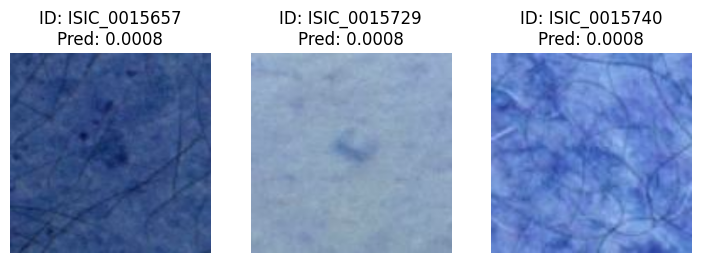

In [ ]:
import matplotlib.pyplot as plt

# Let's visualize some images and their predicted values for debugging
def visualize_predictions(generator, model, num_images=5):
    # Get a batch of data
    batch_index = 0  # You can choose any batch index
    images, isic_ids = generator.__getitem__(batch_index)  # Access a batch
    predictions = model.predict(images)

    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"ID: {isic_ids[i]}\nPred: {predictions[i][0]:.4f}")  # Adjust indexing for predictions
        plt.axis('off')
    plt.show()


# Modify the __getitem__ method to return both images and their ISIC IDs for debugging purposes
class TestSkinCancerDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, hdf5_file_path, batch_size, image_size):
        self.metadata = metadata
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.image_size = image_size

    def __len__(self):
        return len(self.metadata) // self.batch_size + int(len(self.metadata) % self.batch_size != 0)

    def __getitem__(self, idx):
        batch_metadata = self.metadata.iloc[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        isic_ids = []

        with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
            for _, row in batch_metadata.iterrows():
                isic_id = row['isic_id']
                isic_ids.append(isic_id)

                image_data = hdf5_file[isic_id][()]
                if isinstance(image_data, bytes):
                    image_data = np.frombuffer(image_data, dtype=np.uint8)
                    image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                else:
                    image_data = np.array(image_data)

                if image_data.dtype != np.uint8:
                    image_data = image_data.astype(np.uint8)

                resized_image = cv2.resize(image_data, self.image_size)
                normalized_image = resized_image / 255.0

                batch_images.append(normalized_image)

        return np.array(batch_images), isic_ids

# Initialize the test data generator
test_generator = TestSkinCancerDataGenerator(test_metadata, hdf5_test_file_path, batch_size, image_size)

# Load the trained model
model = tf.keras.models.load_model(model_checkpoint_path)

# Visualize some predictions
visualize_predictions(test_generator, model, num_images=5)


In [ ]:
# Paths to the required files
hdf5_test_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"
test_metadata_csv = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv"
model_checkpoint_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/skin_cancer_detection_model.keras"
submission_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/submission.csv"

In [ ]:
import h5py
import numpy as np
import cv2

def process_test_images_in_batches(hdf5_file_path, batch_size, image_size):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        isic_ids = list(hdf5_file.keys())
        num_images = len(isic_ids)

        for start in range(0, num_images, batch_size):
            end = min(start + batch_size, num_images)
            batch_isic_ids = isic_ids[start:end]

            batch_images = []

            for isic_id in batch_isic_ids:
                try:
                    image_data = hdf5_file[isic_id][()]

                    if isinstance(image_data, bytes):
                        image_data = np.frombuffer(image_data, dtype=np.uint8)
                        image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                    else:
                        image_data = np.array(image_data)

                    if image_data.dtype != np.uint8:
                        image_data = image_data.astype(np.uint8)

                    resized_image = cv2.resize(image_data, image_size)
                    normalized_image = resized_image / 255.0

                    batch_images.append(normalized_image)

                except Exception as e:
                    print(f"Error processing image {isic_id}: {e}")
                    continue

            yield np.array(batch_images), batch_isic_ids


In [ ]:
import pandas as pd

def load_test_metadata(metadata_file_path):
    # Load the metadata
    metadata = pd.read_csv(metadata_file_path)
    return metadata

# Usage
test_metadata = load_test_metadata("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv")
print(f"Loaded test metadata with {len(test_metadata)} records.")


Loaded test metadata with 3 records.


# test saammmm

In [ ]:
!pip install opencv-python

import tensorflow as tf
import h5py
import numpy as np
import cv2
import pandas as pd
from tensorflow.keras.models import load_model


class SkinCancerDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, metadata, hdf5_file_path, batch_size, image_size):
        self.metadata = metadata
        self.hdf5_file_path = hdf5_file_path
        self.batch_size = batch_size
        self.image_size = image_size

    def __len__(self):
        return int(np.ceil(len(self.metadata) / self.batch_size))

    def __getitem__(self, idx):
        batch_metadata = self.metadata.iloc[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        batch_isic_ids = []  # This is not used for prediction, but can be useful for tracking

        with h5py.File(self.hdf5_file_path, 'r') as hdf5_file:
            for _, row in batch_metadata.iterrows():
                isic_id = row['isic_id']

                image_data = hdf5_file[isic_id][()]

                if isinstance(image_data, bytes):
                    image_data = np.frombuffer(image_data, dtype=np.uint8)
                    image_data = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
                else:
                    image_data = np.array(image_data)

                if image_data.dtype != np.uint8:
                    image_data = image_data.astype(np.uint8)

                resized_image = cv2.resize(image_data, self.image_size)
                normalized_image = resized_image / 255.0

                batch_images.append(normalized_image)
                batch_isic_ids.append(isic_id)  # Store the ID for potential later use

        return np.array(batch_images)  # Return only the image arrays for prediction

# Define file paths and parameters
hdf5_test_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"
test_metadata_csv = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv"
model_checkpoint_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/skin_cancer_detection_model.keras"
image_size = (224, 224)  # Desired size for the images (height, width)
batch_size = 32  # Number of images to process in each batch

# Load test metadata
test_metadata = pd.read_csv(test_metadata_csv)

# Calculate steps per epoch
steps_per_test = len(test_metadata) // batch_size + int(len(test_metadata) % batch_size != 0)

# Load the trained model
model = load_model(model_checkpoint_path)

# Create a test data generator
test_generator = SkinCancerDataGenerator(
    test_metadata,
    hdf5_test_file_path,
    batch_size=batch_size,
    image_size=image_size
)

# Generate predictions
predictions = model.predict(test_generator, steps=steps_per_test, verbose=1)

# Ensure predictions are flattened
predictions = predictions.flatten()

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'isic_id': test_metadata['isic_id'],
    'target': predictions  # Use the predictions directly
})

# Save the submission DataFrame to a CSV file
# submission_df.to_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/submission.csv", index=False)

# Display the first few rows of the DataFrame
print(submission_df.head())

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
        isic_id    target
0  ISIC_0015657  0.000795
1  ISIC_0015729  0.000795
2  ISIC_0015740  0.000795


In [ ]:
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

# Start Again

In [ ]:
import pandas as pd
import numpy as np
import h5py
import cv2
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence


In [ ]:
import os
import h5py
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models


In [ ]:
# Load the training metadata
train_metadata_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
train_metadata = pd.read_csv(train_metadata_path, low_memory=False)

# Define the numerical columns based on the provided metadata
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

# Convert numerical columns to appropriate data types
for col in numerical_columns:
    train_metadata[col] = pd.to_numeric(train_metadata[col], errors='coerce')

# Define categorical columns based on the provided metadata
categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Preprocess categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encode
])

# Preprocess numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale the data
])

# Combine categorical and numerical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preserve the original index before transforming
original_train_index = train_metadata.index

# Fit and transform the data while preserving the index
train_metadata_processed = preprocessor.fit_transform(train_metadata.drop(['isic_id', 'target'], axis=1))

# Convert the processed metadata into a DataFrame with the original index
train_metadata_processed_df = pd.DataFrame(train_metadata_processed.toarray(), index=original_train_index)

# Display the first few rows to confirm
print(train_metadata_processed_df.head())

# Check index alignment
print(train_metadata_processed_df.index.equals(train_metadata.index))  # Should return True


      0         1         2         3         4         5         6      \
0  0.146658 -0.511069  0.067613  0.380443 -0.257500 -0.659882 -0.192995   
1  0.146658 -1.624050  2.935019  2.959583 -0.369545 -0.527265  1.126869   
2  0.146658 -0.304536  0.650540  0.625867  1.835454  1.466075  1.644677   
3  0.515699 -0.407803 -1.433104 -0.780446 -1.294561 -1.291919 -1.583639   
4 -0.222383 -0.688917  1.188031  1.455843 -0.344179 -0.268249  0.250792   

      7         8         9      ...  22261  22262  22263  22264  22265  \
0 -0.407543 -0.288931 -0.917620  ...    0.0    0.0    1.0    1.0    0.0   
1  0.906538 -2.708061 -3.006591  ...    0.0    0.0    1.0    1.0    0.0   
2  1.385391  0.835409  0.339647  ...    0.0    0.0    1.0    1.0    0.0   
3 -1.355725  0.318926 -0.166282  ...    0.0    0.0    1.0    1.0    0.0   
4  0.349419 -1.396095 -1.590171  ...    0.0    0.0    1.0    1.0    0.0   

   22266  22267  22268  22269  22270  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# # Load the training metadata with specified dtypes to avoid DtypeWarning
# dtype_spec = {
#     'col_51': 'str',  # Specify 'str' or the appropriate dtype for the mixed type columns
#     'col_52': 'str'
# }
# train_metadata_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
# train_metadata = pd.read_csv(train_metadata_path, dtype=dtype_spec)

# # Define the numerical columns based on the provided metadata
# numerical_columns = [
#     'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
#     'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
#     'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
#     'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
#     'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
#     'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
#     'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
#     'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
#     'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
#     'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
# ]

# # Convert numerical columns to appropriate data types
# for col in numerical_columns:
#     train_metadata[col] = pd.to_numeric(train_metadata[col], errors='coerce')

# # Define categorical columns based on the provided metadata
# categorical_columns = [
#     'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
#     'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
#     'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
#     'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
# ]

# # Preprocess categorical data
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-Hot Encode with dense output
# ])

# # Preprocess numerical data
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
#     ('scaler', StandardScaler())  # Scale the data
# ])

# # Combine categorical and numerical transformers
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_columns),
#         ('cat', categorical_transformer, categorical_columns)
#     ])

# # Preserve the original index before transforming
# original_train_index = train_metadata.index

# # Fit and transform the data while preserving the column names
# train_metadata_processed = preprocessor.fit_transform(train_metadata.drop(['isic_id', 'target'], axis=1))

# # Retrieve the transformed numerical and categorical feature names
# num_feature_names = numerical_columns
# cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)

# # Combine feature names for the final DataFrame
# all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# # Convert the processed metadata into a DataFrame with the original index and feature names
# train_metadata_processed_df = pd.DataFrame(train_metadata_processed, columns=all_feature_names, index=original_train_index)

# # Display the first few rows to confirm
# print(train_metadata_processed_df.head())

# # Check index alignment
# print(train_metadata_processed_df.index.equals(train_metadata.index))  # Should return True


<ipython-input-1-b88f71c60cac>:14: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv(train_metadata_path, dtype=dtype_spec)


In [ ]:
len(train_metadata_processed_df)

401059

In [ ]:
# # Path to your HDF5 file and output directory for processed images
# hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
# output_dir = "processed_images"
# os.makedirs(output_dir, exist_ok=True)

# # Function to retrieve and preprocess images
# def preprocess_image(image_data, target_size=(224, 224)):
#     image = np.frombuffer(image_data, dtype=np.uint8)
#     img = cv2.imdecode(image, cv2.IMREAD_COLOR)
#     img = cv2.resize(img, target_size)
#     img = img / 255.0  # Normalize the image
#     return img

# # Function to save image to file
# def save_image(img, path):
#     img_uint8 = (img * 255).astype(np.uint8)
#     cv2.imwrite(path, img_uint8)

# # Process and save images
# def process_images_in_batches(isic_ids, batch_size=100):
#     with h5py.File(hdf5_path, "r") as hdf5_file:
#         for start in range(0, len(isic_ids), batch_size):
#             batch_ids = isic_ids[start:start + batch_size]
#             for isic_id in batch_ids:
#                 if isic_id in hdf5_file:
#                     image_data = hdf5_file[isic_id][()]
#                     img = preprocess_image(image_data)
#                     image_path = os.path.join(output_dir, f"{isic_id}.png")
#                     save_image(img, image_path)

# # Process images based on 'isic_id' in train_metadata
# process_images_in_batches(train_metadata['isic_id'].tolist(), batch_size=100)
# print("Image processing complete.")


Image processing complete.


In [ ]:
import h5py
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to your HDF5 file and output directory for processed images
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

# Function to retrieve and preprocess images
def preprocess_image(image_data, target_size=(224, 224)):
    # Decode the byte string into a NumPy array
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # Resize the image to the target size
    img = cv2.resize(img, target_size)

    # Normalize the image
    img = img / 255.0

    return img

# Function to save image to file
def save_image(img, path):
    # Convert the image from float [0,1] to uint8 [0,255]
    img_uint8 = (img * 255).astype(np.uint8)
    cv2.imwrite(path, img_uint8)

# Generator function to process images in batches
def process_images_in_batches(isic_ids, batch_size=100):
    # Open the HDF5 file
    with h5py.File(hdf5_path, "r") as hdf5_file:
        for start in range(0, len(isic_ids), batch_size):
            batch_ids = isic_ids[start:start + batch_size]
            for isic_id in batch_ids:
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]  # Access the image data
                    img = preprocess_image(image_data)
                    image_path = os.path.join(output_dir, f"{isic_id}.png")
                    save_image(img, image_path)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")

# Assuming 'train_metadata' is a DataFrame containing 'isic_id' column
isic_ids = train_metadata['isic_id'].tolist()
batch_size = 100  # Adjust batch size according to your system's memory capacity
process_images_in_batches(isic_ids, batch_size)

print("Image processing complete.")


Image processing complete.


In [ ]:
# Function to load an image from file
def load_processed_image(isic_id, target_size=(224, 224)):
    image_path = os.path.join(output_dir, f"{isic_id}.png")
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return img_array

# Function to align metadata and images by creating a generator
def image_metadata_generator(metadata_df, batch_size=100):
    num_samples = len(metadata_df)
    for start in range(0, num_samples, batch_size):
        batch_ids = metadata_df['isic_id'].iloc[start:start + batch_size]
        batch_images = []
        batch_metadata = metadata_df.iloc[start:start + batch_size].drop(columns=['isic_id', 'target']).values
        for isic_id in batch_ids:
            img_array = load_processed_image(isic_id)
            batch_images.append(img_array)
        yield np.array(batch_images), batch_metadata

# Example: Using the generator
generator = image_metadata_generator(train_metadata, batch_size=100)
batch_images, batch_metadata = next(generator)

print("Batch of images shape:", batch_images.shape)
print("Batch of metadata shape:", batch_metadata.shape)


Batch of images shape: (100, 224, 224, 3)
Batch of metadata shape: (100, 53)


In [ ]:
train_df, val_df = train_test_split(train_metadata, test_size=0.2, random_state=42)

# Verify the split
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))


Training set size: 320847
Validation set size: 80212


In [ ]:
class ImageMetadataGenerator(Sequence):
    def __init__(self, dataframe, batch_size, target_size=(224, 224)):
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.target_size = target_size
        self.indices = dataframe.index.tolist()

    def __len__(self):
        return int(np.ceil(len(self.dataframe) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        images_batch = []
        metadata_batch = []
        targets_batch = []

        for i in batch_indices:
            isic_id = self.dataframe.loc[i, 'isic_id']
            img = load_img(os.path.join(output_dir, f"{isic_id}.png"), target_size=self.target_size)
            img_array = img_to_array(img) / 255.0
            images_batch.append(img_array)

            metadata = train_metadata_processed_df.loc[i].values
            metadata_batch.append(metadata)

            target = self.dataframe.loc[i, 'target']
            targets_batch.append(target)

        return np.array(images_batch), np.array(metadata_batch), np.array(targets_batch)


In [ ]:
batch_size = 32
train_generator = ImageMetadataGenerator(train_df, batch_size=batch_size)
images_batch, metadata_batch, targets_batch = train_generator[0]

print("Image batch shape:", images_batch.shape)
print("Metadata batch shape:", metadata_batch.shape)
print("Target batch shape:", targets_batch.shape)


Image batch shape: (32, 224, 224, 3)
Metadata batch shape: (32, 14)
Target batch shape: (32,)


In [ ]:
# Load the training metadata
train_metadata_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
train_metadata = pd.read_csv(train_metadata_path)

# Display the first few rows to understand the structure
print(train_metadata.head())


<ipython-input-2-32d394a98be6>:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv(train_metadata_path)


        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

In [ ]:
# Define the numerical columns based on the provided metadata
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

# Convert numerical columns to appropriate data types
for col in numerical_columns:
    train_metadata[col] = pd.to_numeric(train_metadata[col], errors='coerce')

# Define categorical columns based on the provided metadata
categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Preprocess categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encode
])

# Preprocess numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale the data
])

# Combine categorical and numerical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preserve the original index before transforming
original_train_index = train_metadata.index

# Fit and transform the data while preserving the index
train_metadata_processed = preprocessor.fit_transform(train_metadata.drop(['isic_id', 'target'], axis=1))

# Convert the processed metadata into a DataFrame with the original index
train_metadata_processed_df = pd.DataFrame(train_metadata_processed.toarray(), index=original_train_index)

# Display the first few rows to confirm
print(train_metadata_processed_df.head())

# Check index alignment
print(train_metadata_processed_df.index.equals(train_metadata.index))  # Should return True


      0         1         2         3         4         5         6      \
0  0.146658 -0.511069  0.067613  0.380443 -0.257500 -0.659882 -0.192995   
1  0.146658 -1.624050  2.935019  2.959583 -0.369545 -0.527265  1.126869   
2  0.146658 -0.304536  0.650540  0.625867  1.835454  1.466075  1.644677   
3  0.515699 -0.407803 -1.433104 -0.780446 -1.294561 -1.291919 -1.583639   
4 -0.222383 -0.688917  1.188031  1.455843 -0.344179 -0.268249  0.250792   

      7         8         9      ...  22261  22262  22263  22264  22265  \
0 -0.407543 -0.288931 -0.917620  ...    0.0    0.0    1.0    1.0    0.0   
1  0.906538 -2.708061 -3.006591  ...    0.0    0.0    1.0    1.0    0.0   
2  1.385391  0.835409  0.339647  ...    0.0    0.0    1.0    1.0    0.0   
3 -1.355725  0.318926 -0.166282  ...    0.0    0.0    1.0    1.0    0.0   
4  0.349419 -1.396095 -1.590171  ...    0.0    0.0    1.0    1.0    0.0   

   22266  22267  22268  22269  22270  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0

In [ ]:
# Check index alignment
print(train_metadata_processed_df.index.equals(train_metadata.index))  # Should return True


True


In [ ]:
import h5py

# Load the HDF5 file
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
hdf5_file = h5py.File(hdf5_path, "r")

# List all datasets at the root level
root_keys = list(hdf5_file.keys())
print(f"Datasets at the root level: {root_keys[:10]}")  # Print the first 10 keys to check


Datasets at the root level: ['ISIC_0015670', 'ISIC_0015845', 'ISIC_0015864', 'ISIC_0015902', 'ISIC_0024200', 'ISIC_0035502', 'ISIC_0051648', 'ISIC_0051665', 'ISIC_0051710', 'ISIC_0051758']


In [ ]:
import h5py
import cv2
import numpy as np

# Path to your HDF5 file
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Open the HDF5 file
hdf5_file = h5py.File(hdf5_path, "r")

# Retrieve one image to inspect its format
sample_isic_id = list(hdf5_file.keys())[0]
sample_image = hdf5_file[sample_isic_id][()]

# Check the type and content of the image data
print("Data type:", type(sample_image))
print("Shape:", sample_image.shape if isinstance(sample_image, np.ndarray) else "N/A")
print("First few bytes:", sample_image[:100])




Data type: <class 'numpy.bytes_'>
Shape: N/A
First few bytes: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c'


In [ ]:
import h5py
import cv2
import numpy as np
import os

# Path to your HDF5 file
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

# Function to retrieve and preprocess images
def preprocess_image(image_data, target_size=(224, 224)):
    # Decode the byte string into a NumPy array
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # Resize the image to the target size
    img = cv2.resize(img, target_size)

    # Normalize the image
    img = img / 255.0

    return img

# Function to save image to file
def save_image(img, path):
    # Convert the image from float [0,1] to uint8 [0,255]
    img_uint8 = (img * 255).astype(np.uint8)
    cv2.imwrite(path, img_uint8)

# Generator function to process images in batches
def process_images_in_batches(isic_ids, batch_size=100):
    # Open the HDF5 file
    with h5py.File(hdf5_path, "r") as hdf5_file:
        for start in range(0, len(isic_ids), batch_size):
            batch_ids = isic_ids[start:start + batch_size]
            batch_results = []
            for isic_id in batch_ids:
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]  # Access the image data
                    img = preprocess_image(image_data)
                    batch_results.append((isic_id, img))
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")

            # Optionally, save the batch results to disk or process further
            for isic_id, img in batch_results:
                image_path = os.path.join(output_dir, f"{isic_id}.png")
                save_image(img, image_path)

# Assuming 'train_metadata' is a DataFrame containing 'isic_id' column
isic_ids = train_metadata['isic_id'].tolist()
batch_size = 100  # Adjust batch size according to your system's memory capacity
process_images_in_batches(isic_ids, batch_size)

print("Image processing complete.")


Image processing complete.


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Define columns
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
    'tbp_lv_z'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type', 'tbp_lv_location',
    'tbp_lv_location_simple', 'attribution', 'copyright_license'
]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

def process_data(metadata_df):
    # Convert categorical columns to string format
    for col in categorical_columns:
        if col in metadata_df.columns:
            metadata_df[col] = metadata_df[col].astype('str')

    # Convert numerical columns to numeric
    for col in numerical_columns:
        if col in metadata_df.columns:
            metadata_df[col] = pd.to_numeric(metadata_df[col], errors='coerce')

    # Separate features and target
    X_metadata = metadata_df.drop(['isic_id', 'target'], axis=1, errors='ignore')
    y = metadata_df.get('target', pd.Series())

    # Apply preprocessing
    X_processed = preprocessor.fit_transform(X_metadata)

    # Convert sparse matrix to dense if needed
    if hasattr(X_processed, 'toarray'):
        X_processed = X_processed.toarray()

    # Retrieve feature names for categorical columns
    cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)

    # Combine feature names
    feature_names = numerical_columns + list(cat_feature_names)

    # Ensure the length matches
    if X_processed.shape[1] != len(feature_names):
        raise ValueError(f"Shape of processed data columns ({X_processed.shape[1]}) does not match number of feature names ({len(feature_names)})")

    # Create DataFrame for processed metadata
    return pd.DataFrame(X_processed, columns=feature_names, index=metadata_df.index), y

# Load the entire dataset
metadata_df = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv")

# Process the entire dataset
X_processed, y = process_data(metadata_df)

# Shuffle the dataset
X_processed, y = shuffle(X_processed, y, random_state=42)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


<ipython-input-9-8a6afe03e0ea>:78: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv")
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set shape: (320847, 85)
Validation set shape: (80212, 85)


In [ ]:
import h5py
import cv2
import numpy as np
import os

# Path to your HDF5 file
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

# Function to retrieve and preprocess images
def preprocess_image(image_data, target_size=(224, 224)):
    # Decode the byte string into a NumPy array
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # Resize the image to the target size
    img = cv2.resize(img, target_size)

    # Normalize the image
    img = img / 255.0

    return img

# Function to save image to file
def save_image(img, path):
    # Convert the image from float [0,1] to uint8 [0,255]
    img_uint8 = (img * 255).astype(np.uint8)
    cv2.imwrite(path, img_uint8)

# Generator function to process images in batches
def process_images_in_batches(isic_ids, batch_size=100):
    # Open the HDF5 file
    with h5py.File(hdf5_path, "r") as hdf5_file:
        for start in range(0, len(isic_ids), batch_size):
            batch_ids = isic_ids[start:start + batch_size]
            batch_results = []
            for isic_id in batch_ids:
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]  # Access the image data
                    img = preprocess_image(image_data)
                    batch_results.append((isic_id, img))
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")

            # Save the batch results to disk
            for isic_id, img in batch_results:
                image_path = os.path.join(output_dir, f"{isic_id}.png")
                save_image(img, image_path)

# Extract ISIC IDs from metadata
isic_ids = metadata_df['isic_id'].tolist()
batch_size = 16  # Adjust batch size according to your system's memory capacity
process_images_in_batches(isic_ids, batch_size)

print("Image processing complete.")


Image processing complete.


In [ ]:
import tensorflow as tf
import numpy as np
import os

# Function to load and preprocess images
def load_images(image_dir, image_size=(224, 224)):
    image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.png')]
    images = []
    for path in image_paths:
        img = tf.keras.preprocessing.image.load_img(path, target_size=image_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images), [os.path.basename(p).split('.')[0] for p in image_paths]

# Load images
images, image_ids = load_images(output_dir)

# Map image IDs to metadata indices
id_to_index = {id_: i for i, id_ in enumerate(metadata_df['isic_id'])}

# Reorder images to match the order of metadata
reordered_images = np.array([images[id_to_index[img_id]] for img_id in image_ids if img_id in id_to_index])

print("Images shape:", reordered_images.shape)


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import h5py
import cv2
import numpy as np
import os
import tensorflow as tf

# Preprocessing metadata
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
    'tbp_lv_z'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type', 'tbp_lv_location',
    'tbp_lv_location_simple', 'attribution', 'copyright_license'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

def process_data(metadata_df):
    metadata_df[categorical_columns] = metadata_df[categorical_columns].astype('str')
    metadata_df[numerical_columns] = metadata_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

    X_metadata = metadata_df.drop(['isic_id', 'target'], axis=1, errors='ignore')
    y = metadata_df.get('target', pd.Series())
    X_processed = preprocessor.fit_transform(X_metadata)

    if hasattr(X_processed, 'toarray'):
        X_processed = X_processed.toarray()

    cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)
    feature_names = numerical_columns + list(cat_feature_names)

    if X_processed.shape[1] != len(feature_names):
        raise ValueError(f"Shape of processed data columns ({X_processed.shape[1]}) does not match number of feature names ({len(feature_names)})")

    return pd.DataFrame(X_processed, columns=feature_names, index=metadata_df.index), y

metadata_df = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv")
X_processed, y = process_data(metadata_df)
X_processed, y = shuffle(X_processed, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Path to your HDF5 file
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

def save_image(img, path):
    img_uint8 = (img * 255).astype(np.uint8)
    cv2.imwrite(path, img_uint8)

def process_images_in_batches(isic_ids, batch_size=100):
    with h5py.File(hdf5_path, "r") as hdf5_file:
        for start in range(0, len(isic_ids), batch_size):
            batch_ids = isic_ids[start:start + batch_size]
            for isic_id in batch_ids:
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data)
                    image_path = os.path.join(output_dir, f"{isic_id}.png")
                    save_image(img, image_path)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")

isic_ids = metadata_df['isic_id'].tolist()
batch_size = 16
process_images_in_batches(isic_ids, batch_size)

print("Image processing complete.")

# Generator to load images in batches
def image_generator(image_dir, batch_size=32, image_size=(224, 224)):
    image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.png')]
    total_images = len(image_paths)

    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_paths = image_paths[start:end]
            images = []
            for path in batch_paths:
                img = tf.keras.preprocessing.image.load_img(path, target_size=image_size)
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                images.append(img_array)
            yield np.array(images), [os.path.basename(p).split('.')[0] for p in batch_paths]

image_gen = image_generator(output_dir)

# Map image IDs to metadata indices
id_to_index = {id_: i for i, id_ in enumerate(metadata_df['isic_id'])}

# Example usage of the generator to match metadata and image batches
batch_images, batch_image_ids = next(image_gen)
batch_indices = [id_to_index[img_id] for img_id in batch_image_ids if img_id in id_to_index]
batch_metadata = X_processed.iloc[batch_indices]

print("Batch images shape:", batch_images.shape)
print("Batch metadata shape:", batch_metadata.shape)


<ipython-input-18-45281ee51e32>:65: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv")
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set shape: (320847, 85)
Validation set shape: (80212, 85)
Image processing complete.
Batch images shape: (32, 224, 224, 3)
Batch metadata shape: (32, 85)


# here

In [ ]:
import pandas as pd
import h5py
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Function to ensure ID formatting consistency
def format_id(isic_id):
    return str(isic_id).strip().upper()

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Generator to yield images and metadata in batches
def batch_generator(X, y, hdf5_file, batch_size=32, image_size=(224, 224)):
    total_samples = X.shape[0]

    while True:
        for start in range(0, total_samples, batch_size):
            end = min(start + batch_size, total_samples)
            batch_indices = list(range(start, end))
            batch_metadata = X.iloc[batch_indices]
            batch_targets = y.iloc[batch_indices]

            images = []
            for idx in batch_indices:
                isic_id = format_id(batch_metadata.iloc[idx]['isic_id'])
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")

            if images:  # Check if there are any valid images
                yield np.array(images), batch_metadata, np.array(batch_targets)
            else:
                print("Warning: No images found for this batch.")

# Path to HDF5 file
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Load metadata
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types
metadata_df['isic_id'] = metadata_df['isic_id'].apply(format_id)

# Extract IDs from metadata and HDF5 for comparison
metadata_ids = set(metadata_df['isic_id'].values)

with h5py.File(hdf5_path, "r") as hdf5_file:
    hdf5_ids = set(hdf5_file.keys())
    # Validate that all metadata IDs exist in HDF5
    if not validate_ids_in_hdf5(metadata_ids, hdf5_ids):
        print("Some metadata IDs do not have corresponding images in the HDF5 file.")

    # Shuffle and split the processed data
    X_processed, y = shuffle(metadata_df.drop('target', axis=1), metadata_df['target'], random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # Reset indices after shuffling and splitting
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    X_val.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)

    # Create generators
    train_gen = batch_generator(X_train, y_train, hdf5_file, batch_size=16)
    val_gen = batch_generator(X_val, y_val, hdf5_file, batch_size=16)

    # Example to fetch one batch
    train_batch_images, train_batch_metadata, train_batch_targets = next(train_gen)

    # Print shapes for debugging
    print("Train batch images shape:", train_batch_images.shape)
    print("Train batch metadata shape:", train_batch_metadata.shape)
    print("Train batch targets shape:", train_batch_targets.shape)


<ipython-input-17-2e7627bfba29>:62: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types


All metadata IDs are found in the HDF5 file.
Train batch images shape: (16, 224, 224, 3)
Train batch metadata shape: (16, 54)
Train batch targets shape: (16,)


# the step 1 here works with 10,000 samples

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import h5py
import cv2
import numpy as np
import tensorflow as tf

# Define columns for metadata
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Create the preprocessor pipeline for metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a sample to determine the full encoding
def fit_preprocessor_sample(metadata_file, sample_size=10000):
    sample_df = pd.read_csv(metadata_file, nrows=sample_size)
    sample_df[categorical_columns] = sample_df[categorical_columns].astype('str')
    sample_df[numerical_columns] = sample_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

    X_sample = sample_df.drop(['isic_id', 'target'], axis=1, errors='ignore')
    preprocessor.fit(X_sample)

# Process metadata in chunks
def process_metadata_in_chunks(metadata_file, chunk_size=1000):
    processed_chunks = []
    y_chunks = []

    for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')

        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        y_chunk = chunk.get('target', pd.Series(index=chunk.index))

        X_processed_chunk = preprocessor.transform(X_chunk)

        if hasattr(X_processed_chunk, 'toarray'):
            X_processed_chunk = X_processed_chunk.toarray()

        processed_chunks.append(X_processed_chunk)
        y_chunks.append(y_chunk)

    return np.vstack(processed_chunks), pd.concat(y_chunks)

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Image generator function
def image_generator_from_hdf5(hdf5_file, isic_ids, batch_size=32, image_size=(224, 224)):
    total_images = len(isic_ids)

    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_ids = isic_ids[start:end]
            images = []
            image_ids = []
            for isic_id in batch_ids:
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    image_ids.append(isic_id)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images:
                yield np.array(images), image_ids
            else:
                print("Warning: No images found for this batch.")

# Path to HDF5 file
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"


# Load metadata
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types
metadata_df['isic_id'] = metadata_df['isic_id'].str.strip().str.upper()  # Ensure consistent ID formatting

# Extract and save the ISIC IDs separately
isic_ids = metadata_df['isic_id'].values

# Fit the preprocessor on a sample to determine the full encoding
fit_preprocessor_sample(metadata_file)

# Process metadata in chunks
X_processed, y = process_metadata_in_chunks(metadata_file, chunk_size=1000)

# Shuffle and split the processed data
X_processed, y, isic_ids = shuffle(X_processed, y, isic_ids, random_state=42)
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(X_processed,
                                                                      y, isic_ids,
                                                                      test_size=0.2,
                                                                      random_state=42
)

# Reset indices after shuffling and splitting
X_train = pd.DataFrame(X_train).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = pd.DataFrame(X_val).reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Create and use batch generators
with h5py.File(hdf5_path, "r") as hdf5_file:
    hdf5_ids = set(hdf5_file.keys())

    # Validate that all metadata IDs exist in HDF5
    if not validate_ids_in_hdf5(set(isic_ids), hdf5_ids):
        print("Some metadata IDs do not have corresponding images in the HDF5 file.")

    train_gen = image_generator_from_hdf5(hdf5_file, train_ids, batch_size=16)
    val_gen = image_generator_from_hdf5(hdf5_file, val_ids, batch_size=16)

    # Example to fetch one batch
    train_batch_images, train_batch_metadata = next(train_gen)

    # Print shapes for debugging
    print("Train batch images shape:", train_batch_images.shape)
    print("Train batch metadata shape:", len(train_batch_metadata))


<ipython-input-4-104011aaf28d>:128: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warni

All metadata IDs are found in the HDF5 file.
Train batch images shape: (16, 224, 224, 3)
Train batch metadata shape: 16


# now i want to try it with all of the data

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import h5py
import cv2
import numpy as np
import tensorflow as tf

# Define columns for metadata
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Create the preprocessor pipeline for metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a sample to determine the full encoding
def fit_preprocessor_sample(metadata_file, sample_size=10000):
    sample_df = pd.read_csv(metadata_file, nrows=sample_size)
    sample_df[categorical_columns] = sample_df[categorical_columns].astype('str')
    sample_df[numerical_columns] = sample_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

    X_sample = sample_df.drop(['isic_id', 'target'], axis=1, errors='ignore')
    preprocessor.fit(X_sample)

# Process metadata in chunks
def process_metadata_in_chunks(metadata_file, chunk_size=1000):
    processed_chunks = []
    y_chunks = []

    for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')

        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        y_chunk = chunk.get('target', pd.Series(index=chunk.index))

        X_processed_chunk = preprocessor.transform(X_chunk)

        if hasattr(X_processed_chunk, 'toarray'):
            X_processed_chunk = X_processed_chunk.toarray()

        processed_chunks.append(X_processed_chunk)
        y_chunks.append(y_chunk)

    return np.vstack(processed_chunks), pd.concat(y_chunks)

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Image generator function
def image_generator_from_hdf5(hdf5_file, isic_ids, batch_size=32, image_size=(224, 224)):
    total_images = len(isic_ids)

    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_ids = isic_ids[start:end]
            images = []
            image_ids = []
            for isic_id in batch_ids:
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    image_ids.append(isic_id)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images:
                yield np.array(images), image_ids
            else:
                print("Warning: No images found for this batch.")

# Path to files
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Load metadata
metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types
metadata_df['isic_id'] = metadata_df['isic_id'].str.strip().str.upper()  # Ensure consistent ID formatting

# Extract and save the ISIC IDs separately
isic_ids = metadata_df['isic_id'].values

# Fit the preprocessor on a sample to determine the full encoding
fit_preprocessor_sample(metadata_file)

# Process metadata in chunks
X_processed, y = process_metadata_in_chunks(metadata_file, chunk_size=1000)

# Shuffle and split the processed data
X_processed, y, isic_ids = shuffle(X_processed, y, isic_ids, random_state=42)
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(X_processed,
                                                                      y, isic_ids,
                                                                      test_size=0.2,
                                                                      random_state=42
)

# Reset indices after shuffling and splitting
X_train = pd.DataFrame(X_train).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = pd.DataFrame(X_val).reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Create and use batch generators
with h5py.File(hdf5_path, "r") as hdf5_file:
    hdf5_ids = set(hdf5_file.keys())

    # Validate that all metadata IDs exist in HDF5
    if not validate_ids_in_hdf5(set(isic_ids), hdf5_ids):
        print("Some metadata IDs do not have corresponding images in the HDF5 file.")

    train_gen = image_generator_from_hdf5(hdf5_file, train_ids, batch_size=16)
    val_gen = image_generator_from_hdf5(hdf5_file, val_ids, batch_size=16)

    # Example to fetch one batch
    train_batch_images, train_batch_metadata = next(train_gen)

    # Print shapes for debugging
    print("Train batch images shape:", train_batch_images.shape)
    print("Train batch metadata shape:", len(train_batch_metadata))


<ipython-input-5-ee05f0c61ab7>:127: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warni

All metadata IDs are found in the HDF5 file.
Train batch images shape: (16, 224, 224, 3)
Train batch metadata shape: 16


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import h5py
import cv2
import numpy as np
import tensorflow as tf

# Define columns for metadata
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x',
    'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Create the preprocessor pipeline for metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on all data
def fit_preprocessor_all(metadata_file):
    for chunk in pd.read_csv(metadata_file, chunksize=10000):  # Adjust chunk_size if needed
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')

        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        preprocessor.fit(X_chunk)
    print("Preprocessor fitted on all data.")

# Process metadata in chunks
def process_metadata_in_chunks(metadata_file, chunk_size=1000):
    processed_chunks = []
    y_chunks = []

    for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')

        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        y_chunk = chunk.get('target', pd.Series(index=chunk.index))

        X_processed_chunk = preprocessor.transform(X_chunk)

        if hasattr(X_processed_chunk, 'toarray'):
            X_processed_chunk = X_processed_chunk.toarray()

        processed_chunks.append(X_processed_chunk)
        y_chunks.append(y_chunk)

    return np.vstack(processed_chunks), pd.concat(y_chunks)

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Image generator function
def image_generator_from_hdf5(hdf5_file, isic_ids, batch_size=32, image_size=(224, 224)):
    total_images = len(isic_ids)

    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_ids = isic_ids[start:end]
            images = []
            image_ids = []
            for isic_id in batch_ids:
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    image_ids.append(isic_id)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images:
                yield np.array(images), image_ids
            else:
                print("Warning: No images found for this batch.")

# Path to files
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Load metadata
metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types
metadata_df['isic_id'] = metadata_df['isic_id'].str.strip().str.upper()  # Ensure consistent ID formatting

# Extract and save the ISIC IDs separately
isic_ids = metadata_df['isic_id'].values

# Fit the preprocessor on all data
fit_preprocessor_all(metadata_file)

# Process metadata in chunks
X_processed, y = process_metadata_in_chunks(metadata_file, chunk_size=1000)

# Shuffle and split the processed data
X_processed, y, isic_ids = shuffle(X_processed, y, isic_ids, random_state=42)
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(X_processed,
                                                                      y, isic_ids,
                                                                      test_size=0.2,
                                                                      random_state=42
)

# Reset indices after shuffling and splitting
X_train = pd.DataFrame(X_train).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = pd.DataFrame(X_val).reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Create and use batch generators
with h5py.File(hdf5_path, "r") as hdf5_file:
    hdf5_ids = set(hdf5_file.keys())

    # Validate that all metadata IDs exist in HDF5
    if not validate_ids_in_hdf5(set(isic_ids), hdf5_ids):
        print("Some metadata IDs do not have corresponding images in the HDF5 file.")

    train_gen = image_generator_from_hdf5(hdf5_file, train_ids, batch_size=16)
    val_gen = image_generator_from_hdf5(hdf5_file, val_ids, batch_size=16)

    # Example to fetch one batch
    train_batch_images, train_batch_metadata = next(train_gen)

    # Print shapes for debugging
    print("Train batch images shape:", train_batch_images.shape)
    print("Train batch metadata shape:", len(train_batch_metadata))


<ipython-input-6-f741bbd39719>:128: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(metadata_file, dtype={'Column_Name': str})  # Adjust dtype for columns with mixed types
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` t

Preprocessor fitted on all data.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-p

All metadata IDs are found in the HDF5 file.
Train batch images shape: (16, 224, 224, 3)
Train batch metadata shape: 16


# loading all data set works

In [ ]:
def create_tf_dataset(X, y, image_gen, batch_size=32):
    """
    Create a TensorFlow dataset from the preprocessed metadata and image generator.
    """
    def generator():
        for batch_images, batch_ids in image_gen:
            # Get metadata for this batch of IDs
            batch_metadata = pd.DataFrame(metadata_df.loc[metadata_df['isic_id'].isin(batch_ids)])
            batch_metadata = batch_metadata.drop(['isic_id', 'target'], axis=1, errors='ignore').values
            batch_labels = y[batch_metadata[:, 0].astype(int)]  # Adjust if needed to match indices

            # Yield images and metadata
            yield (batch_images, batch_metadata), batch_labels

    return tf.data.Dataset.from_generator(generator,
                                          output_signature=(
                                              (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
                                               tf.TensorSpec(shape=(None, len(numerical_columns) + len(categorical_columns)), dtype=tf.float32)),
                                              tf.TensorSpec(shape=(None,), dtype=tf.float32)
                                          )).batch(batch_size)

# Create TensorFlow datasets using preprocessed metadata and image generator
train_dataset = create_tf_dataset(X_train, y_train, image_generator_from_hdf5(hdf5_path, train_ids, batch_size=16))
val_dataset = create_tf_dataset(X_val, y_val, image_generator_from_hdf5(hdf5_path, val_ids, batch_size=16))


In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model

def create_model():
    # Image branch
    image_input = Input(shape=(224, 224, 3), name='image_input')
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)

    # Metadata branch
    metadata_input = Input(shape=(len(numerical_columns) + len(categorical_columns),), name='metadata_input')
    y = Dense(64, activation='relu')(metadata_input)

    # Concatenate branches
    combined = Concatenate()([x, y])
    z = Dense(64, activation='relu')(combined)
    output = Dense(1, activation='sigmoid')(z)

    model = Model(inputs=[image_input, metadata_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


In [ ]:
import pandas as pd
import numpy as np
import h5py
import cv2
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define numerical and categorical columns
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
    'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
    'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
    'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
    'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
    'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm',
    'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Create the preprocessor pipeline for metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a representative sample
def fit_preprocessor_sample(metadata_file, sample_size=10000):
    sample_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=10000):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        sample_chunks.append(X_chunk)
        if len(sample_chunks) * 10000 >= sample_size:
            break
    sample = pd.concat(sample_chunks, axis=0).head(sample_size)
    preprocessor.fit(sample)
    print("Preprocessor fitted on sample data.")

# Process metadata in chunks using the fitted preprocessor
def process_metadata_in_chunks(metadata_file, chunk_size=1000):
    processed_chunks = []
    y_chunks = []
    id_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        y_chunk = chunk['target']
        ids_chunk = chunk['isic_id']
        X_processed_chunk = preprocessor.transform(X_chunk)
        if hasattr(X_processed_chunk, 'toarray'):
            X_processed_chunk = X_processed_chunk.toarray()
        processed_chunks.append(X_processed_chunk)
        y_chunks.append(y_chunk)
        id_chunks.append(ids_chunk)
    X = np.vstack(processed_chunks)
    y = pd.concat(y_chunks).values
    ids = pd.concat(id_chunks).values
    return X, y, ids

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Image generator function
def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = batch_metadata['isic_id'].values
            batch_targets = batch_metadata['target'].values
            images = []
            metadata = []
            targets = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    # Fetch corresponding preprocessed metadata (excluding 'isic_id' and 'target')
                    metadata_row = batch_metadata.drop(['isic_id', 'target'], axis=1).values
                    metadata.append(metadata_row[0])
                    targets.append(batch_targets[idx])
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                images_array = np.array(images)
                metadata_array = np.array(metadata)
                targets_array = np.array(targets)
                yield ([images_array, metadata_array], targets_array)  # Return as tuple
            else:
                print("Warning: No images or metadata found for this batch.")


# Path to files
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Step 1: Fit the preprocessor on a sample
fit_preprocessor_sample(metadata_file, sample_size=10000)

# Step 2: Process all metadata
X_processed, y, id_processed = process_metadata_in_chunks(metadata_file, chunk_size=10000)

# Step 3: Create DataFrame with preprocessed metadata and include 'target'
preprocessed_metadata = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
preprocessed_metadata['isic_id'] = id_processed
preprocessed_metadata['target'] = y

# Optional: Validate column consistency
expected_num_columns = len(preprocessor.get_feature_names_out())
actual_num_columns = preprocessed_metadata.drop(['isic_id', 'target'], axis=1).shape[1]
print(f"Expected number of features: {expected_num_columns}")
print(f"Actual number of features: {actual_num_columns}")

if expected_num_columns != actual_num_columns:
    print("There is a mismatch in the number of features after preprocessing.")
    # Additional debugging can be done here
else:
    print("Preprocessed metadata has the correct number of features.")

# Step 4: Shuffle and split the processed data
X_shuffled, y_shuffled, ids_shuffled = shuffle(X_processed, y, id_processed, random_state=42)
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(
    X_shuffled, y_shuffled, ids_shuffled, test_size=0.2, random_state=42
)

# Reset indices after shuffling and splitting
train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
train_df['isic_id'] = train_ids
train_df['target'] = y_train

val_df = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
val_df['isic_id'] = val_ids
val_df['target'] = y_val

# Step 5: Build and compile the model
def build_model(image_shape, metadata_shape):
    # Image input branch
    image_input = Input(shape=image_shape, name='image_input')
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)

    # Metadata input branch
    metadata_input = Input(shape=(metadata_shape,), name='metadata_input')
    y = Dense(64, activation='relu')(metadata_input)
    y = Dropout(0.5)(y)

    # Concatenate branches
    concatenated = Concatenate()([x, y])
    z = Dense(64, activation='relu')(concatenated)
    z = Dropout(0.5)(z)
    output = Dense(1, activation='sigmoid')(z)

    model = Model(inputs=[image_input, metadata_input], outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shapes
image_shape = (224, 224, 3)
metadata_shape = X_train.shape[1]

# Create and compile the model
model = build_model(image_shape, metadata_shape)
#model.summary()

# Step 6: Create data generators
with h5py.File(hdf5_path, "r") as hdf5_file:
    train_gen = image_generator_from_hdf5(
        hdf5_file,
        train_df,
        batch_size=16,
        image_size=(224, 224)
    )
    val_gen = image_generator_from_hdf5(
        hdf5_file,
        val_df,
        batch_size=16,
        image_size=(224, 224)
    )

    # Example to fetch one batch
    train_batch = next(train_gen)
    print("Train batch images shape:", train_batch[0][0].shape)
    print("Train batch metadata shape:", train_batch[0][1].shape)
    print("Train batch target shape:", train_batch[1].shape)

    # Step 7: Train the model
    history = model.fit(
        train_gen,
        steps_per_epoch=len(train_df) // 16,
        epochs=10,
        validation_data=val_gen,
        validation_steps=len(val_df) // 16
    )

print("Training complete!")




/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessor fitted on sample data.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-p

Expected number of features: 710
Actual number of features: 710
Preprocessed metadata has the correct number of features.
Train batch images shape: (16, 224, 224, 3)
Train batch metadata shape: (16, 710)
Train batch target shape: (16,)


TypeError: `output_signature` must contain objects that are subclass of `tf.TypeSpec` but found <class 'list'> which is not.

## Everything works here

In [ ]:
import pandas as pd
import numpy as np
import h5py
import cv2
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define numerical and categorical columns
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
    'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
    'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
    'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
    'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
    'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm',
    'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Create the preprocessor pipeline for metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a representative sample
def fit_preprocessor_sample(metadata_file, sample_size=10000):
    sample_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=10000):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        sample_chunks.append(X_chunk)
        if len(sample_chunks) * 10000 >= sample_size:
            break
    sample = pd.concat(sample_chunks, axis=0).head(sample_size)
    preprocessor.fit(sample)
    print("Preprocessor fitted on sample data.")

# Process metadata in chunks using the fitted preprocessor
def process_metadata_in_chunks(metadata_file, chunk_size=1000):
    processed_chunks = []
    y_chunks = []
    id_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        y_chunk = chunk['target']
        ids_chunk = chunk['isic_id']
        X_processed_chunk = preprocessor.transform(X_chunk)
        if hasattr(X_processed_chunk, 'toarray'):
            X_processed_chunk = X_processed_chunk.toarray()
        processed_chunks.append(X_processed_chunk)
        y_chunks.append(y_chunk)
        id_chunks.append(ids_chunk)
    X = np.vstack(processed_chunks)
    y = pd.concat(y_chunks).values
    ids = pd.concat(id_chunks).values
    return X, y, ids

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Image generator function
def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = batch_metadata['isic_id'].values
            batch_targets = batch_metadata['target'].values
            images = []
            metadata = []
            targets = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    # Fetch corresponding preprocessed metadata (excluding 'isic_id' and 'target')
                    metadata_row = batch_metadata.drop(['isic_id', 'target'], axis=1).values
                    metadata.append(metadata_row[0])
                    targets.append(batch_targets[idx])
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                images_array = tf.convert_to_tensor(np.array(images), dtype=tf.float32)
                metadata_array = tf.convert_to_tensor(np.array(metadata), dtype=tf.float32)
                targets_array = tf.convert_to_tensor(np.array(targets), dtype=tf.float32)
                yield ((images_array, metadata_array), targets_array)  # Return as tuple
            else:
                print("Warning: No images or metadata found for this batch.")


# Path to files
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Step 1: Fit the preprocessor on a sample
fit_preprocessor_sample(metadata_file, sample_size=10000)

# Step 2: Process all metadata
X_processed, y, id_processed = process_metadata_in_chunks(metadata_file, chunk_size=10000)

# Step 3: Create DataFrame with preprocessed metadata and include 'target'
preprocessed_metadata = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
preprocessed_metadata['isic_id'] = id_processed
preprocessed_metadata['target'] = y

# Optional: Validate column consistency
expected_num_columns = len(preprocessor.get_feature_names_out())
actual_num_columns = preprocessed_metadata.drop(['isic_id', 'target'], axis=1).shape[1]
print(f"Expected number of features: {expected_num_columns}")
print(f"Actual number of features: {actual_num_columns}")

if expected_num_columns != actual_num_columns:
    print("There is a mismatch in the number of features after preprocessing.")
    # Additional debugging can be done here
else:
    print("Preprocessed metadata has the correct number of features.")

# Step 4: Shuffle and split the processed data
X_shuffled, y_shuffled, ids_shuffled = shuffle(X_processed, y, id_processed, random_state=42)
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(
    X_shuffled, y_shuffled, ids_shuffled, test_size=0.2, random_state=42
)

# Reset indices after shuffling and splitting
train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
train_df['isic_id'] = train_ids
train_df['target'] = y_train

val_df = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
val_df['isic_id'] = val_ids
val_df['target'] = y_val

# Step 5: Open HDF5 file and validate IDs
with h5py.File(hdf5_path, 'r') as hdf5_file:
    hdf5_ids = list(hdf5_file.keys())
    validate_ids_in_hdf5(train_df['isic_id'].values, hdf5_ids)

# Step 6: Define CNN model architecture
input_image = Input(shape=(224, 224, 3), name="image_input")
conv1 = Conv2D(32, (3, 3), activation='relu')(input_image)
conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
flatten = Flatten()(pool2)

input_metadata = Input(shape=(train_df.drop(['isic_id', 'target'], axis=1).shape[1],), name="metadata_input")
dense1 = Dense(128, activation='relu')(input_metadata)
dense2 = Dense(64, activation='relu')(dense1)

combined = Concatenate()([flatten, dense2])
dense3 = Dense(64, activation='relu')(combined)
output = Dense(1, activation='sigmoid')(dense3)

model = Model(inputs=[input_image, input_metadata], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model using the image generator
with h5py.File(hdf5_path, 'r') as hdf5_file:
    train_generator = image_generator_from_hdf5(hdf5_file, train_df, batch_size=32, image_size=(224, 224))
    val_generator = image_generator_from_hdf5(hdf5_file, val_df, batch_size=32, image_size=(224, 224))
    model.fit(train_generator,
              steps_per_epoch=len(train_df) // 32, epochs=10,
              validation_data=val_generator,
              validation_steps=len(val_df) // 32)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessor fitted on sample data.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-p

Expected number of features: 710
Actual number of features: 710
Preprocessed metadata has the correct number of features.
All metadata IDs are found in the HDF5 file.
Epoch 1/10
    5/10026 ━━━━━━━━━━━━━━━━━━━━ 30:49:03 11s/step - accuracy: 0.5433 - loss: 0.3355

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-1e6ed4dbf8b3>", line 211, in <cell line: 208>
    model.fit(train_generator,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphi

TypeError: object of type 'NoneType' has no len()

In [ ]:
metadata_df.dtypes

,0
isic_id,object
target,int64
patient_id,object
age_approx,float64
sex,object
anatom_site_general,object
clin_size_long_diam_mm,float64
image_type,object
tbp_tile_type,object
tbp_lv_A,float64


In [ ]:
# import pandas as pd
# import numpy as np
# import h5py
# import cv2
# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.utils import shuffle
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# # Define numerical and categorical columns
# numerical_columns = [
#     'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
#     'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
#     'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
#     'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
#     'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
#     'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
#     'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
#     'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
#     'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
#     'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm',
#     'tbp_lv_dnn_lesion_confidence'
# ]

# categorical_columns = [
#     'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
#     'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
#     'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
#     'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
# ]

# # Create the preprocessor pipeline for metadata
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline(steps=[
#             ('imputer', SimpleImputer(strategy='mean')),
#             ('scaler', StandardScaler())
#         ]), numerical_columns),
#         ('cat', Pipeline(steps=[
#             ('imputer', SimpleImputer(strategy='most_frequent')),
#             ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
#         ]), categorical_columns)
#     ]
# )

# # Fit the preprocessor on a representative sample
# def fit_preprocessor_sample(metadata_file, sample_size=10000):
#     sample_chunks = []
#     for chunk in pd.read_csv(metadata_file, chunksize=10000):
#         chunk[categorical_columns] = chunk[categorical_columns].astype('str')
#         chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
#         X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
#         sample_chunks.append(X_chunk)
#         if len(sample_chunks) * 10000 >= sample_size:
#             break
#     sample = pd.concat(sample_chunks, axis=0).head(sample_size)
#     preprocessor.fit(sample)
#     print("Preprocessor fitted on sample data.")

# # Process metadata in chunks using the fitted preprocessor
# def process_metadata_in_chunks(metadata_file, chunk_size=1000):
#     processed_chunks = []
#     y_chunks = []
#     id_chunks = []
#     for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
#         chunk[categorical_columns] = chunk[categorical_columns].astype('str')
#         chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
#         X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
#         y_chunk = chunk['target']
#         ids_chunk = chunk['isic_id']
#         X_processed_chunk = preprocessor.transform(X_chunk)
#         if hasattr(X_processed_chunk, 'toarray'):
#             X_processed_chunk = X_processed_chunk.toarray()
#         processed_chunks.append(X_processed_chunk)
#         y_chunks.append(y_chunk)
#         id_chunks.append(ids_chunk)
#     X = np.vstack(processed_chunks)
#     y = pd.concat(y_chunks).values
#     ids = pd.concat(id_chunks).values
#     return X, y, ids

# # Image preprocessing function
# def preprocess_image(image_data, target_size=(224, 224)):
#     image = np.frombuffer(image_data, dtype=np.uint8)
#     img = cv2.imdecode(image, cv2.IMREAD_COLOR)
#     img = cv2.resize(img, target_size)
#     img = img / 255.0
#     return img

# # Validate that all metadata IDs exist in HDF5
# def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
#     missing_ids = set(metadata_ids) - set(hdf5_ids)
#     if missing_ids:
#         print(f"Number of missing IDs: {len(missing_ids)}")
#         print(f"Missing ISIC IDs: {missing_ids}")
#         return False
#     else:
#         print("All metadata IDs are found in the HDF5 file.")
#         return True

# # Image generator function
# def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
#     total_images = len(metadata_df)
#     while True:
#         for start in range(0, total_images, batch_size):
#             end = min(start + batch_size, total_images)
#             batch_metadata = metadata_df.iloc[start:end]
#             batch_ids = batch_metadata['isic_id'].values
#             batch_targets = batch_metadata['target'].values
#             images = []
#             metadata = []
#             targets = []
#             for idx, isic_id in enumerate(batch_ids):
#                 isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
#                 if isic_id in hdf5_file:
#                     image_data = hdf5_file[isic_id][()]
#                     img = preprocess_image(image_data, target_size=image_size)
#                     images.append(img)
#                     # Fetch corresponding preprocessed metadata (excluding 'isic_id' and 'target')
#                     metadata_row = batch_metadata.drop(['isic_id', 'target'], axis=1).values
#                     metadata.append(metadata_row[0])
#                     targets.append(batch_targets[idx])
#                 else:
#                     print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
#             if images and metadata:
#                 images_array = tf.convert_to_tensor(np.array(images), dtype=tf.float32)
#                 metadata_array = tf.convert_to_tensor(np.array(metadata), dtype=tf.float32)
#                 targets_array = tf.convert_to_tensor(np.array(targets), dtype=tf.float32)
#                 yield (images_array, metadata_array), targets_array  # Correct tuple format
#             else:
#                 print("Warning: No images or metadata found for this batch.")

# # Path to files
# metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
# hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# # Step 1: Fit the preprocessor on a sample
# fit_preprocessor_sample(metadata_file, sample_size=10000)

# # Step 2: Process all metadata
# X_processed, y, id_processed = process_metadata_in_chunks(metadata_file, chunk_size=10000)

# # Step 3: Create DataFrame with preprocessed metadata and include 'target'
# preprocessed_metadata = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
# preprocessed_metadata['isic_id'] = id_processed
# preprocessed_metadata['target'] = y

# # Optional: Validate column consistency
# expected_num_columns = len(preprocessor.get_feature_names_out())
# actual_num_columns = preprocessed_metadata.drop(['isic_id', 'target'], axis=1).shape[1]
# print(f"Expected number of features: {expected_num_columns}")
# print(f"Actual number of features: {actual_num_columns}")

# if expected_num_columns != actual_num_columns:
#     print("There is a mismatch in the number of features after preprocessing.")
#     # Additional debugging can be done here
# else:
#     print("Preprocessed metadata has the correct number of features.")

# # Step 4: Shuffle and split the processed data
# X_shuffled, y_shuffled, ids_shuffled = shuffle(X_processed, y, id_processed, random_state=42)
# X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(
#     X_shuffled, y_shuffled, ids_shuffled, test_size=0.2, random_state=42
# )

# # Reset indices after shuffling and splitting
# train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
# train_df['isic_id'] = train_ids
# train_df['target'] = y_train

# val_df = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
# val_df['isic_id'] = val_ids
# val_df['target'] = y_val

# # Step 5: Open HDF5 file and validate IDs
# with h5py.File(hdf5_path, 'r') as hdf5_file:
#     hdf5_ids = list(hdf5_file.keys())
#     validate_ids_in_hdf5(train_df['isic_id'].values, hdf5_ids)

# # Step 6: Define CNN model architecture
# input_image = Input(shape=(224, 224, 3), name="image_input")
# conv1 = Conv2D(32, (3, 3), activation='relu')(input_image)
# conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
# conv3 = Conv2D(128, (3, 3), activation='relu')(pool1)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
# flatten = Flatten()(pool2)

# input_metadata = Input(shape=(train_df.drop(['isic_id', 'target'], axis=1).shape[1],), name="metadata_input")
# dense1 = Dense(128, activation='relu')(input_metadata)
# dense2 = Dense(64, activation='relu')(dense1)

# combined = Concatenate()([flatten, dense2])
# dense3 = Dense(64, activation='relu')(combined)
# output = Dense(1, activation='sigmoid')(dense3)

# model = Model(inputs=[input_image, input_metadata], outputs=output)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Step 7: Train the model using the image generator
# with h5py.File(hdf5_path, 'r') as hdf5_file:
#     train_generator = image_generator_from_hdf5(hdf5_file, train_df, batch_size=32, image_size=(224, 224))
#     val_generator = image_generator_from_hdf5(hdf5_file, val_df, batch_size=32, image_size=(224, 224))
#     model.fit(train_generator,
#               steps_per_epoch=len(train_df) // 32, epochs=10,
#               validation_data=val_generator,
#               validation_steps=len(val_df) // 32)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessor fitted on sample data.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-p

Expected number of features: 710
Actual number of features: 710
Preprocessed metadata has the correct number of features.
All metadata IDs are found in the HDF5 file.
Epoch 1/10
    6/10026 ━━━━━━━━━━━━━━━━━━━━ 29:39:56 11s/step - accuracy: 1.0000 - loss: 0.2639

KeyboardInterrupt: 

# working model with checkpoint

In [ ]:
import os
import pandas as pd
import numpy as np
import h5py
import cv2
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define numerical and categorical columns
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
    'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
    'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
    'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
    'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
    'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm',
    'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Create the preprocessor pipeline for metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a representative sample
def fit_preprocessor_sample(metadata_file, sample_size=10000):
    sample_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=10000):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        sample_chunks.append(X_chunk)
        if len(sample_chunks) * 10000 >= sample_size:
            break
    sample = pd.concat(sample_chunks, axis=0).head(sample_size)
    preprocessor.fit(sample)
    print("Preprocessor fitted on sample data.")

# Process metadata in chunks using the fitted preprocessor
def process_metadata_in_chunks(metadata_file, chunk_size=1000):
    processed_chunks = []
    y_chunks = []
    id_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        y_chunk = chunk['target']
        ids_chunk = chunk['isic_id']
        X_processed_chunk = preprocessor.transform(X_chunk)
        if hasattr(X_processed_chunk, 'toarray'):
            X_processed_chunk = X_processed_chunk.toarray()
        processed_chunks.append(X_processed_chunk)
        y_chunks.append(y_chunk)
        id_chunks.append(ids_chunk)
    X = np.vstack(processed_chunks)
    y = pd.concat(y_chunks).values
    ids = pd.concat(id_chunks).values
    return X, y, ids

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Image generator function
def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = batch_metadata['isic_id'].values
            batch_targets = batch_metadata['target'].values
            images = []
            metadata = []
            targets = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    # Fetch corresponding preprocessed metadata (excluding 'isic_id' and 'target')
                    metadata_row = batch_metadata.drop(['isic_id', 'target'], axis=1).values
                    metadata.append(metadata_row[0])
                    targets.append(batch_targets[idx])
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                images_array = tf.convert_to_tensor(np.array(images), dtype=tf.float32)
                metadata_array = tf.convert_to_tensor(np.array(metadata), dtype=tf.float32)
                targets_array = tf.convert_to_tensor(np.array(targets), dtype=tf.float32)
                yield (images_array, metadata_array), targets_array  # Yielding a tuple
            else:
                print("Warning: No images or metadata found for this batch.")

# Path to files
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Step 1: Fit the preprocessor on a sample
fit_preprocessor_sample(metadata_file, sample_size=10000)

# Step 2: Process all metadata
X_processed, y, id_processed = process_metadata_in_chunks(metadata_file, chunk_size=10000)

# Step 3: Create DataFrame with preprocessed metadata and include 'target'
preprocessed_metadata = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
preprocessed_metadata['isic_id'] = id_processed
preprocessed_metadata['target'] = y

# Optional: Validate column consistency
expected_num_columns = len(preprocessor.get_feature_names_out())
actual_num_columns = preprocessed_metadata.drop(['isic_id', 'target'], axis=1).shape[1]
print(f"Expected number of features: {expected_num_columns}")
print(f"Actual number of features: {actual_num_columns}")

if expected_num_columns != actual_num_columns:
    print("There is a mismatch in the number of features after preprocessing.")
    # Additional debugging can be done here
else:
    print("Preprocessed metadata has the correct number of features.")

# Step 4: Shuffle and split the processed data
X_shuffled, y_shuffled, ids_shuffled = shuffle(X_processed, y, id_processed, random_state=42)
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(
    X_shuffled, y_shuffled, ids_shuffled, test_size=0.2, random_state=42
)

# Reset indices after shuffling and splitting
train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
train_df['isic_id'] = train_ids
train_df['target'] = y_train

val_df = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
val_df['isic_id'] = val_ids
val_df['target'] = y_val

# Step 5: Open HDF5 file and validate IDs
with h5py.File(hdf5_path, 'r') as hdf5_file:
    hdf5_ids = list(hdf5_file.keys())
    validate_ids_in_hdf5(train_df['isic_id'].values, hdf5_ids)

# Step 6: Define CNN model architecture
input_image = Input(shape=(224, 224, 3), name="image_input")
conv1 = Conv2D(32, (3, 3), activation='relu')(input_image)
conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
flatten = Flatten()(pool2)

input_metadata = Input(shape=(train_df.drop(['isic_id', 'target'], axis=1).shape[1],), name="metadata_input")
dense1 = Dense(128, activation='relu')(input_metadata)
dense2 = Dense(64, activation='relu')(dense1)

combined = Concatenate()([flatten, dense2])
dense3 = Dense(64, activation='relu')(combined)
output = Dense(1, activation='sigmoid')(dense3)

model = Model(inputs=[input_image, input_metadata], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_callback = ModelCheckpoint('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Step 7: Train the model using the image generator
with h5py.File(hdf5_path, 'r') as hdf5_file:
    train_generator = image_generator_from_hdf5(hdf5_file, train_df, batch_size=32, image_size=(224, 224))
    val_generator = image_generator_from_hdf5(hdf5_file, val_df, batch_size=32, image_size=(224, 224))
    model.fit(
        train_generator,
        steps_per_epoch=len(train_df) // 32,
        epochs=10,
        validation_data=val_generator,
        validation_steps=len(val_df) // 32,
        callbacks=[checkpoint_callback, early_stopping_callback]
    )


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessor fitted on sample data.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-p

Expected number of features: 710
Actual number of features: 710
Preprocessed metadata has the correct number of features.
All metadata IDs are found in the HDF5 file.
Epoch 1/10
    1/10026 ━━━━━━━━━━━━━━━━━━━━ 40:08:01 14s/step - accuracy: 0.8750 - loss: 0.6912

KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import numpy as np
import h5py
import cv2
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define numerical and categorical columns
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
    'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
    'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
    'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
    'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
    'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm',
    'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Create the preprocessor pipeline for metadata
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a representative sample
def fit_preprocessor_sample(metadata_file, sample_size=10000):
    sample_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=10000):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        sample_chunks.append(X_chunk)
        if len(sample_chunks) * 10000 >= sample_size:
            break
    sample = pd.concat(sample_chunks, axis=0).head(sample_size)
    preprocessor.fit(sample)
    print("Preprocessor fitted on sample data.")

# Process metadata in chunks using the fitted preprocessor
def process_metadata_in_chunks(metadata_file, chunk_size=1000):
    processed_chunks = []
    y_chunks = []
    id_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=chunk_size):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id', 'target'], axis=1, errors='ignore')
        y_chunk = chunk['target']
        ids_chunk = chunk['isic_id']
        X_processed_chunk = preprocessor.transform(X_chunk)
        if hasattr(X_processed_chunk, 'toarray'):
            X_processed_chunk = X_processed_chunk.toarray()
        processed_chunks.append(X_processed_chunk)
        y_chunks.append(y_chunk)
        id_chunks.append(ids_chunk)
    X = np.vstack(processed_chunks)
    y = pd.concat(y_chunks).values
    ids = pd.concat(id_chunks).values
    return X, y, ids

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Validate that all metadata IDs exist in HDF5
def validate_ids_in_hdf5(metadata_ids, hdf5_ids):
    missing_ids = set(metadata_ids) - set(hdf5_ids)
    if missing_ids:
        print(f"Number of missing IDs: {len(missing_ids)}")
        print(f"Missing ISIC IDs: {missing_ids}")
        return False
    else:
        print("All metadata IDs are found in the HDF5 file.")
        return True

# Image generator function
def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = batch_metadata['isic_id'].values
            batch_targets = batch_metadata['target'].values
            images = []
            metadata = []
            targets = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    # Fetch corresponding preprocessed metadata (excluding 'isic_id' and 'target')
                    metadata_row = batch_metadata.drop(['isic_id', 'target'], axis=1).values
                    metadata.append(metadata_row[0])
                    targets.append(batch_targets[idx])
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                images_array = tf.convert_to_tensor(np.array(images), dtype=tf.float32)
                metadata_array = tf.convert_to_tensor(np.array(metadata), dtype=tf.float32)
                targets_array = tf.convert_to_tensor(np.array(targets), dtype=tf.float32)
                yield (images_array, metadata_array), targets_array  # Yielding a tuple
            else:
                print("Warning: No images or metadata found for this batch.")

# Path to files
metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-metadata.csv"
hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/train-image.hdf5"

# Step 1: Fit the preprocessor on a sample
fit_preprocessor_sample(metadata_file, sample_size=10000)

# Step 2: Process all metadata
X_processed, y, id_processed = process_metadata_in_chunks(metadata_file, chunk_size=10000)

# Step 3: Create DataFrame with preprocessed metadata and include 'target'
preprocessed_metadata = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())
preprocessed_metadata['isic_id'] = id_processed
preprocessed_metadata['target'] = y

# Optional: Validate column consistency
expected_num_columns = len(preprocessor.get_feature_names_out())
actual_num_columns = preprocessed_metadata.drop(['isic_id', 'target'], axis=1).shape[1]
print(f"Expected number of features: {expected_num_columns}")
print(f"Actual number of features: {actual_num_columns}")

if expected_num_columns != actual_num_columns:
    print("There is a mismatch in the number of features after preprocessing.")
    # Additional debugging can be done here
else:
    print("Preprocessed metadata has the correct number of features.")

# Step 4: Shuffle and split the processed data
X_shuffled, y_shuffled, ids_shuffled = shuffle(X_processed, y, id_processed, random_state=42)
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(
    X_shuffled, y_shuffled, ids_shuffled, test_size=0.2, random_state=42
)

# Reset indices after shuffling and splitting
train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
train_df['isic_id'] = train_ids
train_df['target'] = y_train

val_df = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
val_df['isic_id'] = val_ids
val_df['target'] = y_val

# Step 5: Open HDF5 file and validate IDs
with h5py.File(hdf5_path, 'r') as hdf5_file:
    hdf5_ids = list(hdf5_file.keys())
    validate_ids_in_hdf5(train_df['isic_id'].values, hdf5_ids)

# Step 6: Define CNN model architecture
input_image = Input(shape=(224, 224, 3), name="image_input")
conv1 = Conv2D(32, (3, 3), activation='relu')(input_image)
conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
flatten = Flatten()(pool2)

input_metadata = Input(shape=(train_df.drop(['isic_id', 'target'], axis=1).shape[1],), name="metadata_input")
dense1 = Dense(128, activation='relu')(input_metadata)
dense2 = Dense(64, activation='relu')(dense1)

combined = Concatenate()([flatten, dense2])
dense3 = Dense(64, activation='relu')(combined)
output = Dense(1, activation='sigmoid')(dense3)

model = Model(inputs=[input_image, input_metadata], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_callback = ModelCheckpoint('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Step 7: Train the model using the image generator
with h5py.File(hdf5_path, 'r') as hdf5_file:
    train_generator = image_generator_from_hdf5(hdf5_file, train_df, batch_size=32, image_size=(224, 224))
    val_generator = image_generator_from_hdf5(hdf5_file, val_df, batch_size=32, image_size=(224, 224))
    model.fit(
        train_generator,
        steps_per_epoch=len(train_df) // 32,
        epochs=10,
        validation_data=val_generator,
        validation_steps=len(val_df) // 32,
        callbacks=[checkpoint_callback, early_stopping_callback]
    )


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessor fitted on sample data.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-p

Expected number of features: 710
Actual number of features: 710
Preprocessed metadata has the correct number of features.
All metadata IDs are found in the HDF5 file.
Epoch 1/10
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9968 - loss: 0.0413
Epoch 1: val_loss improved from inf to 0.00690, saving model to drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 3648s 362ms/step - accuracy: 0.9968 - loss: 0.0413 - val_accuracy: 0.9992 - val_loss: 0.0069
Epoch 2/10
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9984 - loss: 0.0859
Epoch 2: val_loss improved from 0.00690 to 0.00682, saving model to drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras
10026/10026 ━━━━━━━━━━━━━━━━━━━━ 5461s 544ms/step - accuracy: 0.9984 - loss: 0.0859 - val_accuracy: 0.9992 - val_loss: 0.0068
Epoch 3/10
 7592/10026 ━━━━━━━━━━━━━━━━━━━━ 20:37 508ms/step - accuracy: 0.9989 - loss: 0.0295

In [ ]:
import pandas as pd
import numpy as np
import h5py
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras"
model = load_model(model_path)
print("Model loaded successfully.")

# Check model input specifications
print("Model inputs:")
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name} - Input shape: {layer.input_shape} - Output shape: {layer.output_shape}")

# Paths to test files
test_metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv"
test_hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"

# Define numerical and categorical columns
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
    'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
    'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
    'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
    'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
    'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm',
    'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Define the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a sample from the test metadata
def fit_preprocessor_on_sample(metadata_file, sample_size=10000):
    sample_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=10000):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id'], axis=1, errors='ignore')
        sample_chunks.append(X_chunk)
        if len(pd.concat(sample_chunks, axis=0)) >= sample_size:
            break
    sample = pd.concat(sample_chunks, axis=0).head(sample_size)
    preprocessor.fit(sample)
    print("Preprocessor fitted on sample data.")

# Process test metadata
def process_test_metadata(metadata_file):
    test_chunk = pd.read_csv(metadata_file, dtype=str)
    if 'isic_id' not in test_chunk.columns:
        raise KeyError("The column 'isic_id' is missing from the test metadata.")
    X_test_chunk = test_chunk.drop(['isic_id'], axis=1, errors='ignore')
    X_test_chunk[numerical_columns] = X_test_chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
    X_test_processed = preprocessor.transform(X_test_chunk)
    if hasattr(X_test_processed, 'toarray'):
        X_test_processed = X_test_processed.toarray()
    ids_test = test_chunk['isic_id'].values
    return X_test_processed, ids_test

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Image generator function for test data
def image_generator_from_test_hdf5(hdf5_file, metadata_df, ids_test, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = ids_test[start:end]
            images = []
            metadata = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    metadata_row = batch_metadata.iloc[idx].values
                    metadata.append(metadata_row)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                images_array = np.array(images)
                metadata_array = np.array(metadata)
                print("Yielding batch: images shape:", images_array.shape, "metadata shape:", metadata_array.shape)
                yield (images_array, metadata_array)  # Yield as a tuple of (images_array, metadata_array)
            else:
                print("Warning: No images or metadata found for this batch.")
            if end >= total_images:
                break

# Fit preprocessor and process test metadata
fit_preprocessor_on_sample(test_metadata_file)
X_test_processed, ids_test = process_test_metadata(test_metadata_file)

# Create DataFrame for metadata
metadata_df = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

# Predict probabilities
batch_size = 32
steps = len(ids_test) // batch_size + int(len(ids_test) % batch_size != 0)

with h5py.File(test_hdf5_path, 'r') as test_hdf5_file:
    test_generator = image_generator_from_test_hdf5(
        test_hdf5_file,
        metadata_df,
        ids_test,
        batch_size=batch_size,
        image_size=(224, 224)
    )

    # Predict and catch potential errors
    try:
        predictions = model.predict(test_generator, steps=steps)
    except Exception as e:
        print(f"Error during prediction: {e}")

# Create DataFrame for submission
submission_df = pd.DataFrame({
    'isic_id': ids_test,
    'target': predictions.flatten()
})

# Print the submission DataFrame
print(submission_df.head())

# Save to CSV
submission_df.to_csv('submission.csv', index=False)
print("Submission saved to 'submission.csv'.")


Model loaded successfully.
Model inputs:


AttributeError: 'InputLayer' object has no attribute 'input_shape'

In [ ]:
import pandas as pd
import numpy as np
import h5py
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras"
model = load_model(model_path)
print("Model loaded successfully.")

# Paths to test files
test_metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv"
test_hdf5_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"

# Define numerical and categorical columns
numerical_columns = [
    'age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext',
    'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
    'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
    'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
    'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
    'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
    'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
    'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm',
    'tbp_lv_dnn_lesion_confidence'
]

categorical_columns = [
    'sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
    'tbp_lv_location', 'tbp_lv_location_simple', 'attribution',
    'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1',
    'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index'
]

# Define the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_columns)
    ]
)

# Fit the preprocessor on a sample from the test metadata
def fit_preprocessor_on_sample(metadata_file, sample_size=10000):
    sample_chunks = []
    for chunk in pd.read_csv(metadata_file, chunksize=10000):
        chunk[categorical_columns] = chunk[categorical_columns].astype('str')
        chunk[numerical_columns] = chunk[numerical_columns].apply(pd.to_numeric, errors='coerce')
        X_chunk = chunk.drop(['isic_id'], axis=1, errors='ignore')
        sample_chunks.append(X_chunk)
        if len(sample_chunks) * 10000 >= sample_size:
            break
    sample = pd.concat(sample_chunks, axis=0).head(sample_size)
    preprocessor.fit(sample)
    print("Preprocessor fitted on sample data.")

# Process test metadata
def process_test_metadata(metadata_file):
    test_chunk = pd.read_csv(metadata_file, dtype=str)
    if 'isic_id' not in test_chunk.columns:
        raise KeyError("The column 'isic_id' is missing from the test metadata.")
    X_test_chunk = test_chunk.drop(['isic_id'], axis=1, errors='ignore')
    X_test_processed = preprocessor.transform(X_test_chunk)
    if hasattr(X_test_processed, 'toarray'):
        X_test_processed = X_test_processed.toarray()
    ids_test = test_chunk['isic_id'].values
    return X_test_processed, ids_test

# Image preprocessing function
def preprocess_image(image_data, target_size=(224, 224)):
    image = np.frombuffer(image_data, dtype=np.uint8)
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

# Image generator function for test data
def image_generator_from_test_hdf5(hdf5_file, metadata_df, ids_test, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = ids_test[start:end]
            images = []
            metadata = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    metadata_row = batch_metadata.iloc[idx].values
                    metadata.append(metadata_row)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                images_array = np.array(images)
                metadata_array = np.array(metadata)
                yield [images_array, metadata_array]  # Yield as a list
            else:
                print("Warning: No images or metadata found for this batch.")
            if end >= total_images:
                break

# Load test data
fit_preprocessor_on_sample(test_metadata_file)  # Fit preprocessor on a sample
X_test_processed, ids_test = process_test_metadata(test_metadata_file)

# Create DataFrame for metadata
metadata_df = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

# Predict probabilities
batch_size = 32
steps = len(ids_test) // batch_size + int(len(ids_test) % batch_size != 0)

with h5py.File(test_hdf5_path, 'r') as test_hdf5_file:
    test_generator = image_generator_from_test_hdf5(
        test_hdf5_file,
        metadata_df,
        ids_test,
        batch_size=batch_size,
        image_size=(224, 224)
    )
    predictions = model.predict(test_generator, steps=steps)

# Create DataFrame for submission
submission_df = pd.DataFrame({
    'isic_id': ids_test,
    'target': predictions.flatten()
})

# Print the submission DataFrame
print(submission_df.head())

# Save to CSV
submission_df.to_csv('submission.csv', index=False)
print("Submission saved to 'submission.csv'.")


Model loaded successfully.
Preprocessor fitted on sample data.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm' 'tbp_lv_dnn_lesion_confidence']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['mel_thick_mm' 'tbp_lv_dnn_lesion_confidence']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: When passing a Python generator to a Keras model, the generator must return a tuple, either (input,) or (inputs, targets) or (inputs, targets, sample_weights). Received: [array([[[[0.18823529, 0.28627451, 0.48235294],
         [0.17647059, 0.2745098 , 0.47058824],
         [0.16078431, 0.2627451 , 0.45882353],
         ...,
         [0.23921569, 0.33333333, 0.5372549 ],
         [0.23529412, 0.32941176, 0.53333333],
         [0.23529412, 0.32941176, 0.53333333]],

        [[0.18823529, 0.28627451, 0.48235294],
         [0.18039216, 0.27843137, 0.4745098 ],
         [0.16470588, 0.26666667, 0.4627451 ],
         ...,
         [0.23137255, 0.32156863, 0.52941176],
         [0.22745098, 0.32156863, 0.5254902 ],
         [0.22745098, 0.32156863, 0.5254902 ]],

        [[0.19215686, 0.29019608, 0.48627451],
         [0.18431373, 0.28235294, 0.47843137],
         [0.17254902, 0.27058824, 0.46666667],
         ...,
         [0.21960784, 0.31372549, 0.51764706],
         [0.21960784, 0.31372549, 0.51764706],
         [0.21960784, 0.31372549, 0.51764706]],

        ...,

        [[0.17254902, 0.2627451 , 0.44313725],
         [0.16470588, 0.25882353, 0.43921569],
         [0.15686275, 0.25098039, 0.43137255],
         ...,
         [0.15294118, 0.25098039, 0.43921569],
         [0.14901961, 0.24705882, 0.43529412],
         [0.14901961, 0.23921569, 0.43137255]],

        [[0.18039216, 0.26666667, 0.44705882],
         [0.17647059, 0.2627451 , 0.44705882],
         [0.17254902, 0.2627451 , 0.44313725],
         ...,
         [0.14901961, 0.24705882, 0.42745098],
         [0.15686275, 0.25098039, 0.42745098],
         [0.16470588, 0.25490196, 0.43137255]],

        [[0.18823529, 0.26666667, 0.45098039],
         [0.18823529, 0.27058824, 0.45098039],
         [0.18431373, 0.2745098 , 0.45490196],
         ...,
         [0.14901961, 0.24705882, 0.41960784],
         [0.16470588, 0.25882353, 0.42745098],
         [0.17647059, 0.27058824, 0.43529412]]],


       [[[0.59607843, 0.67843137, 0.78823529],
         [0.6       , 0.68235294, 0.79215686],
         [0.60392157, 0.68627451, 0.79607843],
         ...,
         [0.58823529, 0.68235294, 0.8       ],
         [0.58431373, 0.67843137, 0.79607843],
         [0.58431373, 0.67843137, 0.79607843]],

        [[0.59607843, 0.6745098 , 0.78823529],
         [0.59607843, 0.67843137, 0.78823529],
         [0.6       , 0.68235294, 0.79215686],
         ...,
         [0.58823529, 0.68235294, 0.8       ],
         [0.58823529, 0.68235294, 0.8       ],
         [0.58823529, 0.68235294, 0.8       ]],

        [[0.59215686, 0.6745098 , 0.78431373],
         [0.59215686, 0.6745098 , 0.78431373],
         [0.59607843, 0.67843137, 0.78823529],
         ...,
         [0.58823529, 0.68235294, 0.8       ],
         [0.59215686, 0.68627451, 0.80392157],
         [0.59607843, 0.69019608, 0.80784314]],

        ...,

        [[0.5254902 , 0.61176471, 0.72156863],
         [0.5254902 , 0.61176471, 0.72156863],
         [0.52941176, 0.61568627, 0.7254902 ],
         ...,
         [0.51764706, 0.60392157, 0.71372549],
         [0.51764706, 0.60392157, 0.71372549],
         [0.52156863, 0.60784314, 0.71764706]],

        [[0.52941176, 0.61176471, 0.72941176],
         [0.52941176, 0.61176471, 0.72941176],
         [0.53333333, 0.61568627, 0.73333333],
         ...,
         [0.51764706, 0.60392157, 0.71372549],
         [0.51764706, 0.60784314, 0.71764706],
         [0.52156863, 0.60784314, 0.71764706]],

        [[0.52941176, 0.61176471, 0.73333333],
         [0.53333333, 0.61568627, 0.7372549 ],
         [0.5372549 , 0.61960784, 0.74117647],
         ...,
         [0.51764706, 0.60392157, 0.71372549],
         [0.52156863, 0.60392157, 0.71764706],
         [0.52156863, 0.60784314, 0.71764706]]],


       [[[0.41960784, 0.54509804, 0.82352941],
         [0.40784314, 0.53333333, 0.81176471],
         [0.38431373, 0.50980392, 0.78823529],
         ...,
         [0.42745098, 0.54117647, 0.83529412],
         [0.41568627, 0.52941176, 0.82745098],
         [0.41176471, 0.52156863, 0.82352941]],

        [[0.42352941, 0.54901961, 0.82745098],
         [0.41176471, 0.5372549 , 0.81568627],
         [0.39215686, 0.51764706, 0.79607843],
         ...,
         [0.42352941, 0.5372549 , 0.83137255],
         [0.41568627, 0.5254902 , 0.82352941],
         [0.40784314, 0.51764706, 0.81960784]],

        [[0.43529412, 0.56078431, 0.83921569],
         [0.42352941, 0.54901961, 0.82745098],
         [0.40392157, 0.52941176, 0.80784314],
         ...,
         [0.41960784, 0.52941176, 0.82745098],
         [0.41176471, 0.52156863, 0.81960784],
         [0.40392157, 0.51372549, 0.81568627]],

        ...,

        [[0.39607843, 0.53333333, 0.82352941],
         [0.39607843, 0.53333333, 0.82352941],
         [0.39215686, 0.52941176, 0.81960784],
         ...,
         [0.3254902 , 0.49803922, 0.8       ],
         [0.3254902 , 0.49803922, 0.8       ],
         [0.3254902 , 0.49803922, 0.8       ]],

        [[0.39607843, 0.53333333, 0.82352941],
         [0.39607843, 0.53333333, 0.82352941],
         [0.39607843, 0.53333333, 0.82352941],
         ...,
         [0.33333333, 0.50588235, 0.81176471],
         [0.33333333, 0.50588235, 0.81176471],
         [0.33333333, 0.50588235, 0.81176471]],

        [[0.39607843, 0.53333333, 0.82352941],
         [0.39607843, 0.53333333, 0.82352941],
         [0.39607843, 0.53333333, 0.82352941],
         ...,
         [0.34117647, 0.51372549, 0.81568627],
         [0.34117647, 0.51372549, 0.81568627],
         [0.34117647, 0.51372549, 0.81568627]]]]), array([[-0.26726124, -0.34633949,  0.47580134,  0.71428151, -1.35641805,
        -1.09474958, -0.36090695,  0.4770045 , -0.73220891, -0.79580768,
        -1.04515546, -1.00937217,  0.99235955,  1.40435439,  1.18657539,
        -1.09852572, -1.03557573,  0.43399855, -0.55922487,  1.25915956,
        -1.40538658,  1.28281298, -0.61642382,  1.37602942,  1.10497557,
         1.14731015,  0.97301078,  0.75822514, -0.13712343,  1.19856553,
        -0.7667776 , -1.29986495,  0.96429987,  1.40895613,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [-1.06904497, -1.01427993, -1.39124789, -1.41418921,  1.02475998,
        -0.22795902, -1.00373808, -1.39147668,  1.41391292,  1.41033537,
         1.34764594,  1.36251816, -1.36877183, -0.84654324, -1.2596428 ,
         1.32058052,  1.35186651, -1.38264671,  1.40453495, -0.07200654,
         0.83931839, -1.1569578 ,  1.41048967, -0.40533596, -1.31686449,
        -1.28972739, -1.37528968,  0.65472541, -1.15041239,  0.05077916,
        -0.64570745,  0.16747695, -1.37802622, -0.5989699 ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.33630621,  1.36061941,  0.91544655,  0.69990771,  0.33165807,
         1.3227086 ,  1.36464503,  0.91447218, -0.68170401, -0.61452769,
        -0.30249048, -0.353146  ,  0.37641228, -0.55781115,  0.07306741,
        -0.22205481, -0.31629078,  0.94864816, -0.84531007, -1.18715301,
         0.56606819, -0.12585518, -0.79406585, -0.97069346,  0.21188892,
         0.14241725,  0.4022789 , -1.41295055,  1.28753582, -1.24934469,
         1.41248505,  1.132388  ,  0.41372635, -0.80998623,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ]])]

# Working 2.0

In [ ]:
import pandas as pd

# Load the existing test metadata CSV file
test_metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv"
metadata_df = pd.read_csv(test_metadata_file)

# Add new columns with default values (e.g., NaN or specific placeholder values)
columns_to_add = ['lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
                  'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']

# You can initialize these with NaN or some default value
for col in columns_to_add:
    metadata_df[col] = float('nan')  # or you can use any other default value

# Save the updated metadata to the CSV file
updated_metadata_file = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata-updated.csv"
metadata_df.to_csv(updated_metadata_file, index=False)

print("New columns added and file saved as:", updated_metadata_file)
#######

New columns added and file saved as: drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata-updated.csv


#pt 1

In [ ]:
import os
import h5py
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2  # For recreating HDF5 file if needed

# Step 1: Inspect the current HDF5 file
def inspect_hdf5_file(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        # List all keys in the HDF5 file
        keys = list(hdf5_file.keys())
        print(f"Keys in HDF5 file: {keys[:5]}...")  # Print the first 5 keys

        # Inspect the content of the first few keys
        for key in keys[:5]:  # Check the first 5 images
            image_data = hdf5_file[key][()]
            print(f"Key: {key}, Image shape: {image_data.shape}, Image data type: {image_data.dtype}")
            print(f"Image data (sample): {image_data[:5]}")  # Print sample image data (first few pixels)

# Step 2: If needed, recreate the HDF5 file
def recreate_hdf5_file(image_dir, hdf5_output_file):
    with h5py.File(hdf5_output_file, 'w') as hdf5_file:
        for filename in os.listdir(image_dir):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(image_dir, filename)
                image_data = cv2.imread(image_path)  # Read the image
                if image_data is None:
                    print(f"Warning: Could not read {filename}, skipping.")
                    continue
                image_data = cv2.resize(image_data, (224, 224))  # Resize image to 224x224
                isic_id = filename.split('.')[0]  # Assuming filename format is "ISIC_xxxxx.jpg"
                hdf5_file.create_dataset(isic_id, data=image_data)
                print(f"Saved {isic_id} to HDF5 file.")

# Step 3: Image preprocessing function

# Step 3: Updated image preprocessing function with decoding
def preprocess_image(image_data, target_size=(224, 224)):
    # Decode the image data (stored as bytes in HDF5)
    image_array = np.frombuffer(image_data, np.uint8)
    decoded_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Decode as a color image (3 channels)

    print(f"Original image shape: {decoded_image.shape}")  # Debug: Check the original decoded image shape

    # Ensure the image has 3 dimensions: height, width, channels
    if len(decoded_image.shape) == 2:  # Grayscale image (H, W)
        decoded_image = np.stack([decoded_image]*3, axis=-1)  # Convert to 3-channel image (H, W, 3)
    elif len(decoded_image.shape) == 3 and decoded_image.shape[-1] == 1:  # Single-channel image (H, W, 1)
        decoded_image = np.repeat(decoded_image, 3, axis=-1)  # Convert to 3-channel image (H, W, 3)

    print(f"Image shape after channel check: {decoded_image.shape}")  # Debug: Check the shape after channel conversion

    # Rescale and resize the image
    img = tf.image.resize(decoded_image, target_size)
    img = img / 255.0  # Normalize pixel values
    print(f"Image shape after resizing: {img.shape}")  # Debug: Check the shape after resizing

    return img

# Step 4: Generator function to yield batches of images and metadata from HDF5
def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = batch_metadata['isic_id'].values
            images = []
            metadata = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    if image_data.size == 0:  # Skip empty or invalid data
                        print(f"Warning: Image data is empty for {isic_id}, skipping.")
                        continue
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)

                    # Convert metadata to numeric and handle non-numeric values
                    metadata_row = batch_metadata.drop(['isic_id'], axis=1, errors='ignore').apply(pd.to_numeric, errors='coerce').fillna(0).values
                    metadata.append(metadata_row[0])
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                # Ensure images have the correct shape: (batch_size, height, width, channels)
                images_array = tf.convert_to_tensor(np.array(images), dtype=tf.float32)
                metadata_array = tf.convert_to_tensor(np.array(metadata), dtype=tf.float32)
                yield (images_array, metadata_array)
            else:
                print("Warning: No valid images or metadata found for this batch.")



# Step 5: Main function to use the generator for prediction
def main(hdf5_file_path, metadata_df):
    # Validate the HDF5 file
    if validate_hdf5_file(hdf5_file_path):
        # Open the HDF5 file and start generating batches
        with h5py.File(hdf5_file_path, 'r') as hdf5_file:
            # Image and metadata generator
            test_generator = image_generator_from_hdf5(hdf5_file, metadata_df)

            # Example loop to process batches
            for images, metadata in test_generator:
                print(f"Processed batch of {len(images)} images and metadata")
                print(f"Batch images shape: {images.shape}")  # Debug: Check the shape of the batch of images
                break  # You can break the loop after a few batches for testing

# Function to validate the HDF5 file and ensure it exists
def validate_hdf5_file(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"HDF5 file not found: {file_path}")
    try:
        with h5py.File(file_path, 'r') as hdf5_file:
            print("HDF5 file is valid. Listing available keys:")
            print(list(hdf5_file.keys())[:5])  # Show the first 5 keys for validation
            return True
    except Exception as e:
        print(f"Error opening HDF5 file: {e}")
        return False

# Example usage with file paths and a metadata DataFrame
if __name__ == "__main__":
    hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"  # Path to your HDF5 file
    metadata_df = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata-updated.csv")  # Path to metadata CSV

    # Step 1: Inspect the HDF5 file
    inspect_hdf5_file(hdf5_file_path)

    # Step 5: Use the main function for generating and testing the images
    main(hdf5_file_path, metadata_df)



Keys in HDF5 file: ['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']...
Key: ISIC_0015657, Image shape: (), Image data type: |S3318
Image data (sample): b'\xff\xd8\xff\xe0\x00'
Key: ISIC_0015729, Image shape: (), Image data type: |S2102
Image data (sample): b'\xff\xd8\xff\xe0\x00'
Key: ISIC_0015740, Image shape: (), Image data type: |S3171
Image data (sample): b'\xff\xd8\xff\xe0\x00'
HDF5 file is valid. Listing available keys:
['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']
Original image shape: (141, 141, 3)
Image shape after channel check: (141, 141, 3)
Image shape after resizing: (224, 224, 3)
Original image shape: (125, 125, 3)
Image shape after channel check: (125, 125, 3)
Image shape after resizing: (224, 224, 3)
Original image shape: (119, 119, 3)
Image shape after channel check: (119, 119, 3)
Image shape after resizing: (224, 224, 3)
Processed batch of 3 images and metadata
Batch images shape: (3, 224, 224, 3)


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras"
model = load_model(model_path)


def predict_and_save(hdf5_file_path, metadata_df, model, batch_size=32):
    test_generator = image_generator_from_hdf5(hdf5_file_path, metadata_df, batch_size=batch_size)

    # Create an empty list to store predictions
    predictions = []
    metadata_ids = []

    for images, metadata in test_generator:
        # Predict using the model
        preds = model.predict(images)

        # Append predictions and metadata IDs
        predictions.extend(preds.flatten())
        metadata_ids.extend(metadata_df['isic_id'].values)

        # Break after processing all batches
        if len(predictions) >= len(metadata_df):
            break

    # Convert to DataFrame and save as CSV
    submission_df = pd.DataFrame({
        'id': metadata_ids[:len(predictions)],
        'malignant_prob': predictions
    })
    submission_df.to_csv("submission.csv", index=False)
    print("Submission file created: submission.csv")

# Run the prediction and save the submission
predict_and_save(hdf5_file_path, metadata_df, model)


Streaming output truncated to the last 5000 lines.


KeyboardInterrupt: 

#pt 2

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import h5py

# Function to preprocess images
def preprocess_image(image_data, target_size=(224, 224)):
    image_array = np.frombuffer(image_data, np.uint8)
    decoded_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    if decoded_image is None:
        raise ValueError("Image decoding failed.")

    if len(decoded_image.shape) == 2:  # Grayscale image (H, W)
        decoded_image = np.stack([decoded_image]*3, axis=-1)
    elif len(decoded_image.shape) == 3 and decoded_image.shape[-1] == 1:  # Single-channel image (H, W, 1)
        decoded_image = np.repeat(decoded_image, 3, axis=-1)

    img = tf.image.resize(decoded_image, target_size)
    img = img / 255.0
    return img

# Function to generate batches of images and metadata
def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = batch_metadata['isic_id'].astype(str).str.strip().str.upper().values
            images = []
            metadata = []

            for idx, isic_id in enumerate(batch_ids):
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    if image_data.size == 0:
                        print(f"Warning: Image data is empty for {isic_id}, skipping.")
                        continue
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)

                    # Convert metadata to numeric values, handling categorical data
                    metadata_row = batch_metadata.drop(['isic_id'], axis=1, errors='ignore')
                    metadata_row = metadata_row.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
                    metadata_row = metadata_row.fillna(0)  # Replace NaNs with 0.0
                    metadata.append(metadata_row.values)
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")

            if images and metadata:
                images_array = tf.convert_to_tensor(np.array(images), dtype=tf.float32)
                metadata_array = np.array(metadata, dtype=np.float32)
                metadata_array = tf.convert_to_tensor(metadata_array, dtype=tf.float32)
                yield (images_array, metadata_array)
            else:
                print("Warning: No valid images or metadata found for this batch.")

# Main function to use the generator for prediction
def main(hdf5_file_path, metadata_df):
    if validate_hdf5_file(hdf5_file_path):
        with h5py.File(hdf5_file_path, 'r') as hdf5_file:
            test_generator = image_generator_from_hdf5(hdf5_file, metadata_df)
            for images, metadata in test_generator:
                print(f"Processed batch of {len(images)} images and metadata")
                print(f"Batch images shape: {images.shape}")
                break

# Validate HDF5 file existence
def validate_hdf5_file(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"HDF5 file not found: {file_path}")
    try:
        with h5py.File(file_path, 'r') as hdf5_file:
            print("HDF5 file is valid. Listing available keys:")
            print(list(hdf5_file.keys())[:5])
            return True
    except Exception as e:
        print(f"Error opening HDF5 file: {e}")
        return False

# Example usage
if __name__ == "__main__":
    hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"
    metadata_df = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata-updated.csv")

    main(hdf5_file_path, metadata_df)


Keys in HDF5 file: ['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']...
Key: ISIC_0015657, Image shape: (), Image data type: |S3318
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Key: ISIC_0015729, Image shape: (), Image data type: |S2102
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Key: ISIC_0015740, Image shape: (), Image data type: |S3171
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Missing keys: set()
Extra keys: set()
HDF5 file and metadata IDs are consistent.
Metadata 'isic_id' column is valid and contains no null values.
HDF5 file is valid. Listing available keys:
['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']
Processed batch of 3 images and metadata
Batch images shape: (3, 224, 224, 3)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import h5py

# Load your trained model
model_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras'
model = tf.keras.models.load_model(model_path)

# Prediction function
def predict_batch(images, metadata):
    predictions = model.predict([images, metadata])
    return predictions

# Main function to process images and metadata and make predictions
def main(hdf5_file_path, metadata_df):
    # Validate the HDF5 file
    if validate_hdf5_file(hdf5_file_path):
        # Open the HDF5 file and start generating batches
        with h5py.File(hdf5_file_path, 'r') as hdf5_file:
            # Image and metadata generator
            test_generator = image_generator_from_hdf5(hdf5_file, metadata_df)

            all_predictions = []
            all_isic_ids = []

            # Example loop to process batches
            for images, metadata in test_generator:
                print(f"Processed batch of {len(images)} images and metadata")
                print(f"Batch images shape: {images.shape}")  # Debug: Check the shape of the batch of images

                # Make predictions for the current batch
                predictions = predict_batch(images, metadata)

                # Collect predictions and IDs
                all_predictions.extend(predictions.flatten())
                all_isic_ids.extend(metadata_df['isic_id'].values[:len(predictions)])

                # Break after processing a few batches for testing (remove break for full run)
                break

            # Create a DataFrame for submission
            submission_df = pd.DataFrame({
                'isic_id': all_isic_ids,
                'prediction': all_predictions
            })

            # Save the submission file
            submission_df.to_csv('submission.csv', index=False)
            print("Submission file created.")

# Function to validate the HDF5 file and ensure it exists
def validate_hdf5_file(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"HDF5 file not found: {file_path}")
    try:
        with h5py.File(file_path, 'r') as hdf5_file:
            print("HDF5 file is valid. Listing available keys:")
            print(list(hdf5_file.keys())[:5])  # Show the first 5 keys for validation
            return True
    except Exception as e:
        print(f"Error opening HDF5 file: {e}")
        return False

# Example usage with file paths and a metadata DataFrame
if __name__ == "__main__":
    hdf5_file_path = "drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5"  # Path to your HDF5 file
    metadata_df = pd.read_csv("drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata-updated.csv")  # Path to metadata CSV

    # Step 1: Inspect the HDF5 file
    inspect_hdf5_file(hdf5_file_path)

    # Step 2: Check for missing or extra keys
    check_image_ids(hdf5_file_path, metadata_df)

    # Step 3: Validate metadata DataFrame
    validate_metadata_ids(metadata_df)

    # Step 4: Run the main function to process images and metadata and save predictions
    main(hdf5_file_path, metadata_df)


Keys in HDF5 file: ['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']...
Key: ISIC_0015657, Image shape: (), Image data type: |S3318
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Key: ISIC_0015729, Image shape: (), Image data type: |S2102
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Key: ISIC_0015740, Image shape: (), Image data type: |S3171
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Missing keys: set()
Extra keys: set()
HDF5 file and metadata IDs are consistent.
Metadata 'isic_id' column is valid and contains no null values.
HDF5 file is valid. Listing available keys:
['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']
Processed batch of 3 images and metadata
Batch images shape: (3, 224, 224, 3)


ValueError: Input 1 of layer "functional" is incompatible with the layer: expected shape=(None, 710), found shape=(3, 3, 53)

#pt 3

In [ ]:
import h5py
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# File paths
hdf5_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5'
metadata_csv_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv'
model_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras'

def inspect_hdf5_file(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        print("Keys in HDF5 file:", list(hdf5_file.keys()))
        for key in hdf5_file.keys():
            print(f"Key: {key}, Image shape: {hdf5_file[key].shape}, Image data type: {hdf5_file[key].dtype}")
            # Sample image data
            image_data = hdf5_file[key][()]
            print(f"Image data (sample): {image_data[:10]}")  # Display the first few bytes

def check_image_ids(hdf5_file_path, metadata_df):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        hdf5_keys = set(hdf5_file.keys())
        metadata_ids = set(metadata_df['isic_id'])

        missing_keys = metadata_ids - hdf5_keys
        extra_keys = hdf5_keys - metadata_ids

        print(f"Missing keys: {missing_keys}")
        print(f"Extra keys: {extra_keys}")
        return missing_keys, extra_keys

def validate_metadata_ids(metadata_df):
    if metadata_df['isic_id'].isnull().any():
        raise ValueError("Metadata 'isic_id' column contains null values.")
    print("Metadata 'isic_id' column is valid and contains no null values.")

def adjust_metadata_shape(metadata_array, expected_shape):
    current_shape = metadata_array.shape[1]
    if current_shape < expected_shape:
        padding = np.zeros((metadata_array.shape[0], expected_shape - current_shape))
        metadata_array = np.concatenate([metadata_array, padding], axis=1)
    elif current_shape > expected_shape:
        metadata_array = metadata_array[:, :expected_shape]
    return metadata_array

def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    metadata_columns = ['age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']

    while True:
        metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)

        for start in range(0, len(metadata_df), batch_size):
            end = min(start + batch_size, len(metadata_df))
            batch_metadata_df = metadata_df.iloc[start:end]

            images = []
            metadata = []

            for idx, row in batch_metadata_df.iterrows():
                image_id = row['isic_id']
                if image_id in hdf5_file:
                    image_data = hdf5_file[image_id][()]
                    image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_COLOR)
                    if image is not None:
                        image = cv2.resize(image, image_size)
                        images.append(image)

                        metadata_values = [row[col] if col in row and not pd.isna(row[col]) else 0 for col in metadata_columns]
                        metadata.append(metadata_values)

            if len(images) == 0:
                continue

            images_array = np.array(images)
            metadata_array = np.array(metadata, dtype=np.float32)
            metadata_array = np.nan_to_num(metadata_array, nan=0.0)

            # Adjust metadata shape
            expected_metadata_shape = 710  # Update with your model's expected shape
            metadata_array = adjust_metadata_shape(metadata_array, expected_metadata_shape)

            yield images_array, metadata_array

def predict_batch(images, metadata):
    model = load_model(model_path)
    predictions = model.predict([images, metadata])
    return predictions

def main(hdf5_file_path, metadata_df):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        # Step 1: Inspect the HDF5 file
        inspect_hdf5_file(hdf5_file_path)

        # Step 2: Check for missing or extra keys
        missing_keys, extra_keys = check_image_ids(hdf5_file_path, metadata_df)
        if missing_keys or extra_keys:
            raise ValueError("HDF5 file and metadata IDs are not consistent.")

        # Step 3: Validate metadata DataFrame
        validate_metadata_ids(metadata_df)

        # Step 4: Process images and metadata
        batch_generator = image_generator_from_hdf5(hdf5_file, metadata_df)
        for images, metadata in batch_generator:
            predictions = predict_batch(images, metadata)
            # Save predictions to CSV (example format)
            # Make sure to map predictions to the corresponding image IDs
            results_df = pd.DataFrame({
                'isic_id': metadata_df['isic_id'].iloc[:len(predictions)],
                'prediction': predictions.flatten()
            })

            # Print the DataFrame before saving
            print(results_df)

            #results_df.to_csv('submission.csv', index=False)
            print("Predictions saved to submission.csv")
            break  # Remove this break for full processing

if __name__ == "__main__":
    metadata_df = pd.read_csv(metadata_csv_path)
    main(hdf5_file_path, metadata_df)



Keys in HDF5 file: ['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']
Key: ISIC_0015657, Image shape: (), Image data type: |S3318
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Key: ISIC_0015729, Image shape: (), Image data type: |S2102
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Key: ISIC_0015740, Image shape: (), Image data type: |S3171
Image data (sample): b'\xff\xd8\xff\xe0\x00\x10JFIF'
Missing keys: set()
Extra keys: set()
Metadata 'isic_id' column is valid and contains no null values.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
        isic_id  prediction
0  ISIC_0015657         0.0
1  ISIC_0015729         0.0
2  ISIC_0015740         0.0
Predictions saved to submission.csv


In [ ]:
import numpy as np
import pandas as pd
import h5py
import tensorflow as tf
from tensorflow.keras.models import load_model

def preprocess_image(image_data, target_size=(224, 224)):
    """Preprocess image: decode, resize, and normalize."""
    image = tf.io.decode_jpeg(image_data, channels=3)
    image = tf.image.resize(image, target_size)
    image = image / 255.0  # Normalize to [0, 1]
    return image

def preprocess_metadata(metadata_df, expected_num_features=710):
    """Preprocess metadata for model input."""
    metadata = metadata_df.copy()
    # Convert categorical columns to numeric values
    for col in metadata.columns:
        if metadata[col].dtype == 'object':
            metadata[col] = metadata[col].astype('category').cat.codes

    # Convert to NumPy array
    metadata = metadata.values

    # Ensure the metadata has the expected number of features
    current_num_features = metadata.shape[1]

    if current_num_features < expected_num_features:
        # Pad with zeros if fewer features
        padding = np.zeros((metadata.shape[0], expected_num_features - current_num_features))
        metadata = np.hstack((metadata, padding))
    elif current_num_features > expected_num_features:
        # Truncate if more features
        metadata = metadata[:, :expected_num_features]

    # Ensure the metadata is 2D
    if metadata.ndim != 2:
        raise ValueError(f"Metadata should be 2D, but got {metadata.ndim}D.")

    return metadata

def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    """Generator to yield batches of images and metadata from HDF5 file."""
    with h5py.File(hdf5_file, 'r') as file:
        keys = list(file.keys())
        while True:
            batch_images = []
            batch_metadata = []
            for key in keys:
                image_data = file[key][()]
                image = preprocess_image(image_data, target_size=image_size)
                batch_images.append(image)
                metadata = metadata_df[metadata_df['isic_id'] == key].drop(columns=['isic_id'])
                metadata_processed = preprocess_metadata(metadata)
                batch_metadata.append(metadata_processed)
                if len(batch_images) == batch_size:
                    yield (np.array(batch_images), np.array(batch_metadata))
                    batch_images = []
                    batch_metadata = []
            if batch_images:
                yield (np.array(batch_images), np.array(batch_metadata))

def predict_batch(images, metadata, model):
    """Predict batch using the model."""
    images = np.array(images, dtype=np.float32)

    # Ensure metadata is 2D
    metadata = np.array(metadata)  # Convert to NumPy array
    if metadata.ndim == 3:
        metadata = metadata.reshape(metadata.shape[0], -1)  # Flatten if extra dimension
    metadata_df = pd.DataFrame(metadata)  # Convert to DataFrame to preprocess
    metadata_processed = preprocess_metadata(metadata_df)

    # Convert metadata to correct shape
    metadata_processed = np.array(metadata_processed, dtype=np.float32)

    # Ensure the batch size matches
    if images.shape[0] != metadata_processed.shape[0]:
        raise ValueError(f"Mismatch between number of images ({images.shape[0]}) and metadata rows ({metadata_processed.shape[0]}).")

    # Predictions
    predictions = model.predict([images, metadata_processed])
    return predictions

def save_submission(predictions, metadata_df, submission_file_path):
    """Save predictions to a CSV file in the submission format."""
    submission_df = pd.DataFrame({
        'isic_id': metadata_df['isic_id'],
        'target': predictions.flatten()  # Flatten predictions if needed
    })
    submission_df.to_csv(submission_file_path, index=False)
    print(f"Submission file saved to: {submission_file_path}")

def main(hdf5_file_path, metadata_df, model_path, submission_file_path):
    """Main function to run the prediction and save the submission file."""
    # Load model
    model = load_model(model_path)

    # Prepare image and metadata batches
    image_generator = image_generator_from_hdf5(hdf5_file_path, metadata_df)

    # Process and predict
    images, metadata = next(image_generator)
    predictions = predict_batch(images, metadata, model)

    # Save predictions to submission file
    save_submission(predictions, metadata_df, submission_file_path)

if __name__ == "__main__":
    # Paths to files
    hdf5_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5'
    metadata_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv'
    model_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras'
    submission_file_path = 'submission02.csv'

    # Load metadata
    metadata_df = pd.read_csv(metadata_file_path)

    # Validate metadata and HDF5 file
    assert not metadata_df['isic_id'].isnull().any(), "Metadata contains null 'isic_id' values"
    with h5py.File(hdf5_file_path, 'r') as file:
        keys = list(file.keys())
    assert set(metadata_df['isic_id']).issubset(keys), "Some metadata IDs are missing in the HDF5 file"

    # Run the main function
    main(hdf5_file_path, metadata_df, model_path, submission_file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
Submission file saved to: submission02.csv


In [ ]:
import numpy as np
import pandas as pd
import h5py
import tensorflow as tf
from tensorflow.keras.models import load_model

def preprocess_metadata(metadata_df, expected_num_features):
    """Preprocess metadata to match the expected number of features."""
    print(f"Original metadata shape: {metadata_df.shape}")

    # Convert to DataFrame if it's not already
    if isinstance(metadata_df, np.ndarray):
        metadata_df = pd.DataFrame(metadata_df)

    # Convert categorical columns to numeric values
    metadata = metadata_df.copy()
    for col in metadata.columns:
        if metadata[col].dtype == 'object':
            metadata[col] = metadata[col].astype('category').cat.codes

    # Ensure the metadata has the expected number of features
    current_num_features = metadata.shape[1]
    if current_num_features < expected_num_features:
        print(f"Adjusting metadata features from {current_num_features} to {expected_num_features}.")
        # Add columns with zero values if necessary
        additional_cols = np.zeros((metadata.shape[0], expected_num_features - current_num_features))
        metadata = np.hstack([metadata, additional_cols])

    print(f"Processed metadata shape: {metadata.shape}")

    if metadata.shape[1] != expected_num_features:
        raise ValueError(f"Metadata shape mismatch. Expected {expected_num_features} features, got {metadata.shape[1]}.")

    return metadata

def preprocess_images(images):
    """Preprocess images (decode, resize, etc.)."""
    # Convert images to float32 and normalize
    images = np.array(images, dtype=np.float32) / 255.0
    return images

def image_generator_from_hdf5(hdf5_file_path, metadata_df):
    """Generate images and metadata from HDF5 file."""
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        for image_id in metadata_df['isic_id']:
            image_data = hdf5_file[image_id][()]
            image_data = tf.image.decode_image(image_data, channels=3)
            image_data = tf.image.resize(image_data, [224, 224])
            image_data = preprocess_images(image_data)
            yield image_data, metadata_df.loc[metadata_df['isic_id'] == image_id].drop('isic_id', axis=1).values

def save_submission(predictions, metadata_df, submission_file_path):
    """Save the predictions to a CSV file in the submission format."""
    submission_df = pd.DataFrame({
        'isic_id': metadata_df['isic_id'],
        'target': predictions.flatten()
    })

    print("Submission DataFrame:")
    print(submission_df.head())

    submission_df.to_csv(submission_file_path, index=False)
    print(f"Submission file saved to {submission_file_path}")

def main(hdf5_file_path, metadata_df, model_path, submission_file_path):
    """Main function to run the prediction and save the submission file."""
    # Load model
    model = load_model(model_path)

    # Prepare image and metadata batches
    image_generator = image_generator_from_hdf5(hdf5_file_path, metadata_df)

    # Process and predict
    images_batch = []
    metadata_batch = []
    for images, metadata in image_generator:
        images_batch.append(images)
        metadata_batch.append(metadata)

    images_batch = np.array(images_batch)
    metadata_batch = np.array(metadata_batch)

    # Flatten the batch if needed
    images_batch = np.reshape(images_batch, (-1, 224, 224, 3))
    metadata_batch = np.reshape(metadata_batch, (-1, metadata_batch.shape[-1]))

    # Ensure the metadata shape matches the expected input shape
    metadata_processed = preprocess_metadata(metadata_batch, expected_num_features=710)

    # Ensure the batch size matches
    if images_batch.shape[0] != metadata_processed.shape[0]:
        raise ValueError(f"Mismatch between number of images ({images_batch.shape[0]}) and metadata rows ({metadata_processed.shape[0]}).")

    # Predictions
    predictions = model.predict([images_batch, metadata_processed])

    # Print predictions
    print("Predictions:")
    for idx, prediction in enumerate(predictions.flatten()):
        print(f"Image_{idx}: {prediction:.4f}")

    # Save predictions to submission file
    save_submission(predictions, metadata_df, submission_file_path)

if __name__ == "__main__":
    hdf5_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5'
    metadata_df = pd.read_csv('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv')
    model_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras'
    submission_file_path = 'submission01.csv'

    main(hdf5_file_path, metadata_df, model_path, submission_file_path)


Original metadata shape: (3, 53)
Adjusting metadata features from 53 to 710.
Processed metadata shape: (3, 710)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
Predictions:
Image_0: 0.0129
Image_1: 0.0106
Image_2: 0.0126
Submission DataFrame:
        isic_id    target
0  ISIC_0015657  0.012859
1  ISIC_0015729  0.010567
2  ISIC_0015740  0.012579
Submission file saved to drive/MyDrive/kaggleCompetition/SkinCancerPrediction/submission.csv


In [ ]:
import numpy as np
import pandas as pd
import h5py
import tensorflow as tf
from tensorflow.keras.models import load_model

def preprocess_metadata(metadata_df, expected_num_features):
    """Preprocess metadata to match the expected number of features."""
    print(f"Original metadata shape: {metadata_df.shape}")

    if isinstance(metadata_df, np.ndarray):
        metadata_df = pd.DataFrame(metadata_df)

    metadata = metadata_df.copy()
    for col in metadata.columns:
        if metadata[col].dtype == 'object':
            metadata[col] = metadata[col].astype('category').cat.codes

    current_num_features = metadata.shape[1]
    if current_num_features < expected_num_features:
        print(f"Adjusting metadata features from {current_num_features} to {expected_num_features}.")
        additional_cols = np.zeros((metadata.shape[0], expected_num_features - current_num_features))
        metadata = np.hstack([metadata, additional_cols])

    print(f"Processed metadata shape: {metadata.shape}")

    if metadata.shape[1] != expected_num_features:
        raise ValueError(f"Metadata shape mismatch. Expected {expected_num_features} features, got {metadata.shape[1]}.")

    return metadata

def preprocess_images(images):
    """Preprocess images (normalize, etc.)."""
    images = np.array(images, dtype=np.float32) / 255.0
    return images

def image_generator_from_hdf5(hdf5_file_path, metadata_df):
    """Generate images and metadata from HDF5 file."""
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        for image_id in metadata_df['isic_id']:
            image_data = hdf5_file[image_id][()]
            image_data = tf.image.decode_image(image_data, channels=3)
            image_data = tf.image.resize(image_data, [224, 224])
            image_data = preprocess_images(image_data)
            yield image_data, metadata_df.loc[metadata_df['isic_id'] == image_id].drop('isic_id', axis=1).values

def normalize_predictions(predictions):
    """Ensure that predictions are within the [0, 1] range."""
    normalized = np.clip(predictions, 0.0, 1.0)
    print("Normalized prediction stats - min:", np.min(normalized), "max:", np.max(normalized))
    return normalized

def save_submission(predictions, metadata_df, submission_file_path):
    """Save the predictions to a CSV file in the submission format."""
    submission_df = pd.DataFrame({
        'isic_id': metadata_df['isic_id'],
        'target': predictions.flatten()
    })

    print("Submission DataFrame:")
    print(submission_df.head())

    submission_df.to_csv(submission_file_path, index=False)
    print(f"Submission file saved to {submission_file_path}")

def main(hdf5_file_path, metadata_df, model_path, submission_file_path):
    """Main function to run the prediction and save the submission file."""
    # Load model
    model = load_model(model_path)

    # Verify model output layer
    if model.layers[-1].activation.__name__ != 'sigmoid':
        raise ValueError("The model's final layer should use a sigmoid activation function.")

    # Print model summary
    print("Model Summary:")
    model.summary()

    # Prepare image and metadata batches
    image_generator = image_generator_from_hdf5(hdf5_file_path, metadata_df)

    images_batch = []
    metadata_batch = []

    for images, metadata in image_generator:
        images_batch.append(images)
        metadata_batch.append(metadata)

    images_batch = np.array(images_batch)
    metadata_batch = np.array(metadata_batch)

    # Flatten the batch if needed
    images_batch = np.reshape(images_batch, (-1, 224, 224, 3))
    metadata_batch = np.reshape(metadata_batch, (-1, metadata_batch.shape[-1]))

    # Ensure the metadata shape matches the expected input shape
    metadata_processed = preprocess_metadata(metadata_batch, expected_num_features=710)

    # Ensure the batch size matches
    if images_batch.shape[0] != metadata_processed.shape[0]:
        raise ValueError(f"Mismatch between number of images ({images_batch.shape[0]}) and metadata rows ({metadata_processed.shape[0]}).")

    # Predictions
    predictions = model.predict([images_batch, metadata_processed])

    # Normalize predictions
    predictions = normalize_predictions(predictions)

    # Print normalized predictions
    print("Normalized predictions:")
    print(predictions[:10])

    # Save predictions to submission file
    save_submission(predictions, metadata_df, submission_file_path)

if __name__ == "__main__":
    hdf5_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5'
    metadata_df = pd.read_csv('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv')
    model_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras'
    submission_file_path = 'submission03.csv'

    main(hdf5_file_path, metadata_df, model_path, submission_file_path)


Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 222, 222, 32)   │            896 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 220, 220, 64)   │         18,496 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 110, 110, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 108, 108, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ metadata_input            │ (None, 710)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 54, 54, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         91,008 │ metadata_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 373248)         │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 373312)         │              0 │ flatten[0][0],         │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │     23,892,032 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 72,253,829 (275.63 MB)

 Trainable params: 24,084,609 (91.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,169,220 (183.75 MB)

Original metadata shape: (3, 53)
Adjusting metadata features from 53 to 710.
Processed metadata shape: (3, 710)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
Normalized prediction stats - min: 0.010566544 max: 0.012858609
Normalized predictions:
[[0.01285861]
 [0.01056654]
 [0.01257856]]
Submission DataFrame:
        isic_id    target
0  ISIC_0015657  0.012859
1  ISIC_0015729  0.010567
2  ISIC_0015740  0.012579
Submission file saved to submission03.csv


In [ ]:
import numpy as np
import pandas as pd
import h5py
import tensorflow as tf
from tensorflow.keras.models import load_model

def preprocess_metadata(metadata_df, expected_num_features):
    """Preprocess metadata to match the expected number of features."""
    print(f"Original metadata shape: {metadata_df.shape}")

    if isinstance(metadata_df, np.ndarray):
        metadata_df = pd.DataFrame(metadata_df)

    metadata = metadata_df.copy()
    for col in metadata.columns:
        if metadata[col].dtype == 'object':
            metadata[col] = metadata[col].astype('category').cat.codes

    current_num_features = metadata.shape[1]
    if current_num_features < expected_num_features:
        print(f"Adjusting metadata features from {current_num_features} to {expected_num_features}.")
        additional_cols = np.zeros((metadata.shape[0], expected_num_features - current_num_features))
        metadata = np.hstack([metadata, additional_cols])

    print(f"Processed metadata shape: {metadata.shape}")

    if metadata.shape[1] != expected_num_features:
        raise ValueError(f"Metadata shape mismatch. Expected {expected_num_features} features, got {metadata.shape[1]}.")

    return metadata

def preprocess_images(images):
    """Preprocess images (normalize, etc.)."""
    images = np.array(images, dtype=np.float32) / 255.0
    return images

def image_generator_from_hdf5(hdf5_file_path, metadata_df):
    """Generate images and metadata from HDF5 file."""
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        for image_id in metadata_df['isic_id']:
            image_data = hdf5_file[image_id][()]
            image_data = tf.image.decode_image(image_data, channels=3)
            image_data = tf.image.resize(image_data, [224, 224])
            image_data = preprocess_images(image_data)
            yield image_data, metadata_df.loc[metadata_df['isic_id'] == image_id].drop('isic_id', axis=1).values

def normalize_predictions(predictions):
    """Ensure that predictions are within the [0, 1] range."""
    normalized = np.clip(predictions, 0.0, 1.0)
    print("Normalized prediction stats - min:", np.min(normalized), "max:", np.max(normalized))
    return normalized

def save_submission(predictions, metadata_df, submission_file_path):
    """Save the predictions to a CSV file in the submission format."""
    # Round predictions to one decimal place
    rounded_predictions = np.round(predictions.flatten(), 1)

    submission_df = pd.DataFrame({
        'isic_id': metadata_df['isic_id'],
        'target': rounded_predictions
    })

    print("Submission DataFrame:")
    print(submission_df.head())

    submission_df.to_csv(submission_file_path, index=False)
    print(f"Submission file saved to {submission_file_path}")

def main(hdf5_file_path, metadata_df, model_path, submission_file_path):
    """Main function to run the prediction and save the submission file."""
    # Load model
    model = load_model(model_path)

    # Verify model output layer
    if model.layers[-1].activation.__name__ != 'sigmoid':
        raise ValueError("The model's final layer should use a sigmoid activation function.")

    # Print model summary
    print("Model Summary:")
    model.summary()

    # Prepare image and metadata batches
    image_generator = image_generator_from_hdf5(hdf5_file_path, metadata_df)

    images_batch = []
    metadata_batch = []

    for images, metadata in image_generator:
        images_batch.append(images)
        metadata_batch.append(metadata)

    images_batch = np.array(images_batch)
    metadata_batch = np.array(metadata_batch)

    # Flatten the batch if needed
    images_batch = np.reshape(images_batch, (-1, 224, 224, 3))
    metadata_batch = np.reshape(metadata_batch, (-1, metadata_batch.shape[-1]))

    # Ensure the metadata shape matches the expected input shape
    metadata_processed = preprocess_metadata(metadata_batch, expected_num_features=710)

    # Ensure the batch size matches
    if images_batch.shape[0] != metadata_processed.shape[0]:
        raise ValueError(f"Mismatch between number of images ({images_batch.shape[0]}) and metadata rows ({metadata_processed.shape[0]}).")

    # Predictions
    predictions = model.predict([images_batch, metadata_processed])

    # Normalize predictions
    predictions = normalize_predictions(predictions)

    # Print normalized predictions
    print("Normalized predictions:")
    print(predictions[:10])

    # Save predictions to submission file
    save_submission(predictions, metadata_df, submission_file_path)

if __name__ == "__main__":
    hdf5_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5'
    metadata_df = pd.read_csv('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-metadata.csv')
    model_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/models/best_model.keras'
    submission_file_path = 'submission03.csv'

    main(hdf5_file_path, metadata_df, model_path, submission_file_path)


Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 222, 222, 32)   │            896 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 220, 220, 64)   │         18,496 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 110, 110, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 108, 108, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ metadata_input            │ (None, 710)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 54, 54, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         91,008 │ metadata_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 373248)         │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 373312)         │              0 │ flatten[0][0],         │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │     23,892,032 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 72,253,829 (275.63 MB)

 Trainable params: 24,084,609 (91.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,169,220 (183.75 MB)

Original metadata shape: (3, 53)
Adjusting metadata features from 53 to 710.
Processed metadata shape: (3, 710)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Normalized prediction stats - min: 0.010566544 max: 0.012858609
Normalized predictions:
[[0.01285861]
 [0.01056654]
 [0.01257856]]
Submission DataFrame:
        isic_id  target
0  ISIC_0015657     0.0
1  ISIC_0015729     0.0
2  ISIC_0015740     0.0
Submission file saved to submission03.csv


#pt end

In [ ]:
# Image generator function
def image_generator_from_hdf5(hdf5_file, metadata_df, batch_size=32, image_size=(224, 224)):
    total_images = len(metadata_df)
    while True:
        for start in range(0, total_images, batch_size):
            end = min(start + batch_size, total_images)
            batch_metadata = metadata_df.iloc[start:end]
            batch_ids = batch_metadata['isic_id'].values
            #batch_targets = batch_metadata['target'].values
            images = []
            metadata = []
            targets = []
            for idx, isic_id in enumerate(batch_ids):
                isic_id = str(isic_id).strip().upper()  # Ensure consistent ID formatting
                if isic_id in hdf5_file:
                    image_data = hdf5_file[isic_id][()]
                    img = preprocess_image(image_data, target_size=image_size)
                    images.append(img)
                    # Fetch corresponding preprocessed metadata (excluding 'isic_id' and 'target')
                    metadata_row = batch_metadata.drop(['isic_id', 'target'], axis=1).values
                    metadata.append(metadata_row[0])
                    targets.append(batch_targets[idx])
                else:
                    print(f"Warning: Image for ISIC ID {isic_id} not found in the HDF5 file.")
            if images and metadata:
                images_array = tf.convert_to_tensor(np.array(images), dtype=tf.float32)
                metadata_array = tf.convert_to_tensor(np.array(metadata), dtype=tf.float32)
                targets_array = tf.convert_to_tensor(np.array(targets), dtype=tf.float32)
                yield (images_array, metadata_array), targets_array  # Yielding a tuple
            else:
                print("Warning: No images or metadata found for this batch.")




Processed batch with 3 images.


In [ ]:
import h5py

def inspect_hdf5_file(hdf5_file):
    with h5py.File(hdf5_file, 'r') as h5file:
        print("Inspecting HDF5 file structure:")
        def printname(name):
            print(name)
        h5file.visit(printname)

# Inspect the HDF5 file
inspect_hdf5_file('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5')


Inspecting HDF5 file structure:
ISIC_0015657
ISIC_0015729
ISIC_0015740


In [ ]:
def check_dataset_shapes(hdf5_file):
    with h5py.File(hdf5_file, 'r') as h5file:
        print("Checking dataset shapes and types:")
        for name, dataset in h5file.items():
            if isinstance(dataset, h5py.Dataset):
                print(f"Dataset name: {name}")
                print(f"Shape: {dataset.shape}")
                print(f"Type: {dataset.dtype}")
                if len(dataset.shape) < 2:
                    print(f"Warning: {name} seems to be scalar or not a proper image.")
                else:
                    print(f"Sample data (first 10 elements if applicable): {dataset[...].flatten()[:10]}")
            else:
                print(f"Non-dataset object: {name}")

# Check dataset shapes in the HDF5 file
check_dataset_shapes('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5')


Checking dataset shapes and types:
Dataset name: ISIC_0015657
Shape: ()
Type: |S3318
Dataset name: ISIC_0015729
Shape: ()
Type: |S2102
Dataset name: ISIC_0015740
Shape: ()
Type: |S3171


In [ ]:
import matplotlib.pyplot as plt

def get_image_from_hdf5(hdf5_file, dataset_name):
    with h5py.File(hdf5_file, 'r') as h5file:
        if dataset_name in h5file:
            dataset = h5file[dataset_name]
            if isinstance(dataset, h5py.Dataset):
                image_data = dataset[()]
                print(f"Image shape: {image_data.shape}")
                print(f"Image dtype: {image_data.dtype}")

                # Display the image if it is not grayscale (i.e., has 3 channels)
                if len(image_data.shape) == 3 and image_data.shape[-1] in [1, 3]:
                    plt.imshow(image_data)
                    plt.title(f"Image: {dataset_name}")
                    plt.show()
                else:
                    print(f"Image {dataset_name} is not in an expected format for display.")
            else:
                print(f"{dataset_name} is not a dataset.")
        else:
            print(f"{dataset_name} not found in the HDF5 file.")

# Example usage to get and display an image
get_image_from_hdf5('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5', 'ISIC_0015657')


Image shape: ()
Image dtype: |S3318
Image ISIC_0015657 is not in an expected format for display.


In [ ]:
def inspect_scalar_datasets(hdf5_file):
    with h5py.File(hdf5_file, 'r') as h5file:
        print("Inspecting scalar datasets:")
        for name, dataset in h5file.items():
            if isinstance(dataset, h5py.Dataset):
                print(f"Dataset name: {name}")
                print(f"Type: {dataset.dtype}")
                print(f"Value: {dataset[()]}")
            else:
                print(f"Non-dataset object: {name}")

# Inspect the scalar datasets
inspect_scalar_datasets('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5')


Inspecting scalar datasets:
Dataset name: ISIC_0015657
Type: |S3318
Value: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\x8d\x00\x8d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\x

In [ ]:
import numpy as np
import cv2
import io

def decode_image(image_bytes):
    # Convert byte string to a NumPy array
    nparr = np.frombuffer(image_bytes, np.uint8)
    # Decode the image from the NumPy array
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

# Example usage
with h5py.File('drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5', 'r') as h5file:
    for name, dataset in h5file.items():
        if isinstance(dataset, h5py.Dataset):
            image_bytes = dataset[()]
            image = decode_image(image_bytes)
            # You can now process `image` further or use it with your model


In [ ]:
import h5py
import io
from PIL import Image

# Path to your HDF5 file
hdf5_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5'

# Load the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    # Inspect the datasets
    for dataset_name in hdf5_file:
        dataset = hdf5_file[dataset_name]

        # Check if the dataset is scalar or a proper image
        if dataset.shape == ():  # Scalar dataset
            # Read the byte string
            byte_string = dataset[()]

            # Convert byte string to a PIL Image
            image = Image.open(io.BytesIO(byte_string))

            # Save or display the image
            image.save(f'{dataset_name}.jpg')  # Save image
            image.show()  # Display image

        else:
            print(f"{dataset_name} is not a scalar or proper image dataset.")

print("Image conversion complete.")


Image conversion complete.


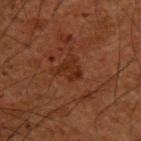

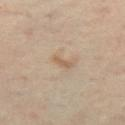

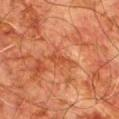

Image conversion and display complete.


In [ ]:
import h5py
import io
from PIL import Image
from IPython.display import display

# Path to your HDF5 file
hdf5_file_path = 'drive/MyDrive/kaggleCompetition/SkinCancerPrediction/test-image.hdf5'

# Load the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    # Inspect the datasets
    for dataset_name in hdf5_file:
        dataset = hdf5_file[dataset_name]

        # Check if the dataset is scalar or a proper image
        if dataset.shape == ():  # Scalar dataset
            # Read the byte string
            byte_string = dataset[()]

            # Convert byte string to a PIL Image
            image = Image.open(io.BytesIO(byte_string))

            # Save or display the image
            image.save(f'{dataset_name}.jpg')  # Save image

            # Display the image inline in Jupyter Notebook
            display(image)

        else:
            print(f"{dataset_name} is not a scalar or proper image dataset.")

print("Image conversion and display complete.")
